In this project, we shall be analysisng and attempting to predict livestock prices using various statistical techniques and machine learning models. 

In [1]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Reading the file 

In [2]:
#load the excel file as a dataframe
df = pd.read_excel('Makert Prices 2022.xlsx')
# first five rows
df.head()

Dates  Seasons          Bull          Cow        Heifer         Steer
0 2009-08-01  Drought   8500.000000   966.666667   1666.666667    766.666667
1 2009-09-01  Drought  18000.000000  4000.000000  15000.000000  13000.000000
2 2009-10-01  Drought   8500.000000  5000.000000   8000.000000   9000.000000
3 2009-11-01  Drought  12484.312740  4815.021851   5198.550137  11302.715033
4 2009-12-01      Wet  22166.666667  9477.777778  10111.111111  18222.222222

In [3]:
print(df.columns)

Index(['Dates', 'Seasons', 'Bull', 'Cow', 'Heifer', 'Steer'], dtype='object')


# Data Wrangling

In [4]:
# Basic metadata of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    object        
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.3+ KB


### Completeness 

Here we check for missing values or null values

In [5]:
df.isna().any()

Dates      False
Seasons    False
Bull       False
Cow        False
Heifer     False
Steer      False
dtype: bool

In [6]:
df.isnull().sum()

Dates      0
Seasons    0
Bull       0
Cow        0
Heifer     0
Steer      0
dtype: int64

### Consistency

In [7]:
#checking for duplicates

f'There are {df.duplicated().sum()} duplicates in the dataframe'

'There are 0 duplicates in the dataframe'

### Validity

In [8]:
df['Seasons'].value_counts()

Seasons
Wet        50
Dry        50
dry        24
Drought    13
drought    12
wet         5
Name: count, dtype: int64

The `Dry` and `dry` seasons seem to be similar as well as the `Drought` and `drought` seasons and the `wet` and `Wet` seasons. So lets make them all the same by having them be Proper titles

In [9]:
df.Seasons = df.Seasons.str.title()
df['Seasons'].value_counts()

Seasons
Dry        74
Wet        55
Drought    25
Name: count, dtype: int64

Now we have 3 seasons
* Dry
* Wet
* Drought

#### Outliers

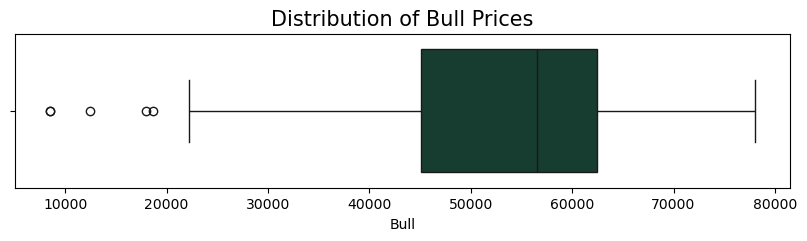

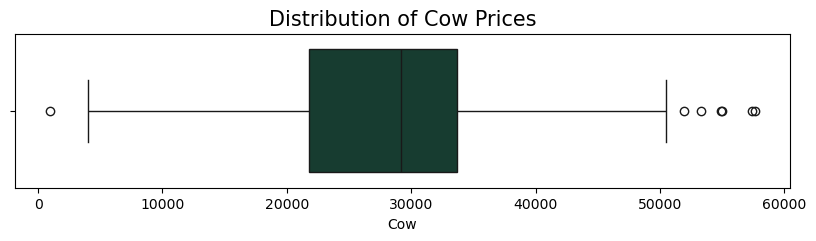

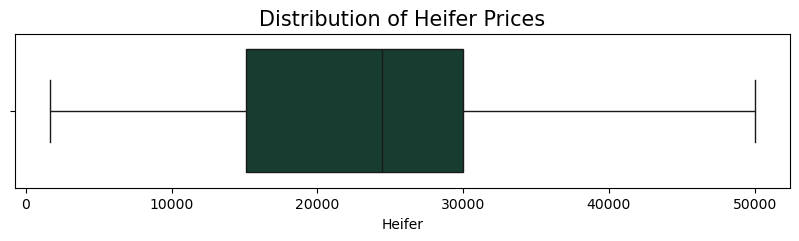

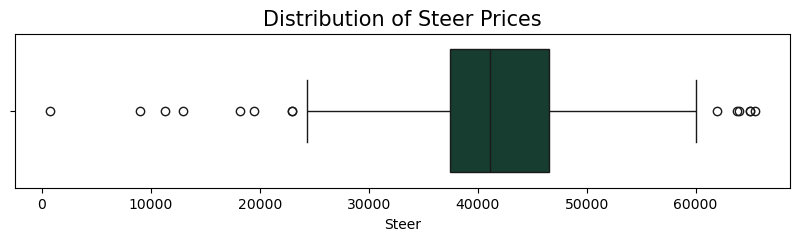

In [10]:
#Checking for outliers
def outliers(df, col):
    """
    This function visualises the outliers and outputs boxplots
    """
    plt.figure(figsize=(10,2))
    sns.boxplot(x=col, data=df, color= "#114232")
    plt.title(f'Distribution of {col} Prices', fontsize=15);

num_list=['Bull', 'Cow','Heifer', 'Steer']
for col in num_list:
    outliers(df,col)

There are some outliers but this is normal since the market shifts depending on the season, so will leave them.

Let us also change the datatype of the `Seasons` column to `Category` as it was an object before.

In [11]:
df['Seasons']= df['Seasons'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    category      
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4)
memory usage: 6.4 KB


In [13]:
df['Month'] = df['Dates'].dt.month
# Add 'Month' column
df['Month'] = df['Dates'].dt.month

# Define a lambda function to map month numbers to month names
month_map = lambda x: pd.Timestamp(year=2000, month=x, day=1).strftime('%B')

# Apply the lambda function to 'Month' column
df['Month'] = df['Month'].apply(month_map)


In [14]:
df['Month'].value_counts()

Month
August       13
September    13
October      13
November     13
December     13
January      13
March        13
April        13
May          13
July         13
February     12
June         12
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    category      
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
 6   Month    154 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(4), object(1)
memory usage: 7.6+ KB


In [16]:
# Basic description of numerical features

df.describe().T

count                           mean                  min  \
Dates     154  2015-12-17 21:30:23.376623360  2009-08-01 00:00:00   
Bull    154.0                   53296.236208               8500.0   
Cow     154.0                   28102.985031           966.666667   
Heifer  154.0                   23831.001561          1666.666667   
Steer   154.0                    41550.11114           766.666667   

                        25%                  50%                  75%  \
Dates   2012-10-08 18:00:00  2015-12-16 12:00:00  2019-02-22 00:00:00   
Bull                45100.0         56503.850527          62417.57515   
Cow            21780.739223         29150.409072         33659.749804   
Heifer         15083.333333         24461.740493         29975.666924   
Steer          37421.703386         41150.249088         46531.278194   

                        max           std  
Dates   2022-07-29 00:00:00           NaN  
Bull                78000.0  13837.139183  
Cow             57613.00104   9973.969461  
Heifer              50000.0  10485.280024  
Steer          65411.537154  10678.454015

The mean, minimum and maximum prices as well as quartile prices and dates are given above. Bulls seem to be the best animals to keep/ rear  in terms of pricing.

## Exploratory Data Analysis

### Lets do some Analysis

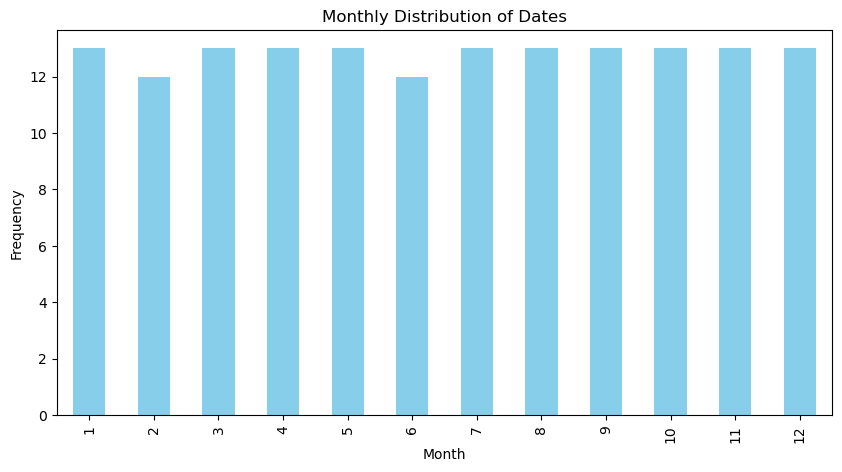

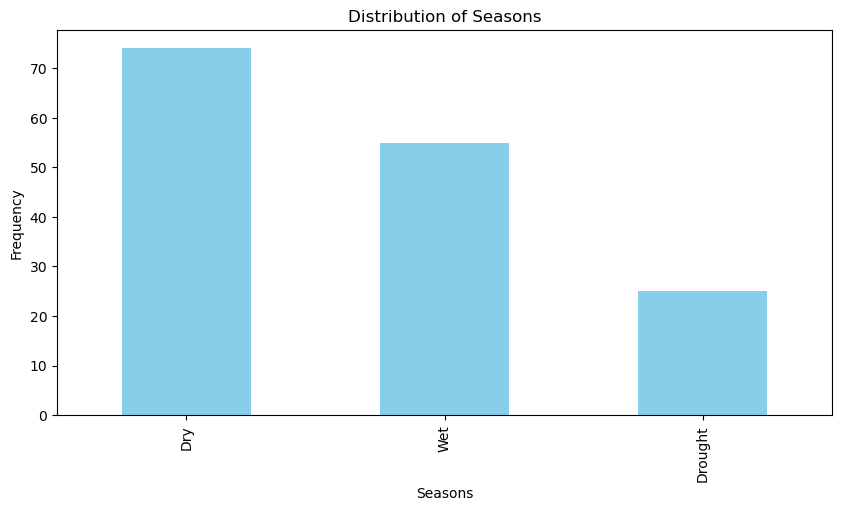

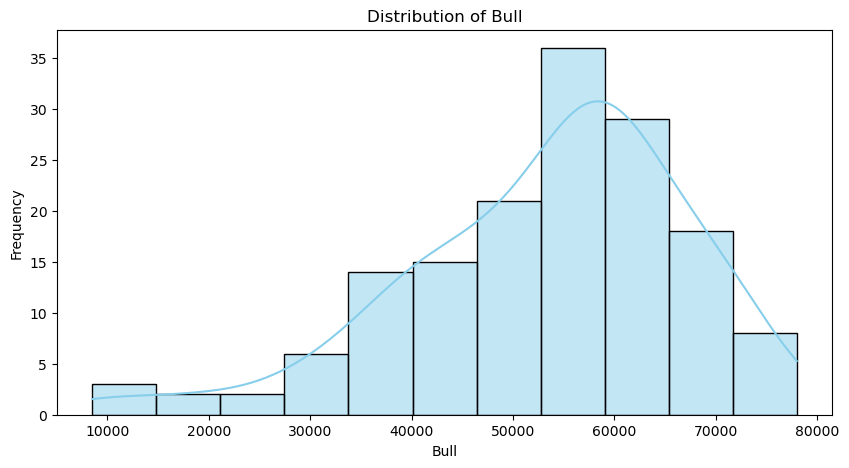

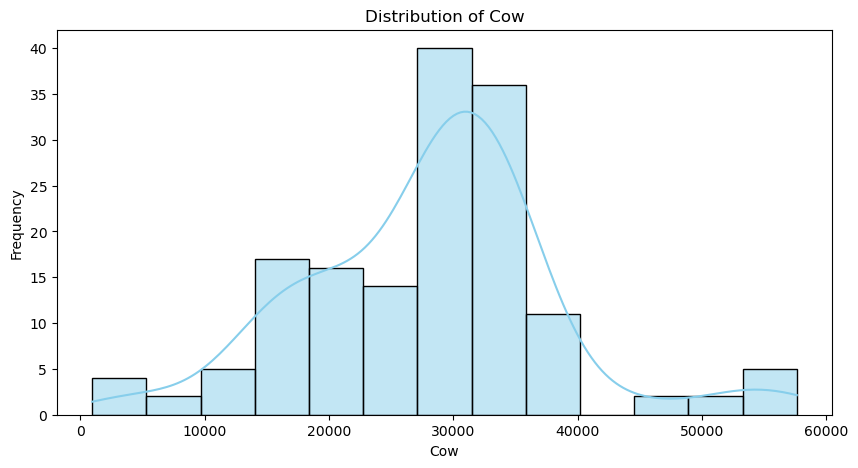

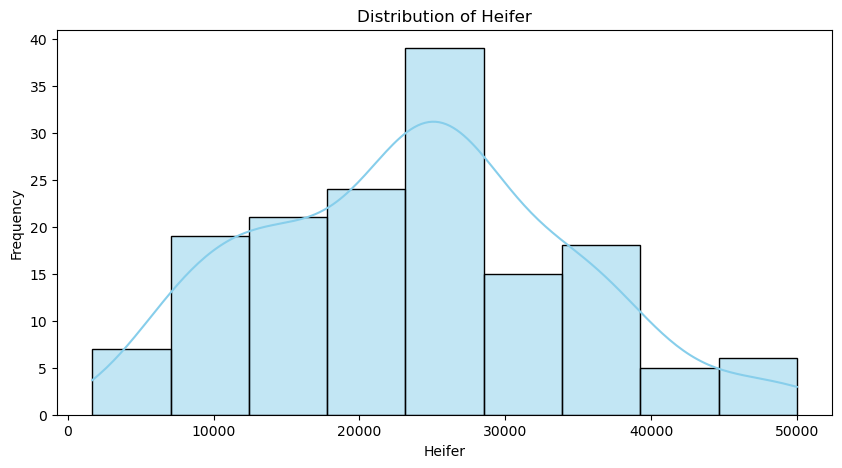

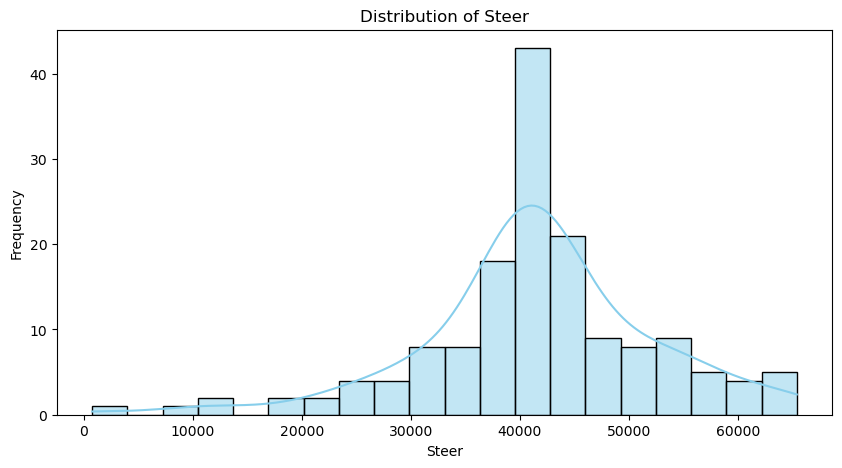

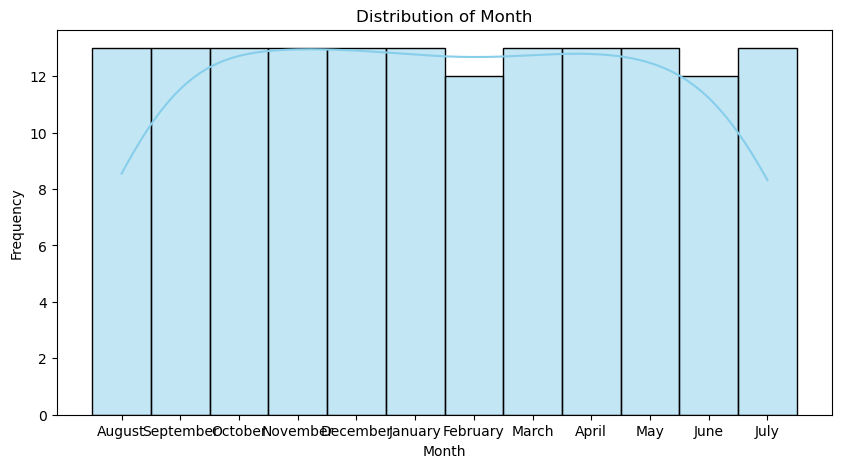

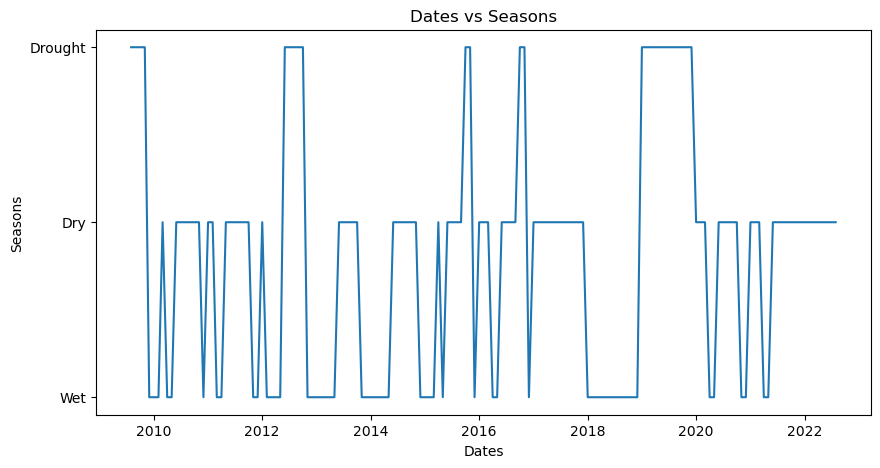

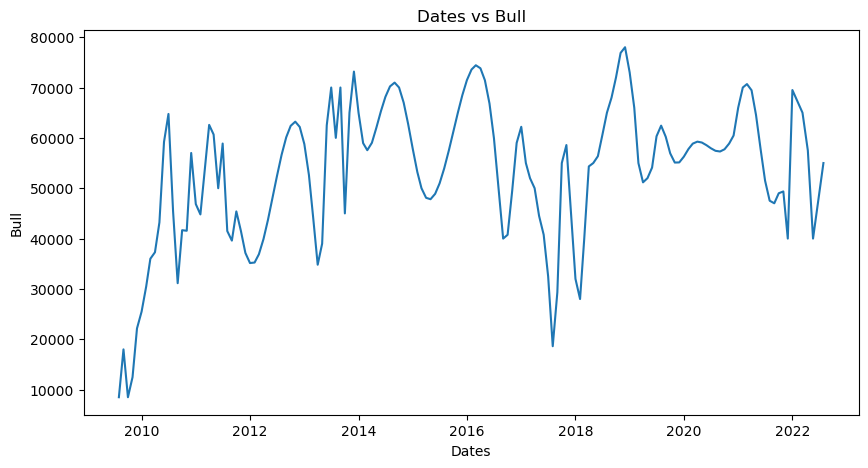

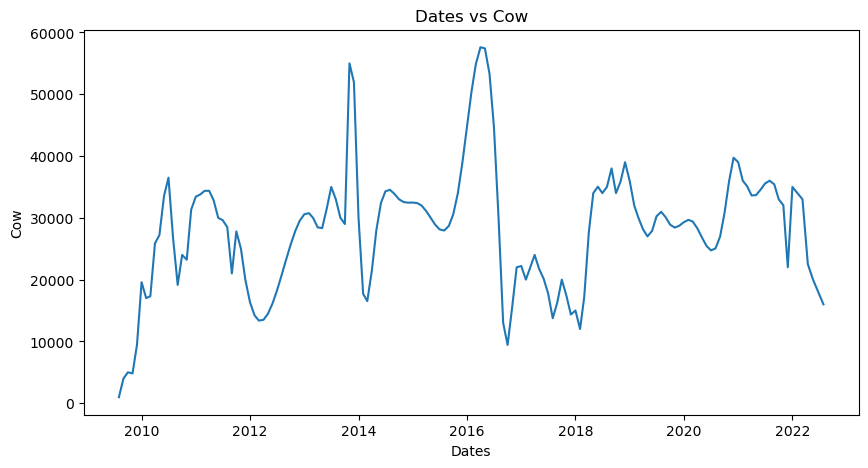

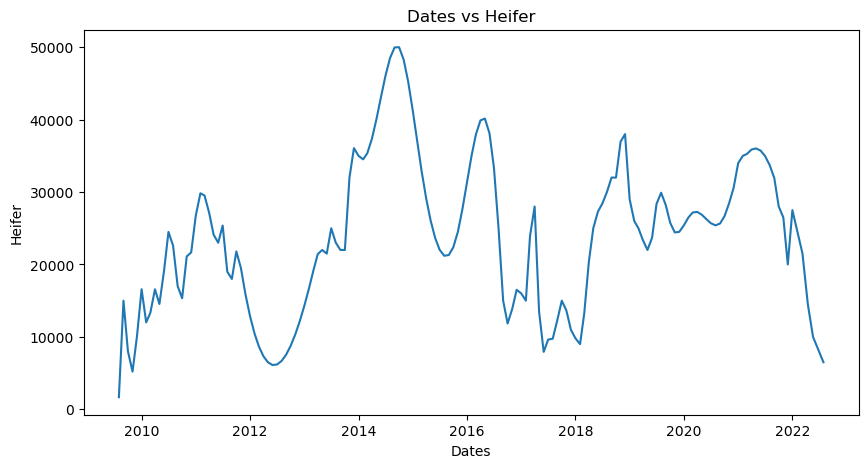

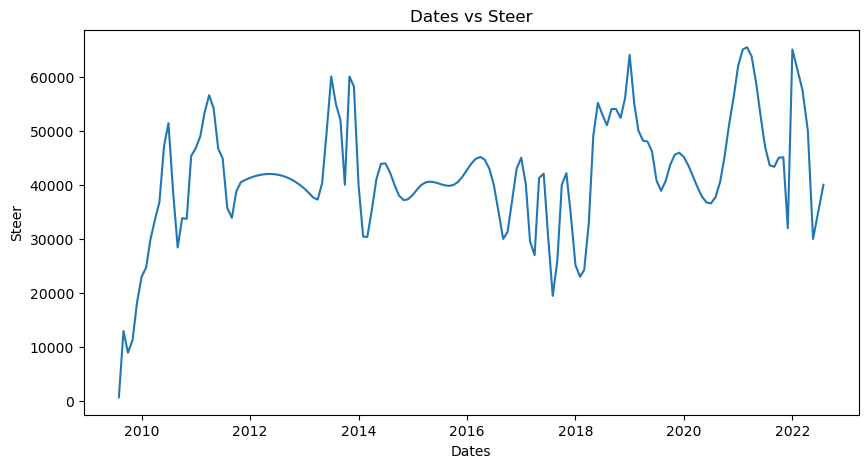

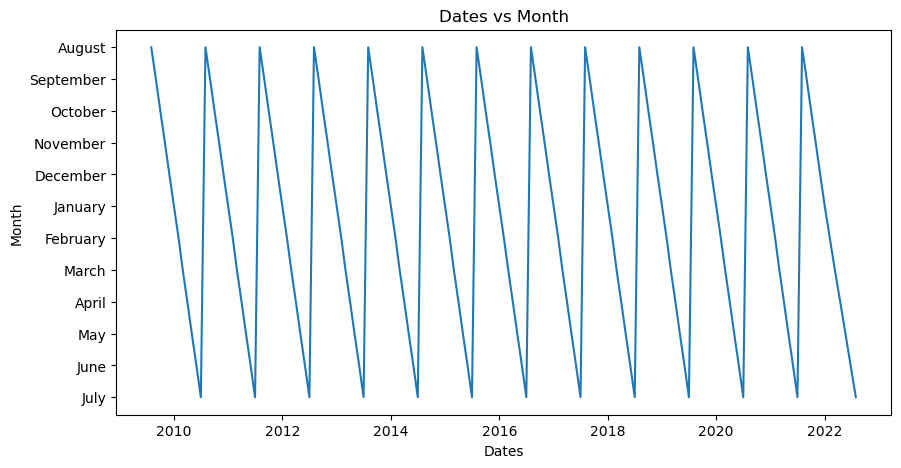

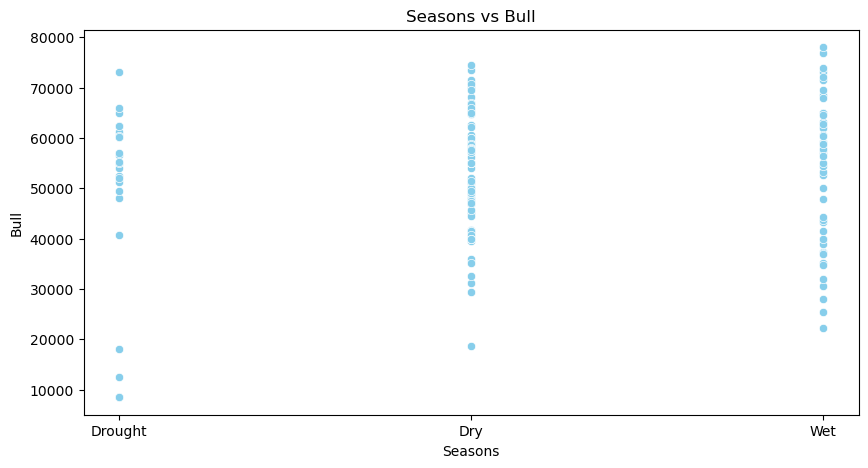

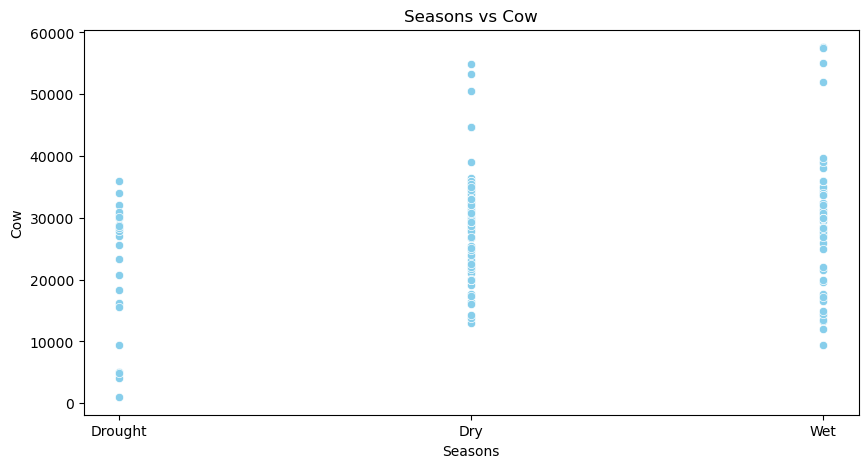

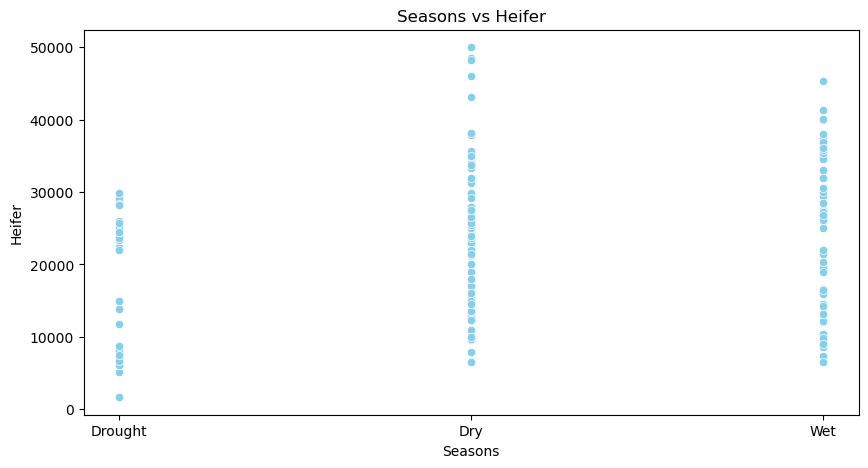

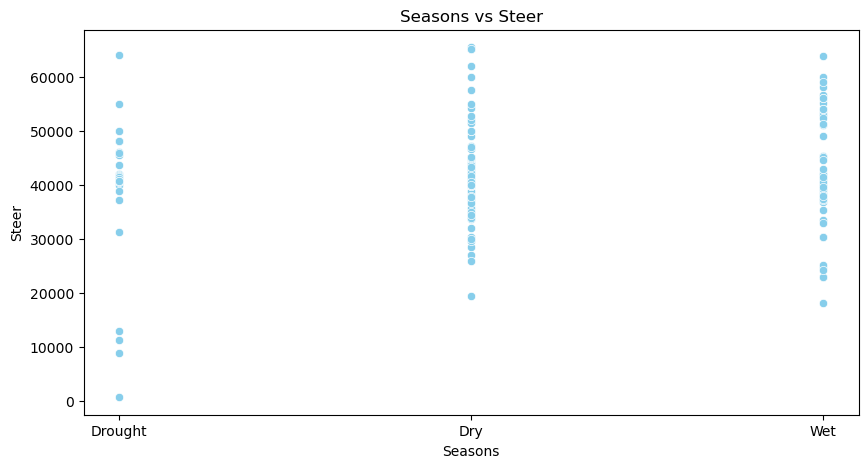

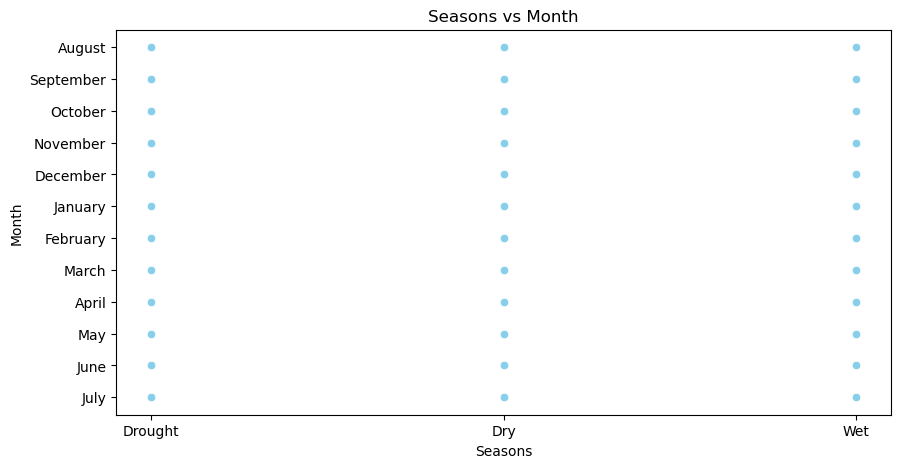

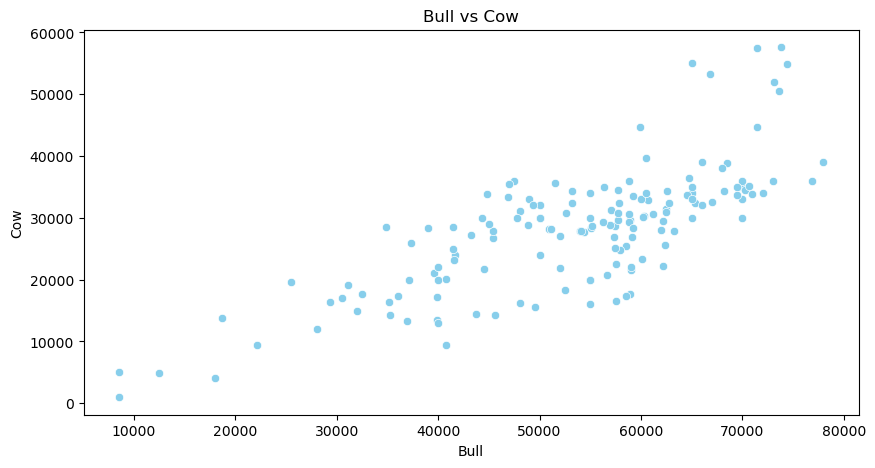

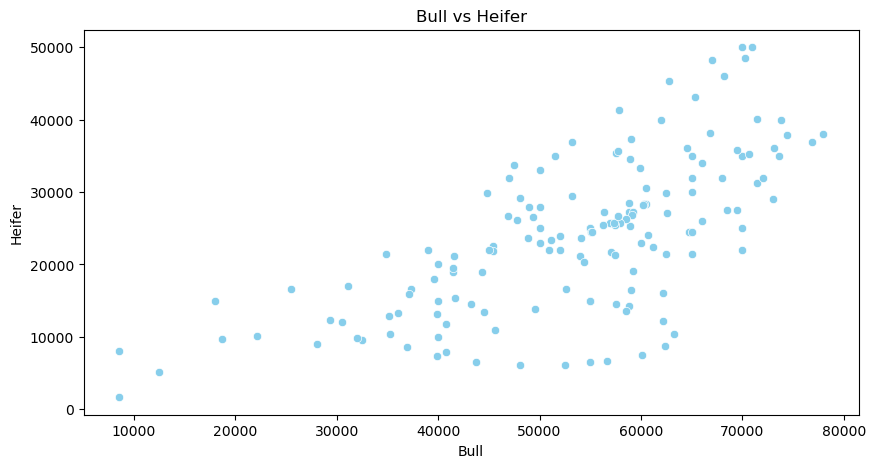

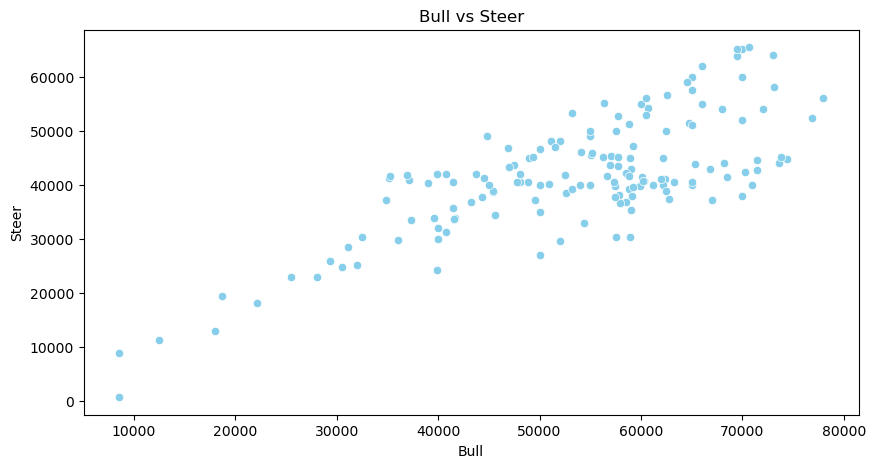

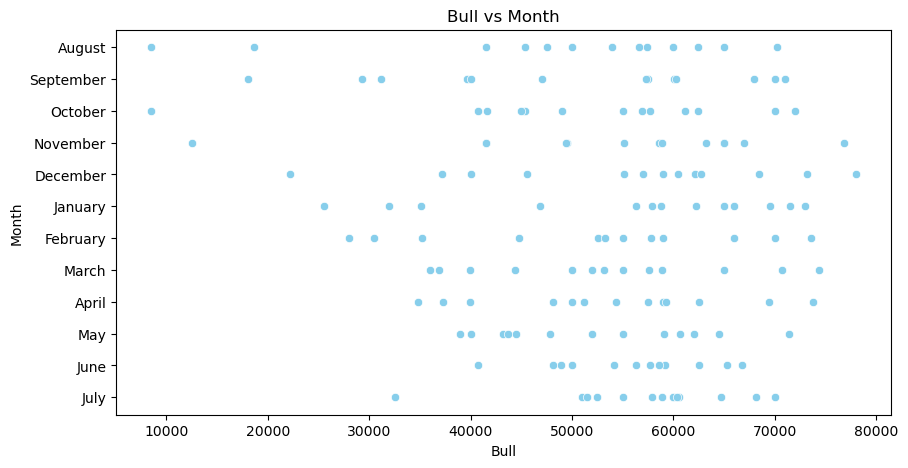

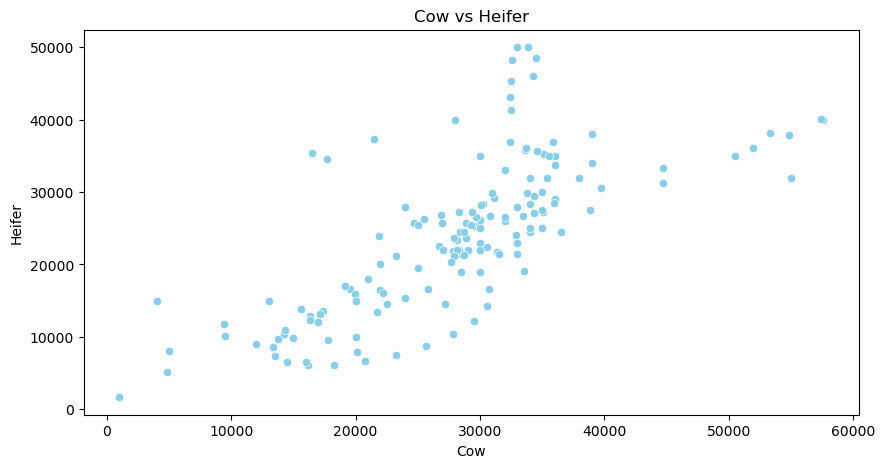

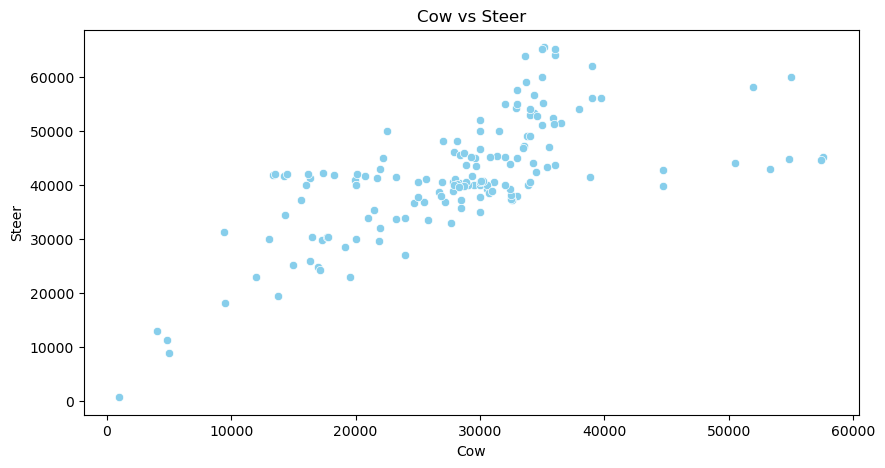

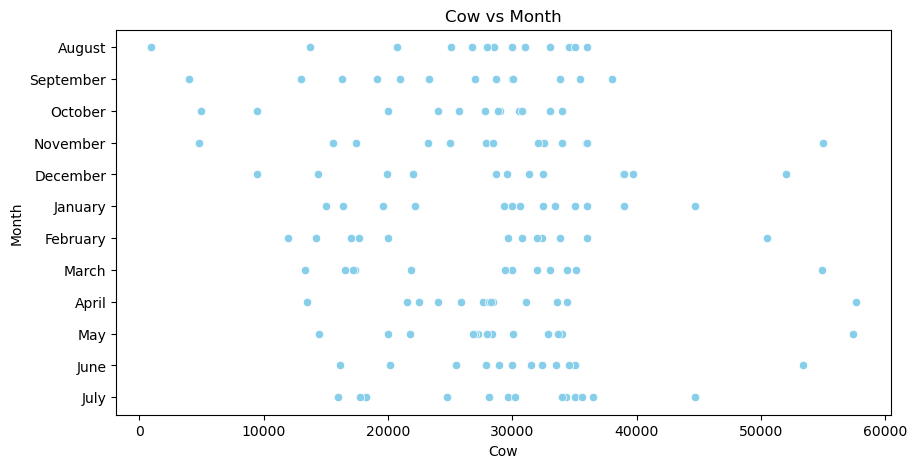

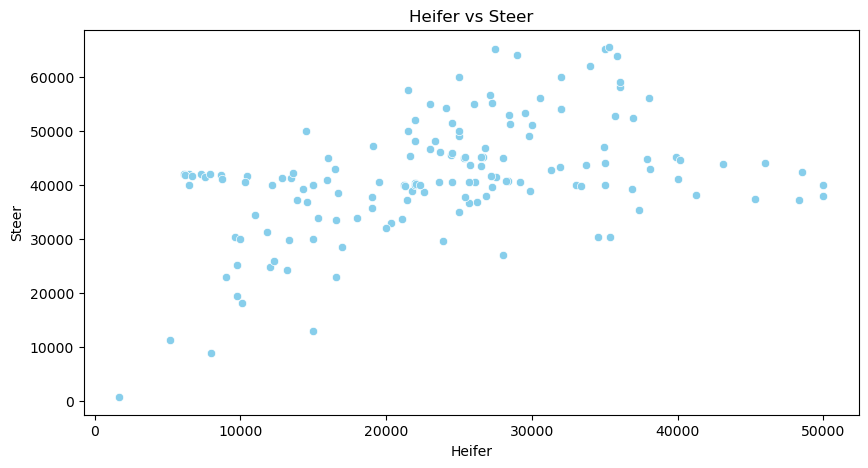

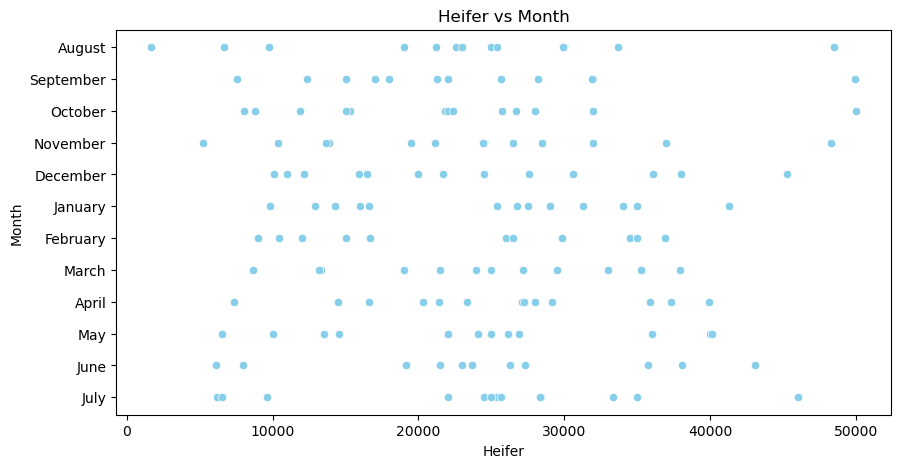

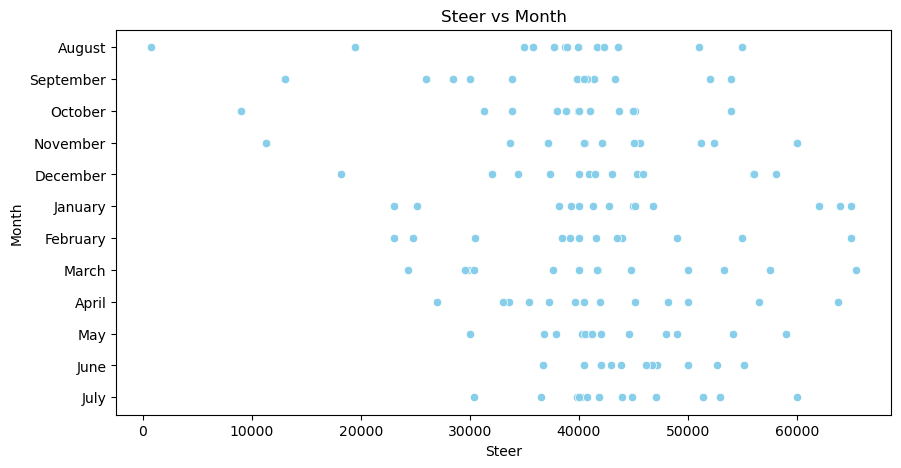

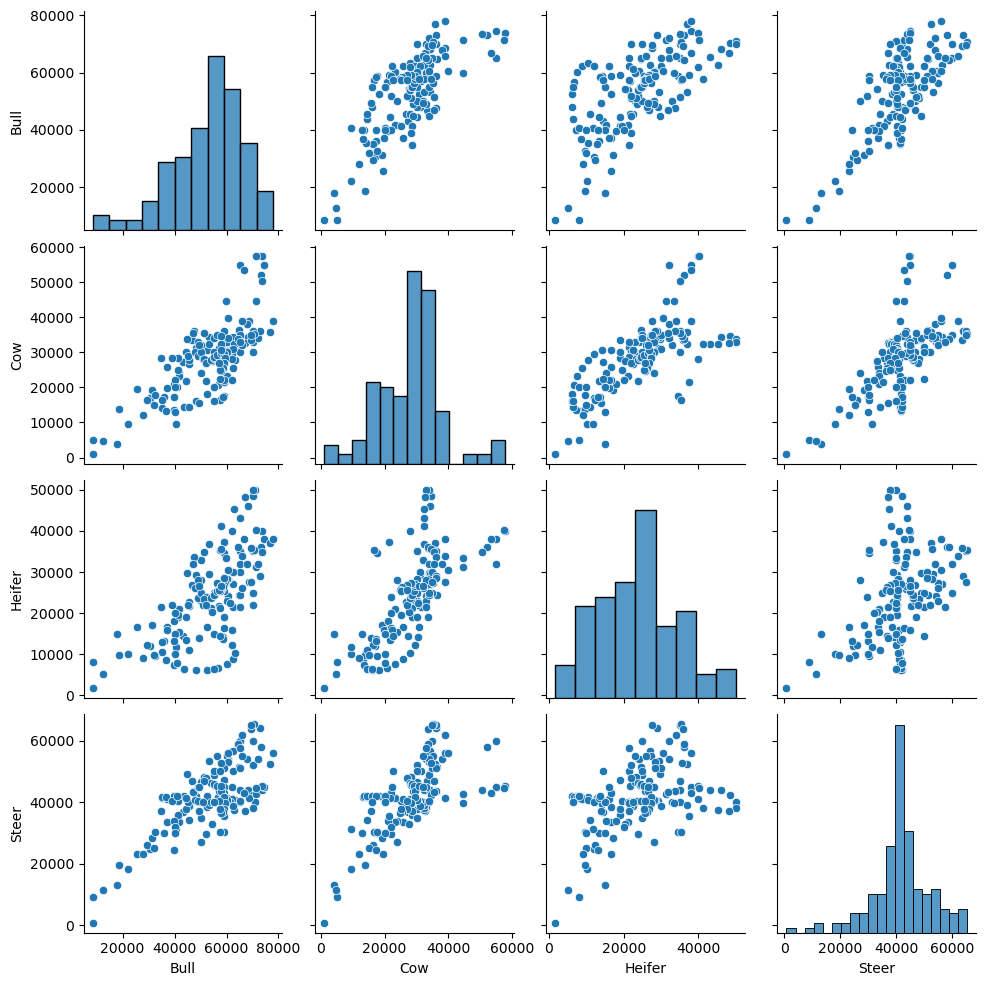

In [17]:
def analyze_dataset(data):
    # Univariate Analysis
    def univariate_analysis(column):
        plt.figure(figsize=(10, 5))
        if data[column].dtype == 'datetime64[ns]':
            data[column].dt.month.value_counts().sort_index().plot(kind='bar', color='skyblue')
            plt.title('Monthly Distribution of ' + column)
            plt.xlabel('Month')
            plt.ylabel('Frequency')
        elif data[column].dtype.name == 'category':
            data[column].value_counts().plot(kind='bar', color='skyblue')
            plt.title('Distribution of ' + column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            sns.histplot(data[column], kde=True, color='skyblue')
            plt.title('Distribution of ' + column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        plt.show()

    # Bivariate Analysis
    def bivariate_analysis(x, y):
        plt.figure(figsize=(10, 5))
        if data[x].dtype == 'datetime64[ns]':
            sns.lineplot(data=data, x=x, y=y)
            plt.title('{} vs {}'.format(x, y))
        elif data[x].dtype.name == 'category' and data[y].dtype.name == 'category':
            sns.heatmap(pd.crosstab(data[x], data[y]), annot=True, cmap='coolwarm')
            plt.title('{} vs {}'.format(x, y))
        else:
            sns.scatterplot(data=data, x=x, y=y, color='skyblue')
            plt.title('{} vs {}'.format(x, y))
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    # Multivariate Analysis
    def multivariate_analysis(columns):
        sns.pairplot(data[columns])
        plt.show()

    # Call functions for analysis
    for column in data.columns:
        univariate_analysis(column)

    for i in range(len(data.columns)):
        for j in range(i+1, len(data.columns)):
            bivariate_analysis(data.columns[i], data.columns[j])

    multivariate_analysis(data.columns)

# Example usage:
analyze_dataset(df)


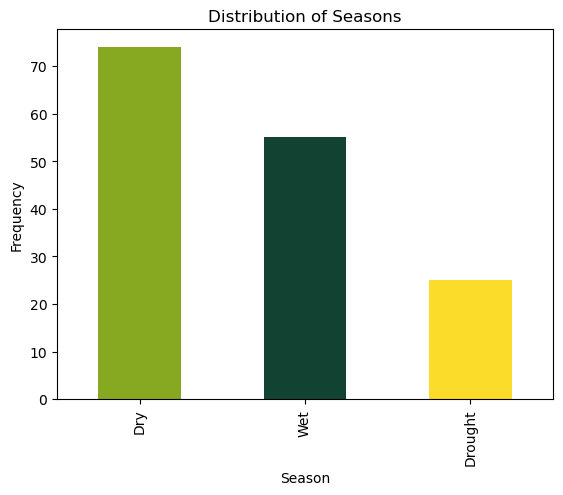

In [18]:
colors = ['#87A922', '#114232', '#FCDC2A']

df['Seasons'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()


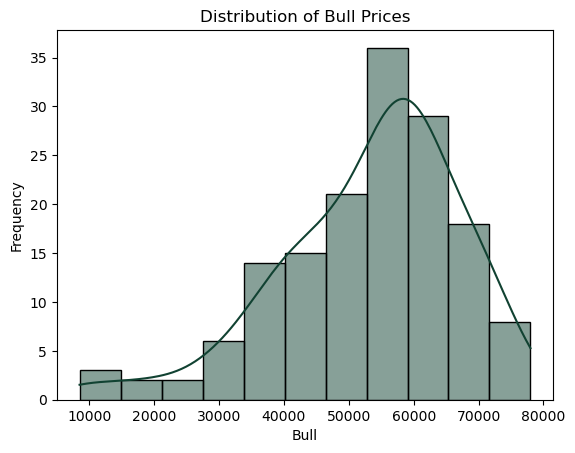

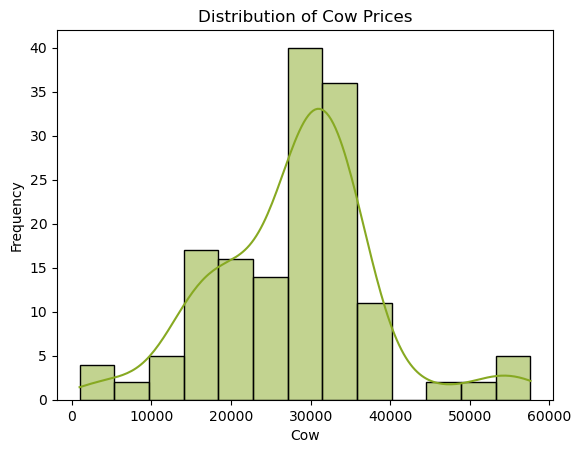

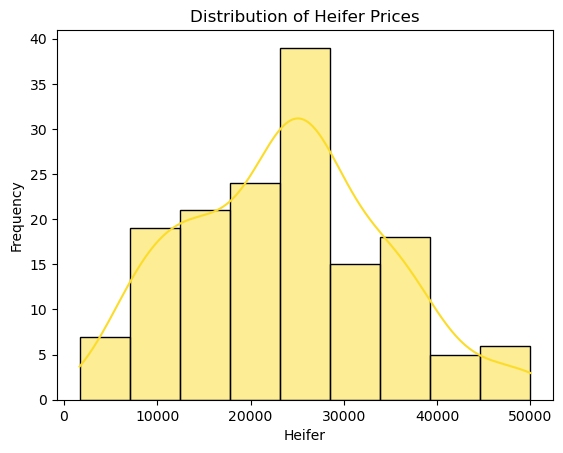

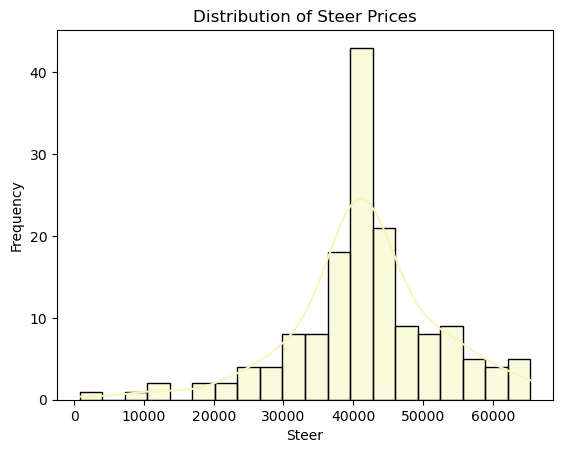

In [19]:
# Define colors for the histograms
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Loop through each column starting from the fourth column
for column, color in zip(df.columns[2:], colors):
    # Create histogram
    sns.histplot(df[column], kde=True, color=color)
    
    # Set title, x-label, y-label
    plt.title(f'Distribution of {column} Prices')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot for this column
    plt.show()


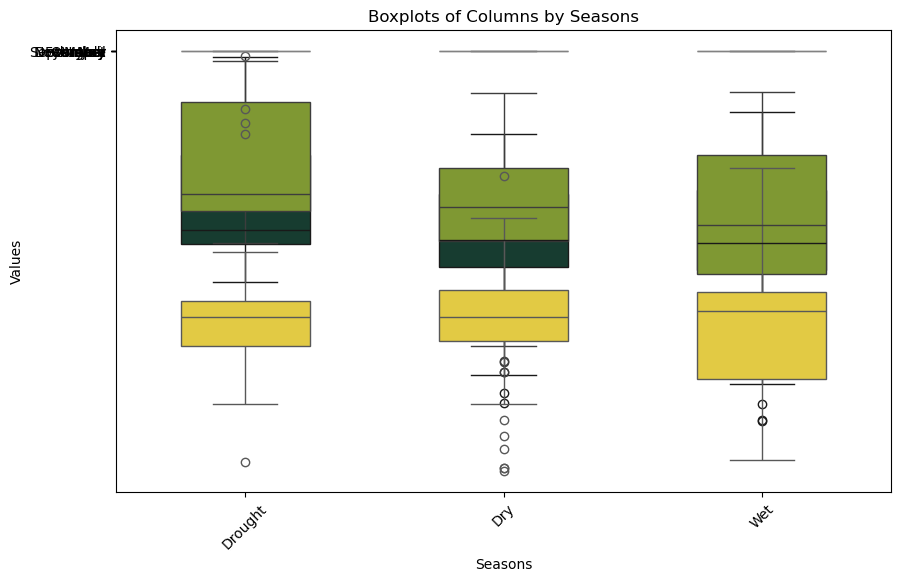

In [20]:
# Define colors as a list
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Loop through each column starting from the fourth column
for i, column in enumerate(df.columns[3:]):
    # Create boxplot
    sns.boxplot(x='Seasons', y=column, data=df, color=colors[i % len(colors)], width=0.5)
    
# Set title, x-label, y-label
plt.title('Boxplots of Columns by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='Seasons', ylabel='Bull'>

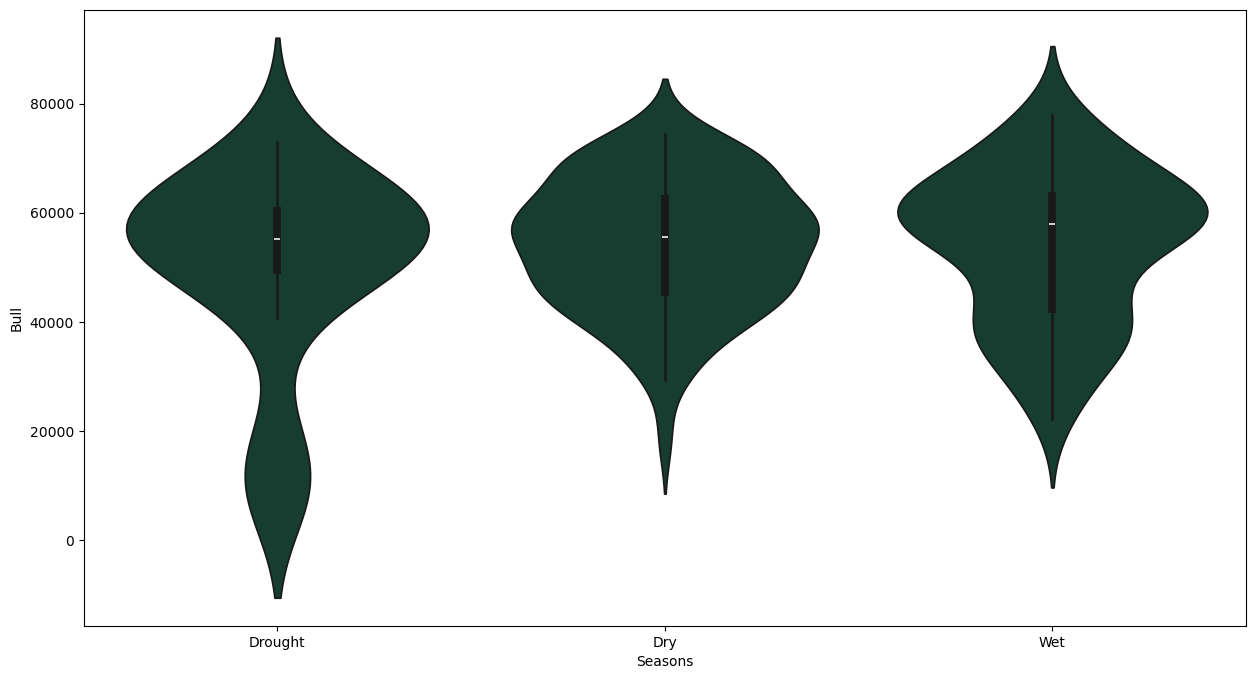

In [21]:

plt.figure(figsize=(15,8))
sns.violinplot(x= 'Seasons' , y = 'Bull', data = df, hue_order=df.Seasons.value_counts(), color='#114232' )

* The average price in the seasons seems to be between 5000 and 6000

* Prices have a relatively low volatility during the  Seasons

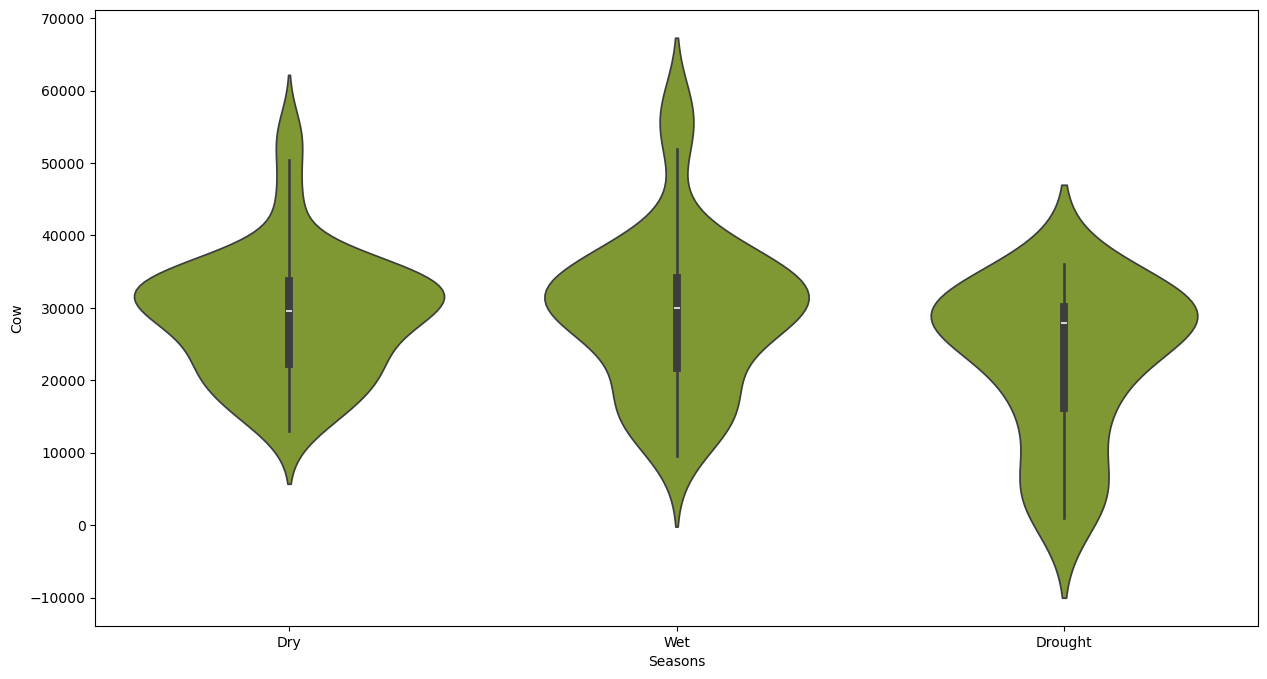

In [22]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Cow', data=df, order=df['Seasons'].value_counts().index, color= '#87A922',)
plt.show()


* The average price in the seasons seems to be between 2000 and 4000

* Prices have a relatively high volatility during the Drought and go towards the lower side and some seem to die?

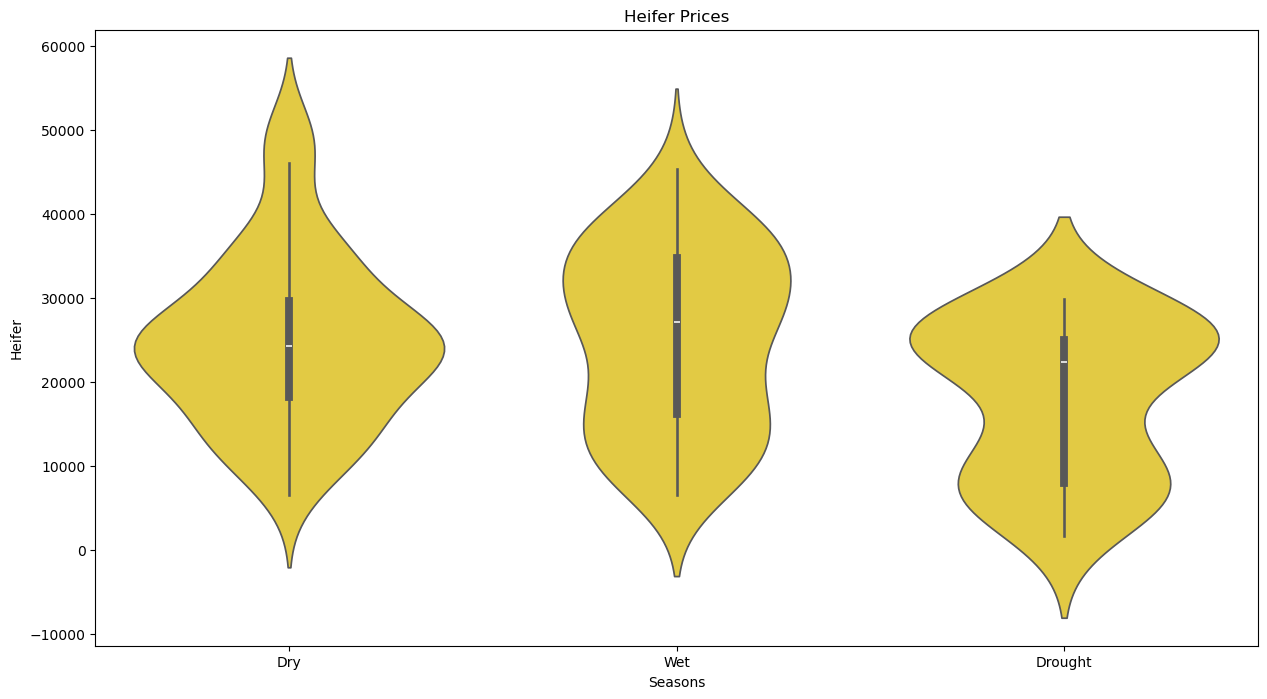

In [23]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Heifer', data=df, order=df['Seasons'].value_counts().index, color='#FCDC2A' )
plt.title('Heifer Prices')
plt.show()


The Heifer average prices are the best during the Wet Seaoson selling at 35000 on average and 25000 on average during the drought, similar to the Dry season. 

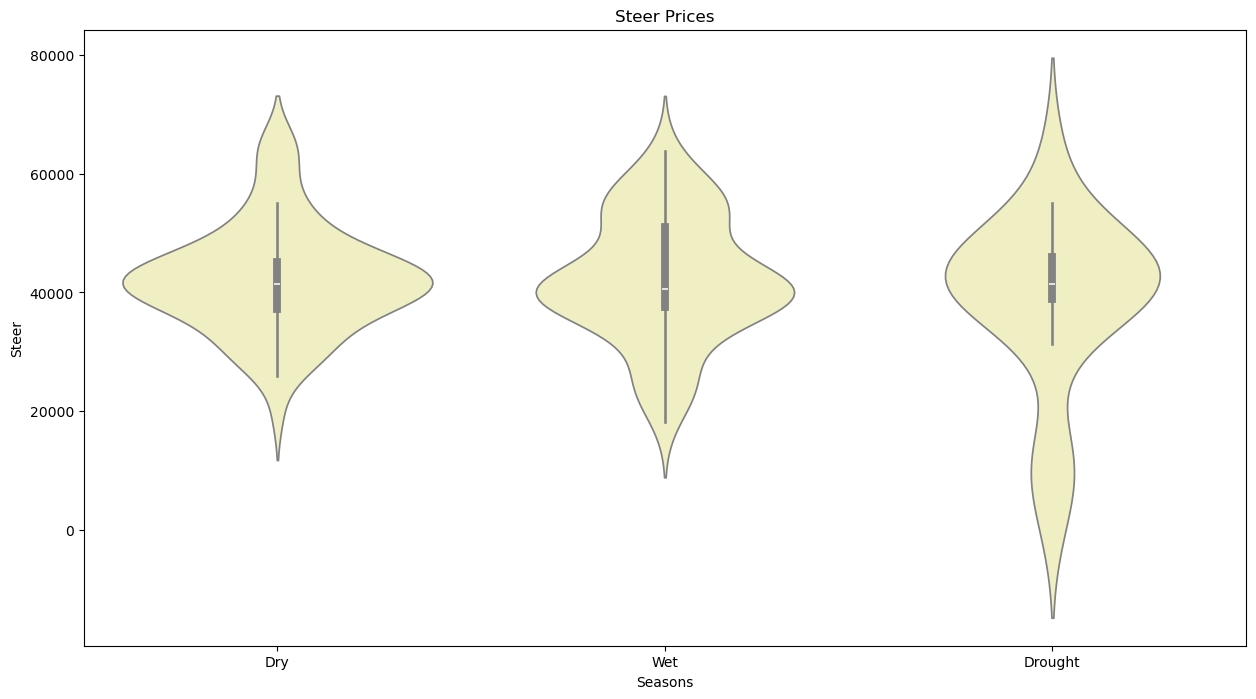

In [24]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Steer', data=df, order=df['Seasons'].value_counts().index, color= '#F7F6BB' )
plt.title('Steer Prices')
plt.show()

The prices are affected the most during the Drought with some probably dying due to the drought and the young age of the livestock

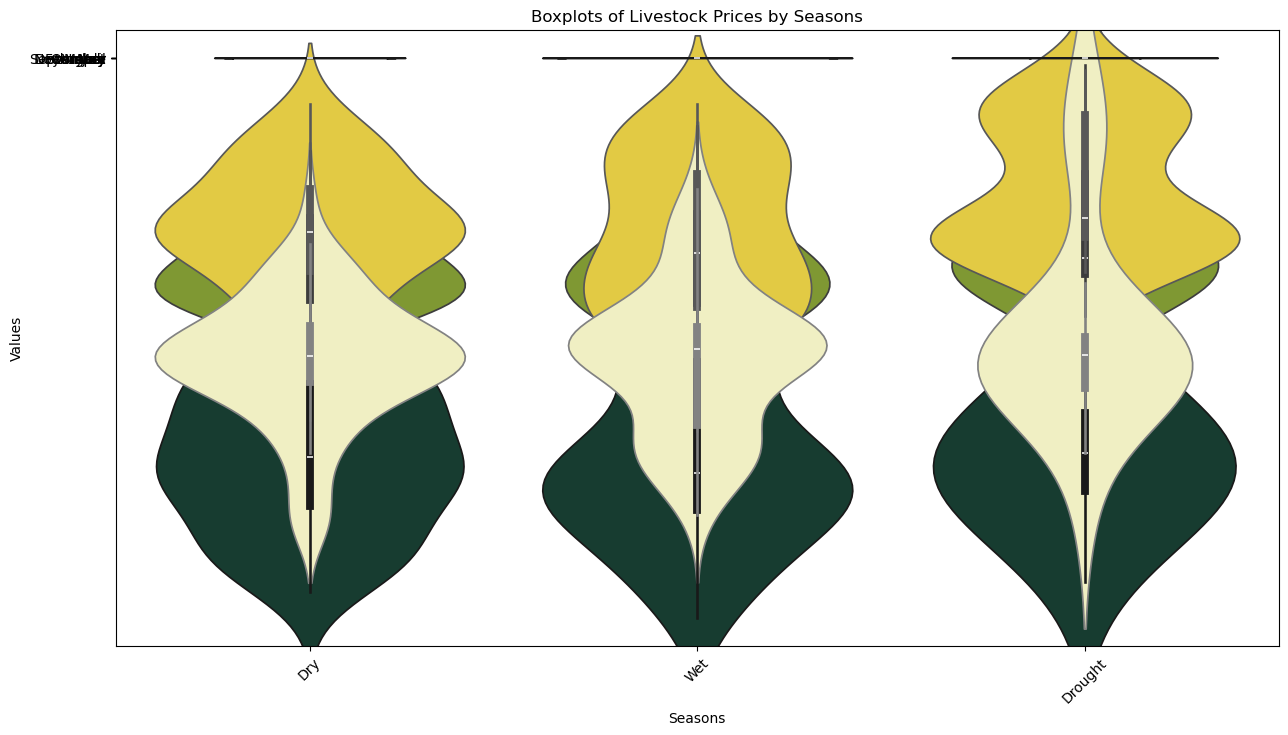

In [25]:


# Set the size of the plot
plt.figure(figsize=(15, 8))

# Define colors as a list
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Loop through each column in the list
for i, column in enumerate(df.columns[2:]):
    # Create boxplot
    sns.violinplot(x='Seasons', y=column, data=df, order=df['Seasons'].value_counts().index, color=colors[i % len(colors)])
    
# Set title, x-label, y-label
plt.title('Boxplots of Livestock Prices by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



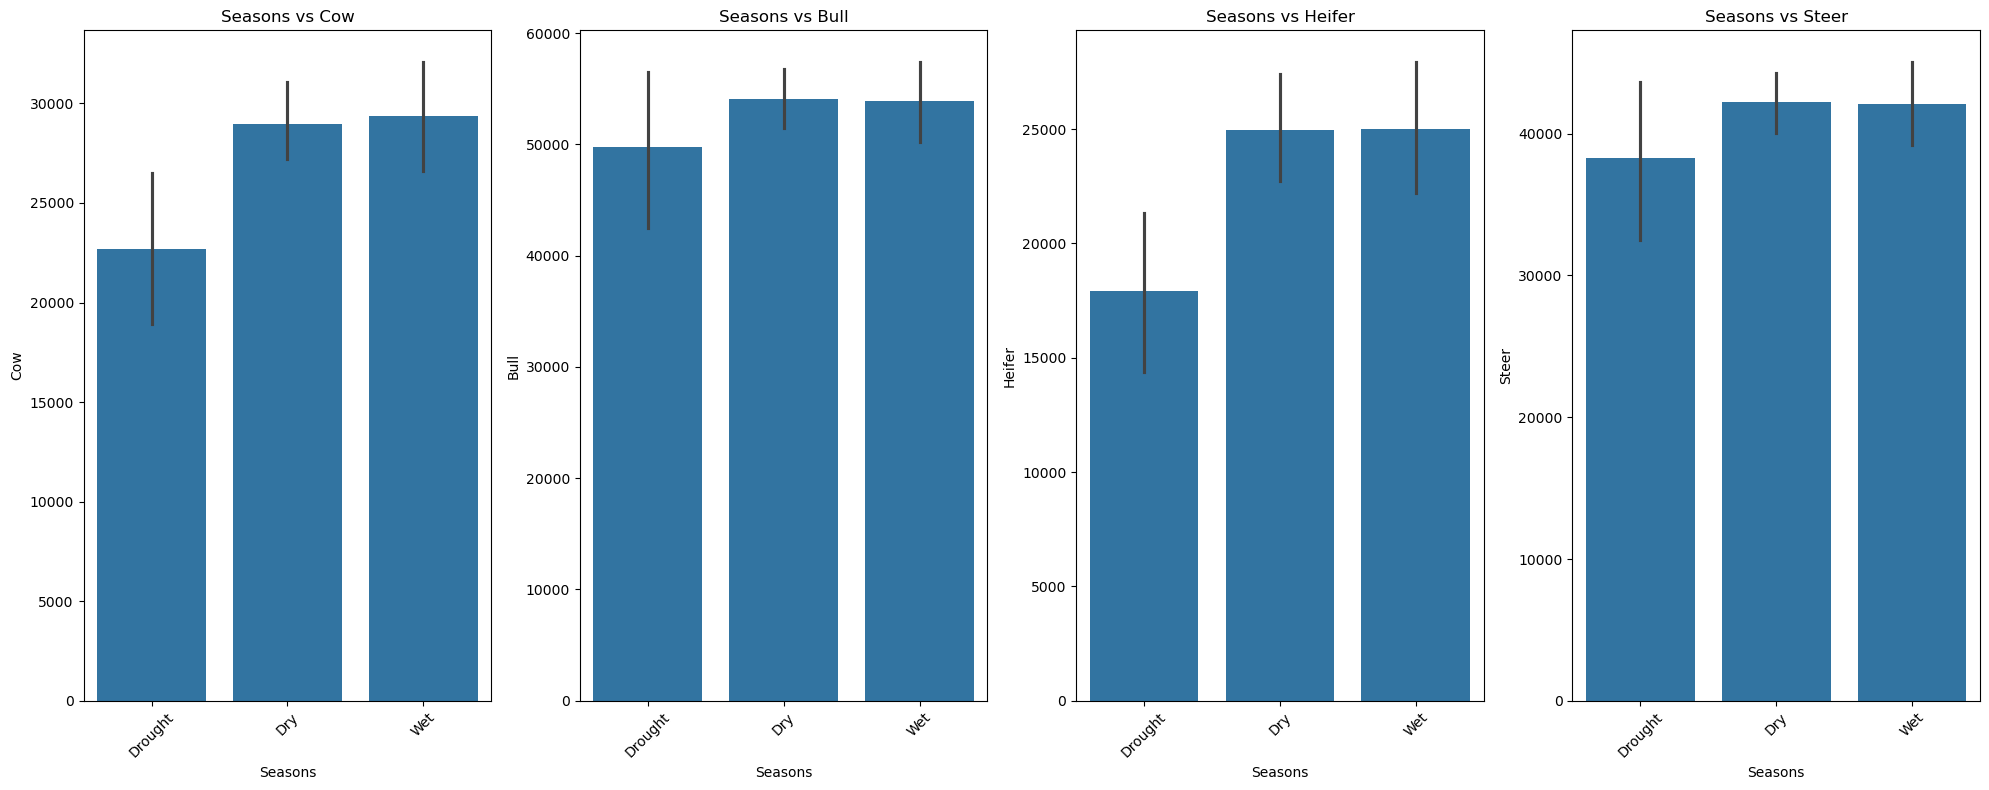

In [26]:

def plot_categorical_vs_numerical(df, categorical_column, numerical_columns):
    """
    Plot bar charts of numerical columns against a categorical column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_column (str): The name of the categorical column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(20, 8))

    # Loop through each numerical column
    for i, numerical_column in enumerate(numerical_columns, start=1):
        plt.subplot(1, len(numerical_columns), i)
        
        # Create the bar plot
        sns.barplot(x=categorical_column, y=numerical_column, data=df)
        
        # Set title and labels for each subplot
        plt.title(f'{categorical_column} vs {numerical_column}')
        plt.xlabel(categorical_column)
        plt.ylabel(numerical_column)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_categorical_vs_numerical(df, 'Seasons', ['Cow', 'Bull', 'Heifer','Steer' ])


Cow Prices are best during the wet season and worse during the Drought. For Bulls, Heifers and Steers, the prices during the Dry and wet seasons are relatively similar but very low during the drought
Bulls prices seem to be the least diverse throughout the seasons.

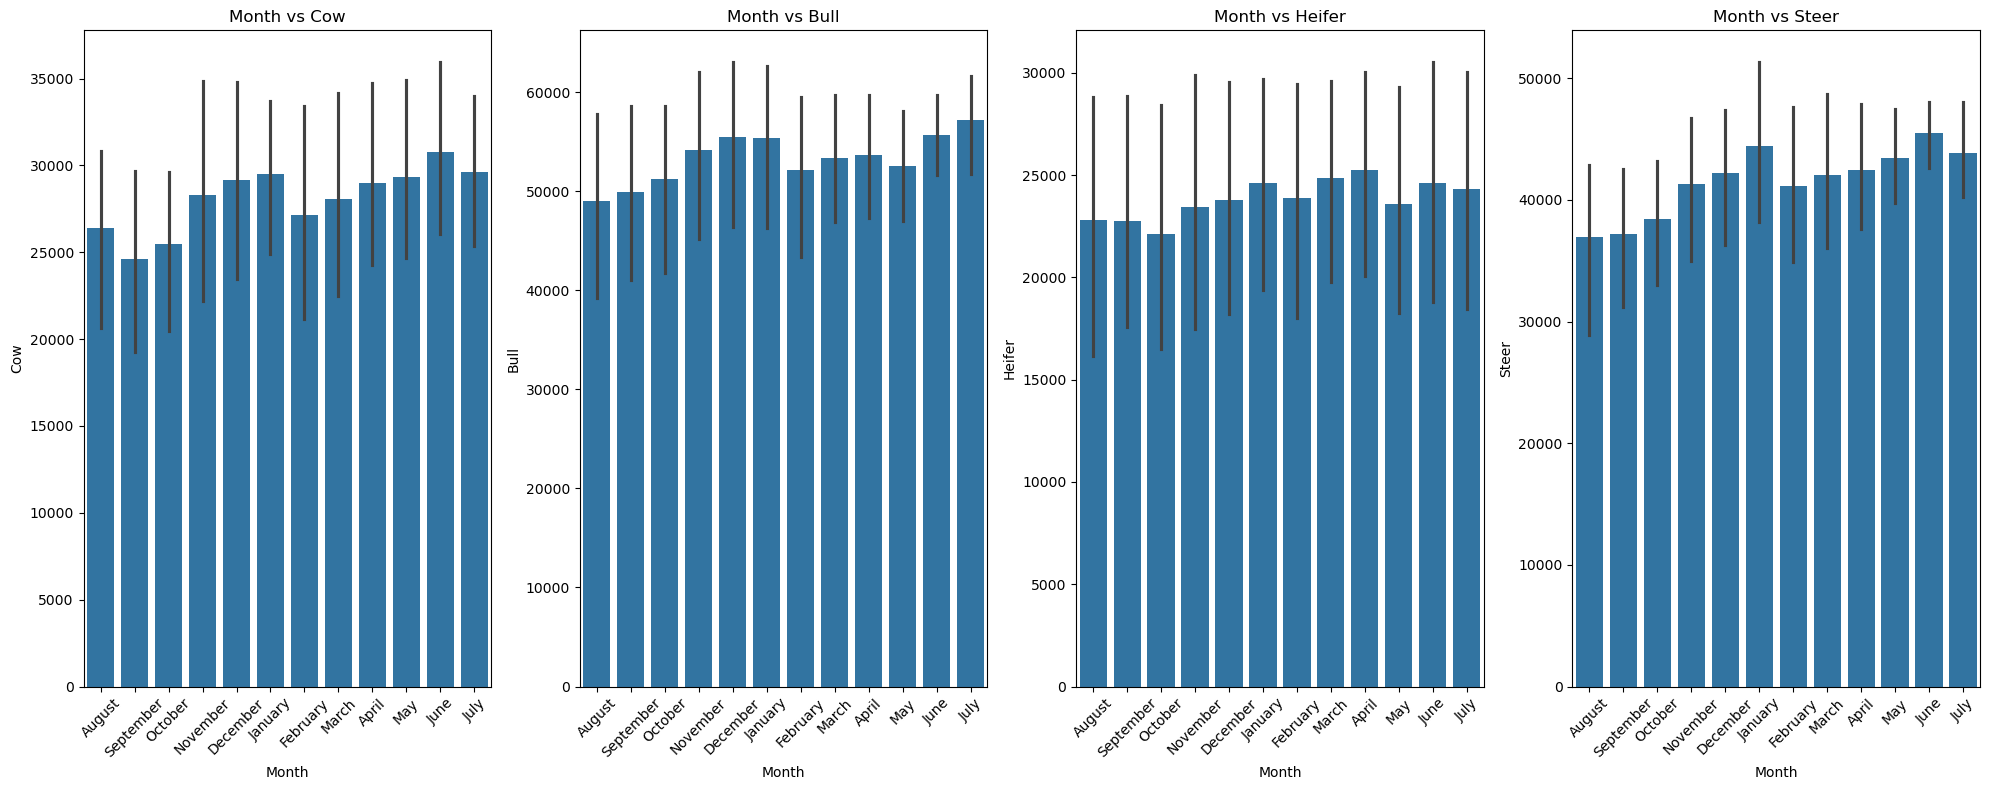

In [27]:
plot_categorical_vs_numerical(df, 'Month', ['Cow', 'Bull', 'Heifer','Steer' ])

The best prices for the livestock per month are as follows:
* Cows - June
* Bulls - July
* Heifers- April
* Steers - June

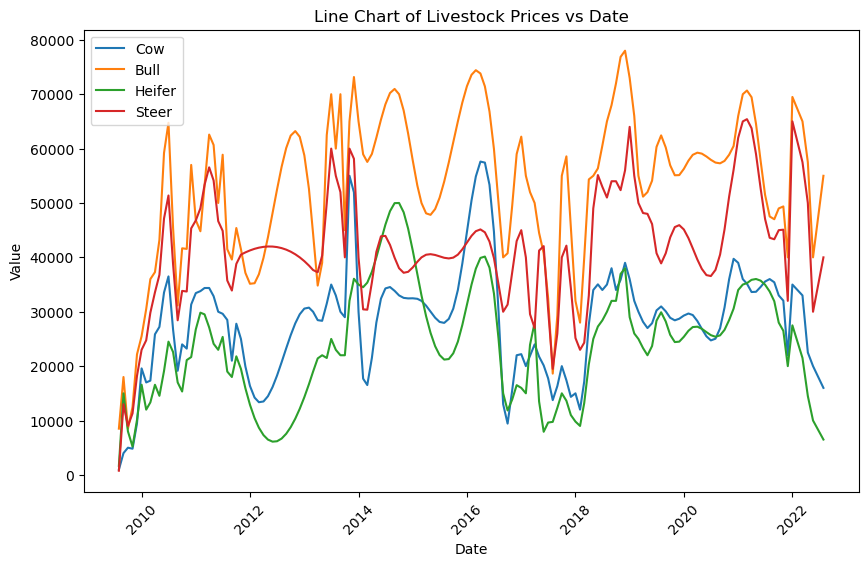

In [28]:
def line_chart_numerical_vs_date(df, date_column, numerical_columns):
    """
    Plot line chart of three numerical columns against dates.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        date_column (str): The name of the date column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(10, 6))
    
    # Plot each numerical column against the date
    for column in numerical_columns:
        plt.plot(df[date_column], df[column], label=column)
    
    # Add title and labels
    plt.title('Line Chart of Livestock Prices vs Date')
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

line_chart_numerical_vs_date(df, 'Dates', ['Cow', 'Bull', 'Heifer', 'Steer'])


Bulls have the best prices over time , followed by Steers, Cows and lastly heifers

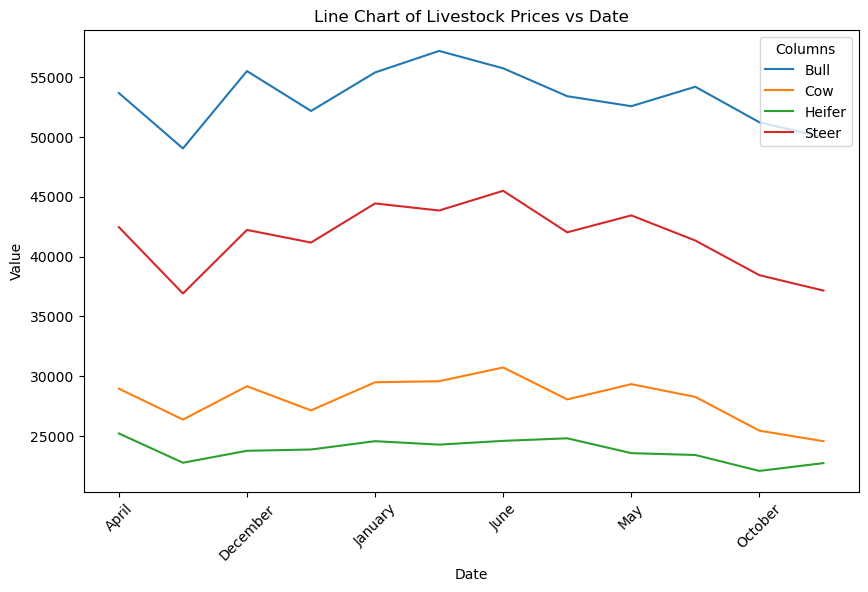

In [29]:
# Assuming your DataFrame is named df
pivot_table = pd.pivot_table(data=df, values=['Cow', 'Bull', 'Heifer', 'Steer'], index='Month')

# Plot the pivot table
pivot_table.plot(figsize=(10, 6))
plt.title('Line Chart of Livestock Prices vs Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Columns')
plt.show()


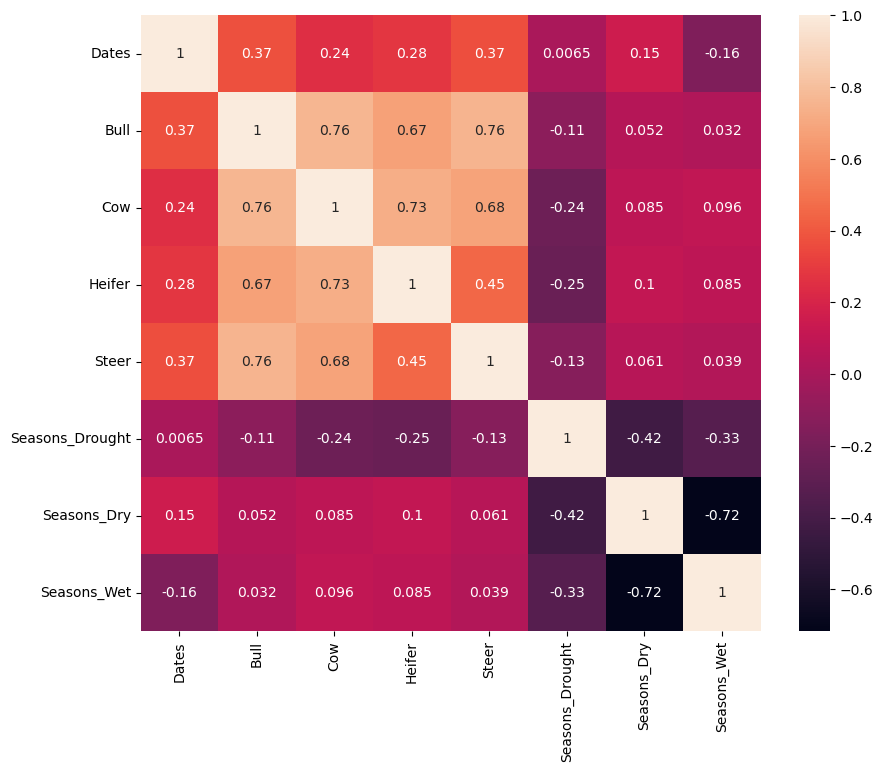

In [30]:
# Assuming 'Seasons' is a categorical column in your DataFrame
# Convert 'Seasons' column to one-hot encoding
df = df.drop(columns=['Month'])

df_encoded = pd.get_dummies(df, columns=['Seasons'])

# Generate the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()


In [31]:
df.head()

Dates  Seasons          Bull          Cow        Heifer         Steer
0 2009-08-01  Drought   8500.000000   966.666667   1666.666667    766.666667
1 2009-09-01  Drought  18000.000000  4000.000000  15000.000000  13000.000000
2 2009-10-01  Drought   8500.000000  5000.000000   8000.000000   9000.000000
3 2009-11-01  Drought  12484.312740  4815.021851   5198.550137  11302.715033
4 2009-12-01      Wet  22166.666667  9477.777778  10111.111111  18222.222222

## Modelling

We shall be using Time Series Analysis to predict the livestock prices and since the prices are affected by season, we will use methods that consider the seasonality aspect of the prices

* Seasonal ARIMA (SARIMA): SARIMA models extend the ARIMA framework to include seasonal components. They are capable of capturing both the trend and seasonality in the data. SARIMA models are a natural choice when dealing with data that exhibits periodic fluctuations over time.

* Seasonal Decomposition: Seasonal decomposition methods, such as seasonal-trend decomposition using LOESS (STL), decompose the time series into its trend, seasonal, and residual components. Once decomposed, you can model and forecast each component separately, which simplifies the forecasting process.

* Seasonal Exponential Smoothing: Exponential smoothing methods, such as Holt-Winters seasonal method, are capable of capturing both trend and seasonality in the data. These methods use weighted averages of past observations, with separate smoothing parameters for the level, trend, and seasonal components.

* Seasonal VAR (Vector AutoRegressive): If your dataset includes multiple time series variables that exhibit seasonal patterns and interdependencies, a seasonal VAR model can capture these relationships and provide joint forecasts for all variables.

* Machine Learning with Seasonal Features: Machine learning models, such as Random Forests or Gradient Boosting Machines, can be augmented with seasonal features extracted from the data (e.g., month or quarter indicators). These models can capture complex interactions and nonlinearities in the data, including seasonal patterns.

Let us create 4 different dataframes to the different animals sold

#### Cow

In [32]:
Cow= df.loc[:, ['Dates', 'Cow']]
Cow.set_index('Dates', inplace= True)
Cow.head()

Cow
Dates                  
2009-08-01   966.666667
2009-09-01  4000.000000
2009-10-01  5000.000000
2009-11-01  4815.021851
2009-12-01  9477.777778

#### Bulls

In [33]:
Bull= df.loc[:, ['Dates', 'Bull']]
Bull.set_index('Dates', inplace= True)
Bull.head()

Bull
Dates                   
2009-08-01   8500.000000
2009-09-01  18000.000000
2009-10-01   8500.000000
2009-11-01  12484.312740
2009-12-01  22166.666667

#### Heifers

In [34]:
Heifer= df.loc[:, ['Dates', 'Heifer']]
Heifer.set_index('Dates', inplace= True)
Heifer.head()

Heifer
Dates                   
2009-08-01   1666.666667
2009-09-01  15000.000000
2009-10-01   8000.000000
2009-11-01   5198.550137
2009-12-01  10111.111111

#### Steers

In [35]:
Steer= df.loc[:, ['Dates', 'Steer']]
Steer.set_index('Dates', inplace= True)
Steer.head()

Steer
Dates                   
2009-08-01    766.666667
2009-09-01  13000.000000
2009-10-01   9000.000000
2009-11-01  11302.715033
2009-12-01  18222.222222

In [36]:
df.columns

Index(['Dates', 'Seasons', 'Bull', 'Cow', 'Heifer', 'Steer'], dtype='object')

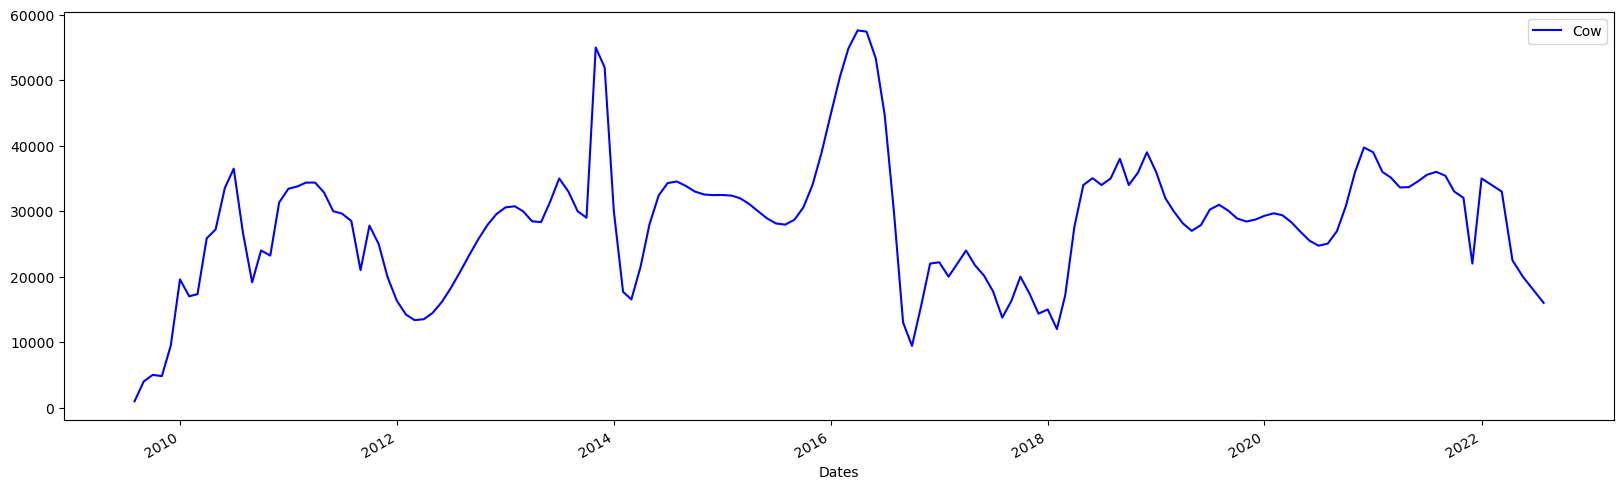

In [37]:
Cow.plot(figsize=(20,6), color= 'blue');

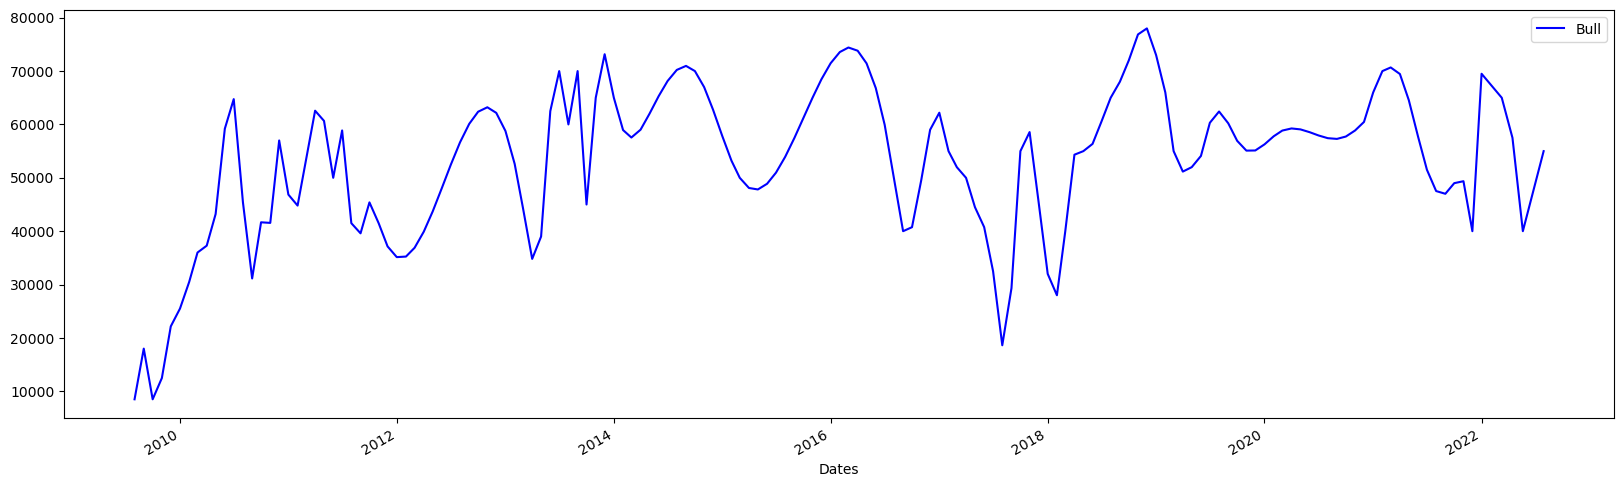

In [38]:
Bull.plot(figsize=(20,6),color= 'blue');

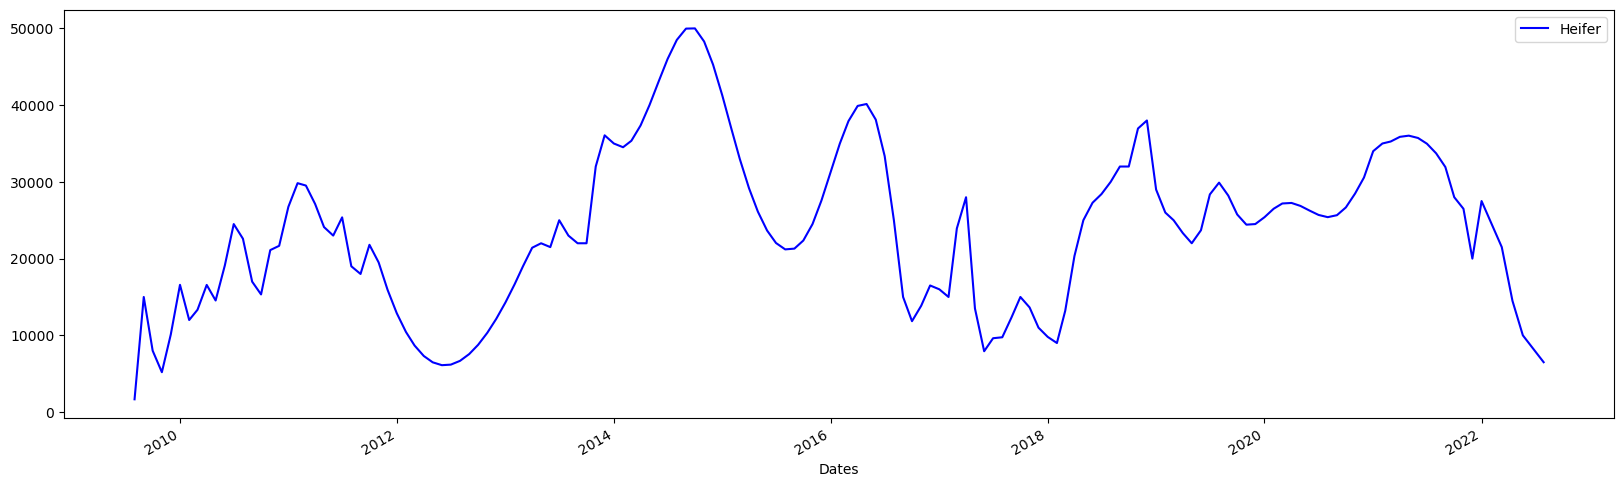

In [39]:
Heifer.plot(figsize=(20,6),color= 'blue');

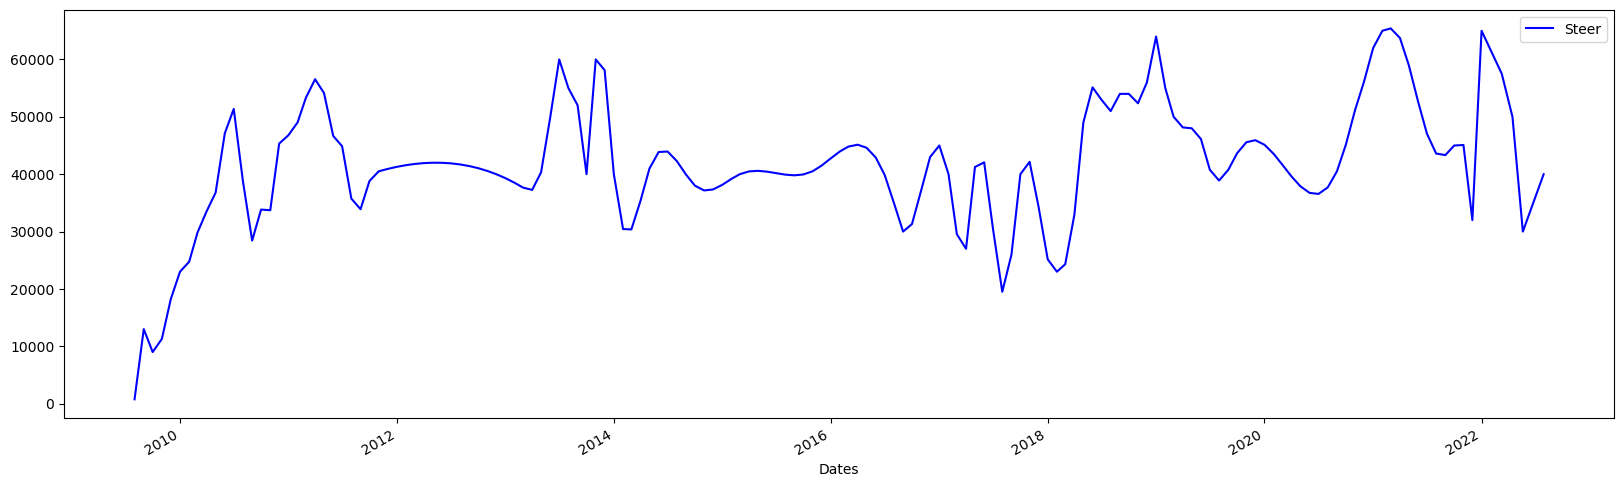

In [40]:
Steer.plot(figsize=(20,6),color= 'blue');

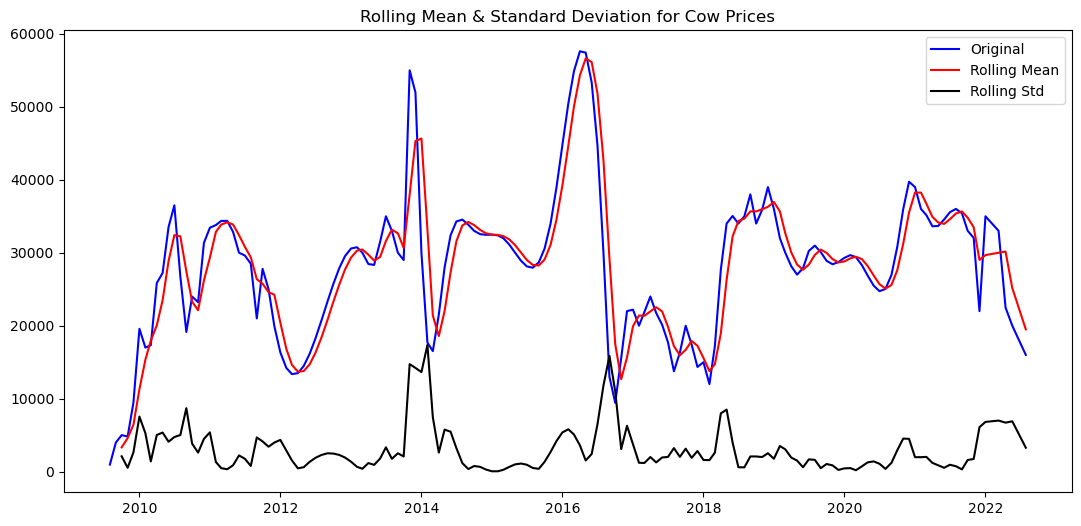

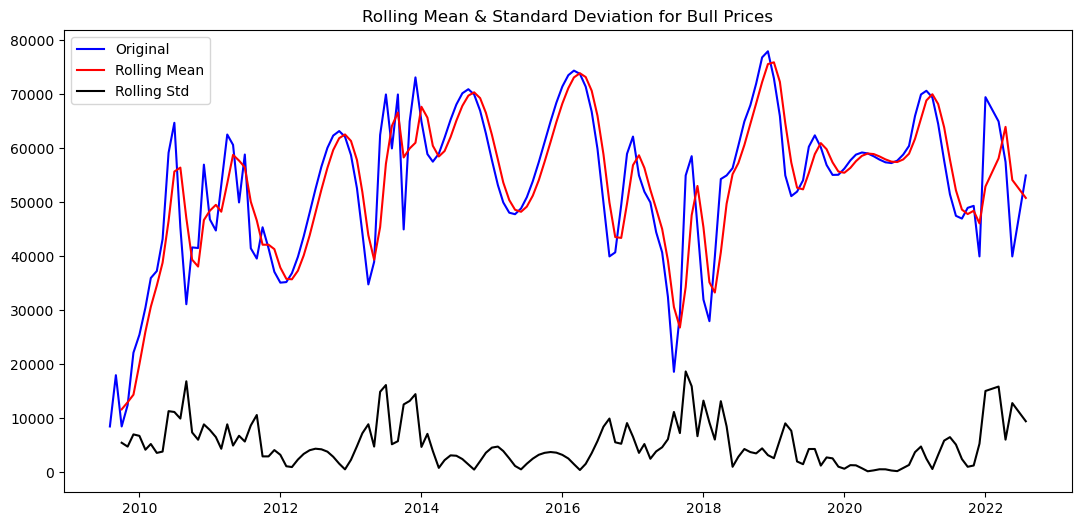

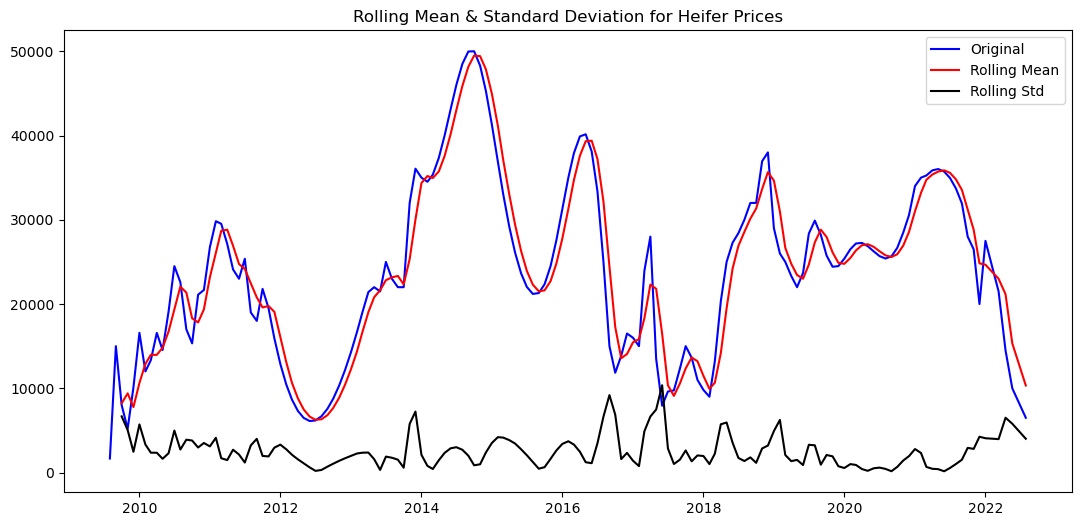

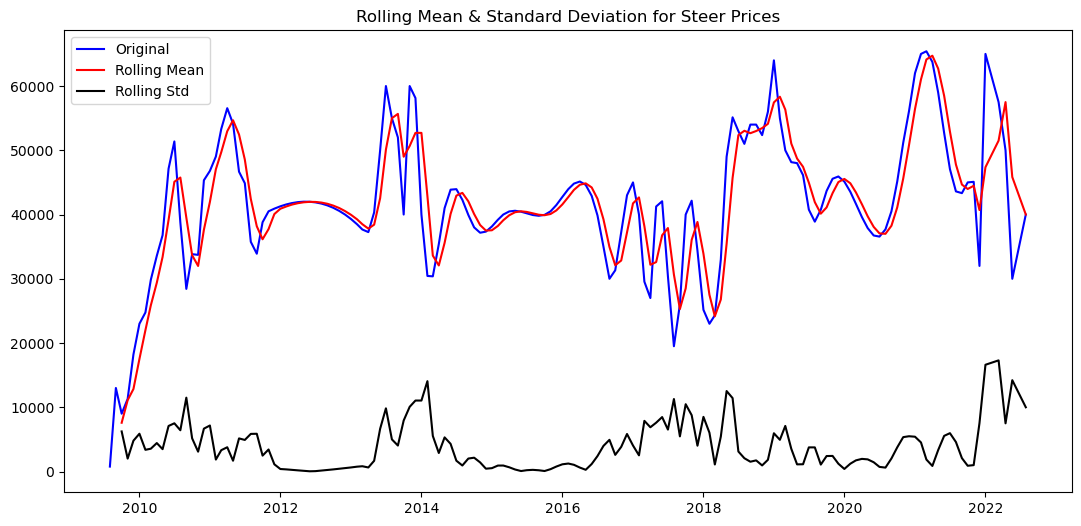

In [42]:

def plot_rolling_statistics(data, livestock_name, window=3):
    """
    Plot the rolling mean and standard deviation for a DataFrame.

    Parameters:
    - data: DataFrame to plot rolling statistics for.
    - livestock_name: Name of the livestock for which the rolling statistics are being plotted.
    - window: Size of the moving window for computing statistics (default=3).
    """
    roll_mean = data.rolling(window=window, center=False).mean()
    roll_std = data.rolling(window=window, center=False).std()  # Corrected 'df' to 'data'

    fig = plt.figure(figsize=(13, 6))
    plt.plot(data, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for {} Prices'.format(livestock_name))
    plt.show()

# List of DataFrames to plot rolling statistics for
dfs = [(Cow, 'Cow'), (Bull, 'Bull'), (Heifer, 'Heifer'), (Steer, 'Steer')]  # Assuming Cow, Bull, Heifer, and Steer are DataFrames

# Plot rolling statistics for each DataFrame in the list
for data, livestock_name in dfs:
    plot_rolling_statistics(data, livestock_name)


#### Stationarity
Checking for `Stationarity` using the Augmented Dickey-Fuller (ADF) Test

The ADF test is commonly used in econometrics, finance, and other fields dealing with time series data to determine the stationarity of a series before applying further analysis or modeling techniques.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
* We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [43]:
#Augmented Dickey–Fuller test:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(data_series):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(data_series, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
        
    return dfoutput


In [44]:
result = augmented_dickey_fuller_test(Cow['Cow'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.962636
p-value                          0.000026
#Lags Used                       1.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


* Test Statistic: The test statistic value of approximately -4.96.
* p-value: The p-value is approximately 0.000026, which is below the common significance levels ( 0.05 or 0.01). This suggests strong evidence against the null hypothesis (the time series has a unit root) and indicates that the time series is likely stationary.
* #Lags Used: The number of lags used in the regression when computing the test statistic, which is 1 in this case.
Number of Observations Used: The number of observations used in the ADF regression, which is 152.
* Critical Values: These are the critical values for the test statistic at the 1%, 5%, and 10% significance levels. The test statistic needs to be lower than these values for the null hypothesis to be rejected.
* The ADF test statistic is more negative than the critical values at all common significance levels, indicating that you can reject the null hypothesis of a unit root. Thus, the series appears to be stationary.

In [45]:
result = augmented_dickey_fuller_test(Bull['Bull'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.736200
p-value                          0.000072
#Lags Used                       1.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


In [46]:
result = augmented_dickey_fuller_test(Heifer['Heifer'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -3.160108
p-value                          0.022413
#Lags Used                       3.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


In [47]:
result = augmented_dickey_fuller_test(Steer['Steer'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.422901
p-value                          0.000270
#Lags Used                       4.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


### Seasonality

The Time Series has seasonality as there are prices vary with to seasons

In [48]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_time_series(data_series, freq='MS', model='additive'):
    # Fill missing values with the mean of the series
    data_series.fillna(data_series.mean(), inplace=True)
    
    # Decompose the time series data using an additive model
    decomposition = seasonal_decompose(data_series.resample(freq).mean().ffill(), model=model)
    
    # Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(data_series), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.suptitle('Decomposition of {} Time Series'.format(data_series.name))
    plt.tight_layout()
    plt.show()

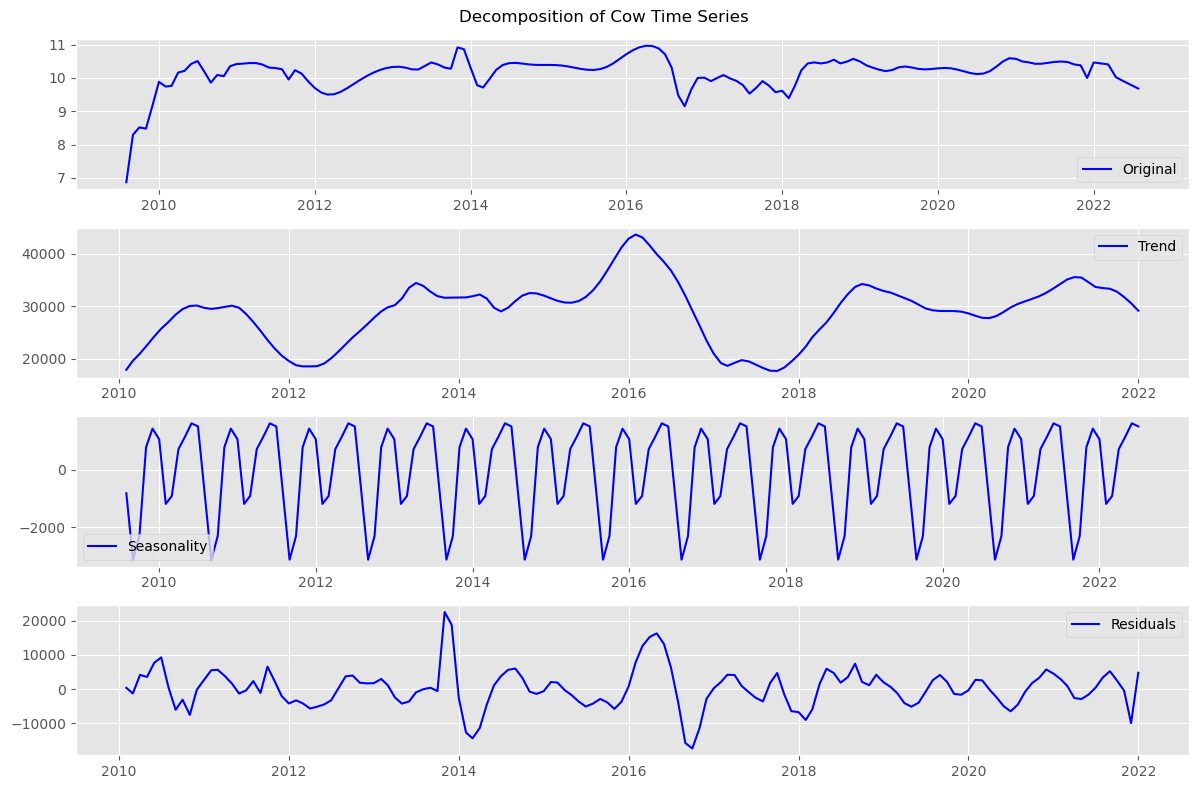

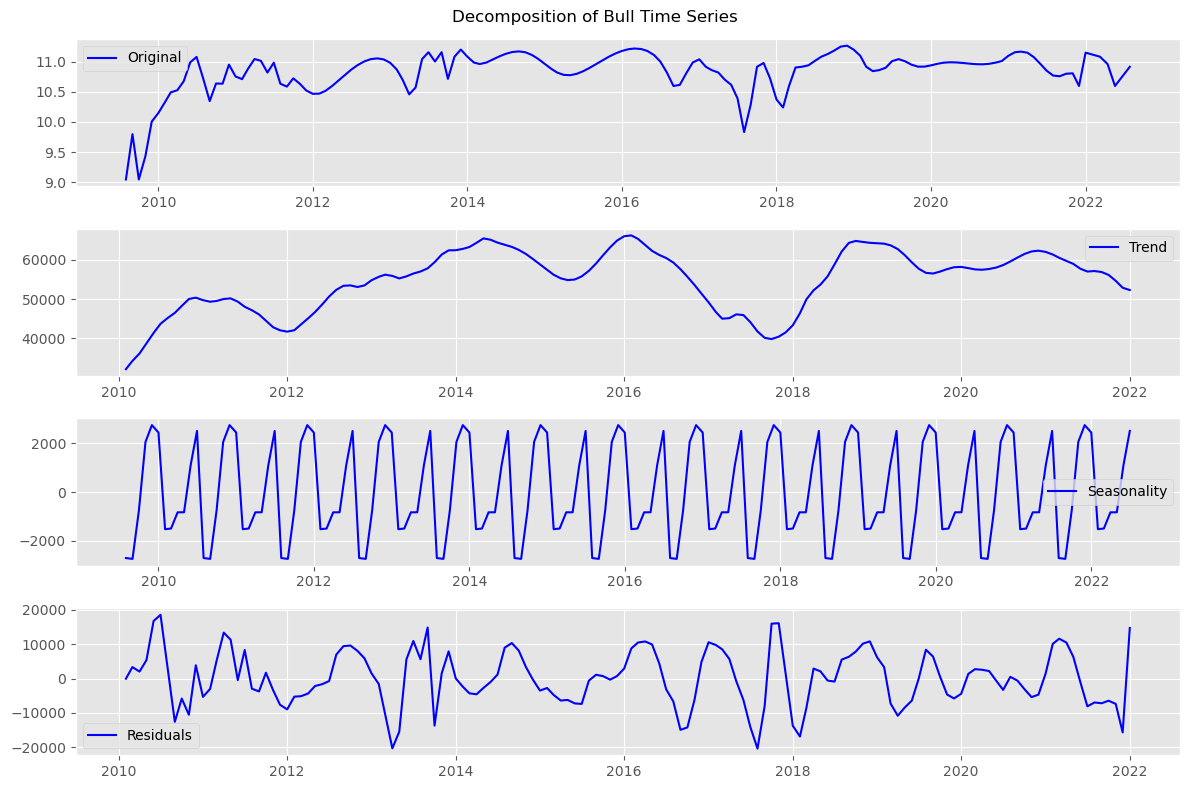

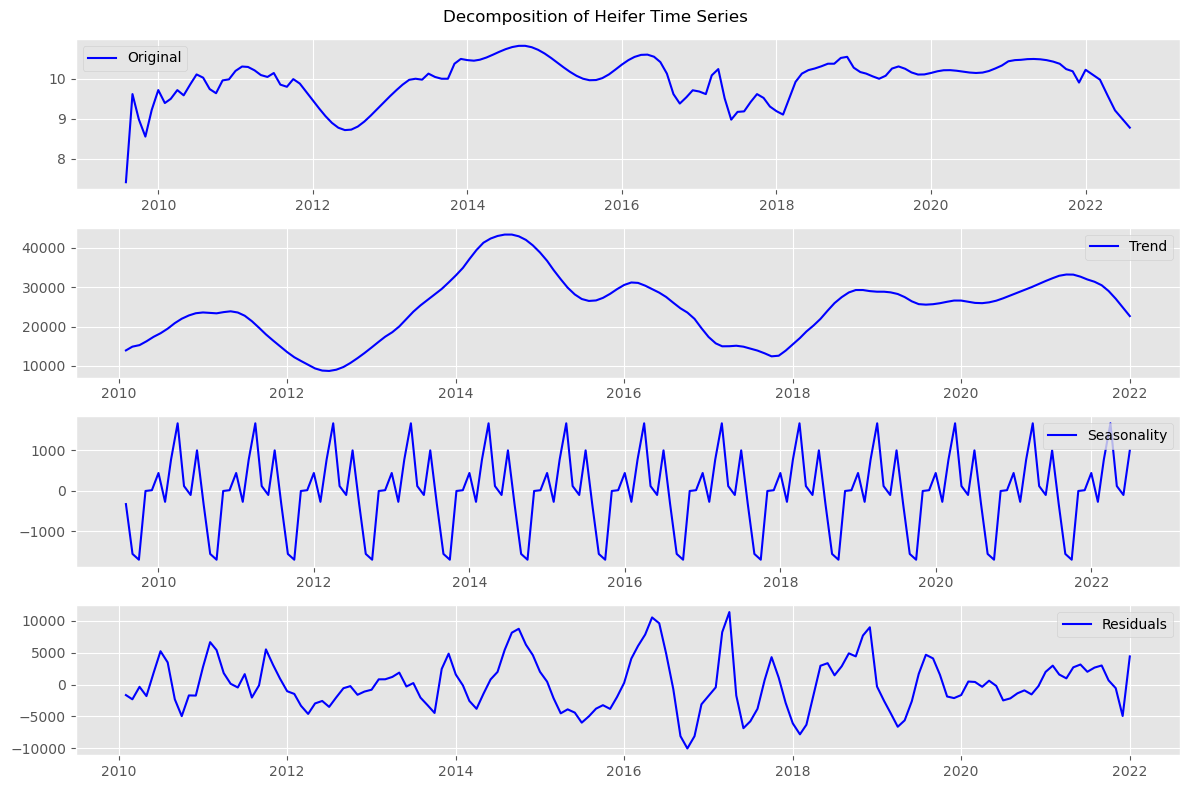

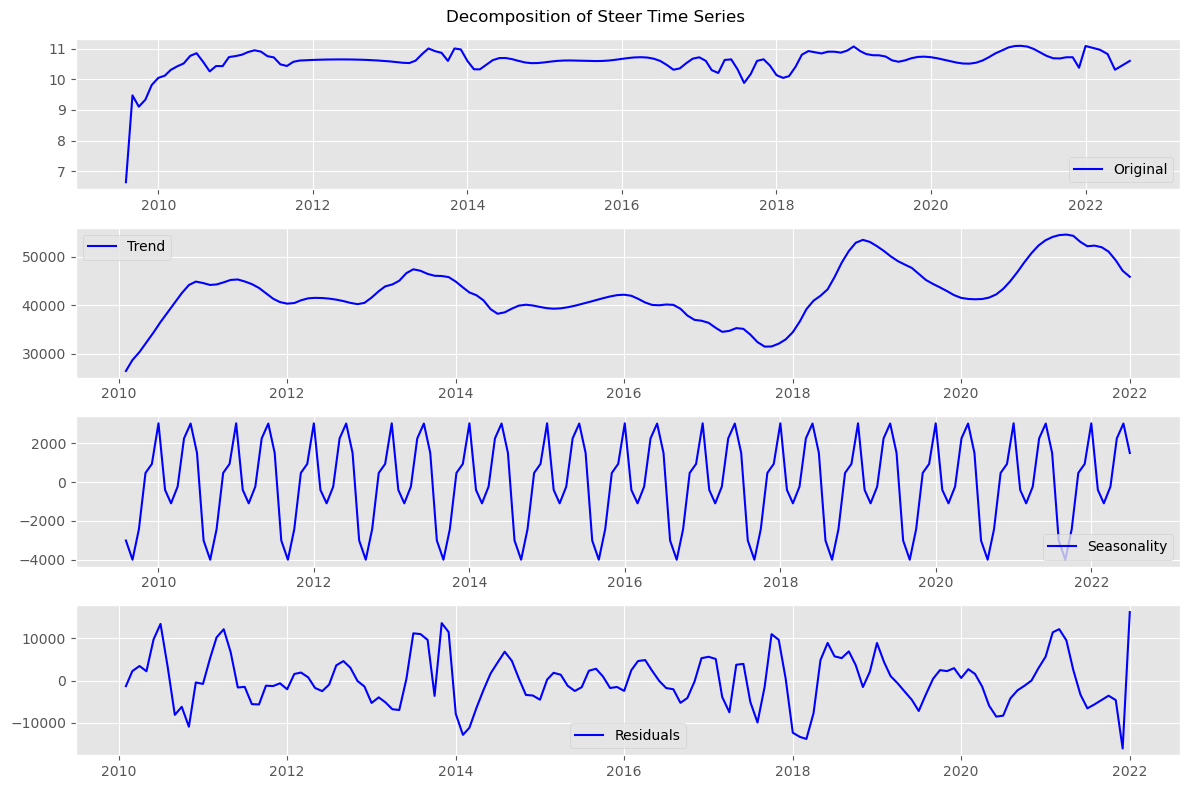

In [50]:
# Assuming you have the time series stored in variables Cow, Bull, Heifer, and Steer

time_series_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]
for series in time_series_list:
    decompose_time_series(series)


The parameters of the ARIMA model are defined as follows:

* p: The lag order, representing the number of lag observations incorporated in the model.
* d: Degree of differencing, denoting the number of times raw observations undergo differencing.
* q: Order of moving average, indicating the size of the moving average window.

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [53]:
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(Cow)
# plt.show()

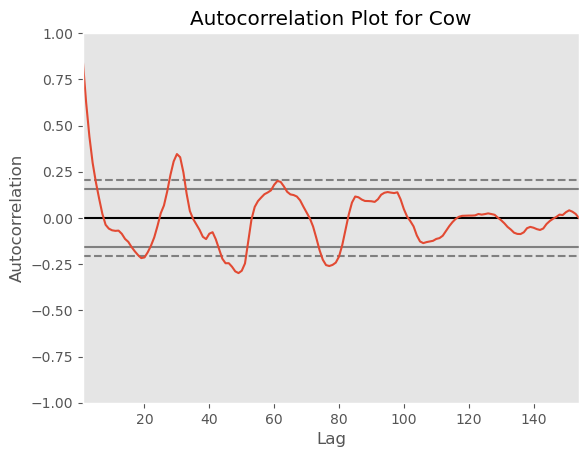

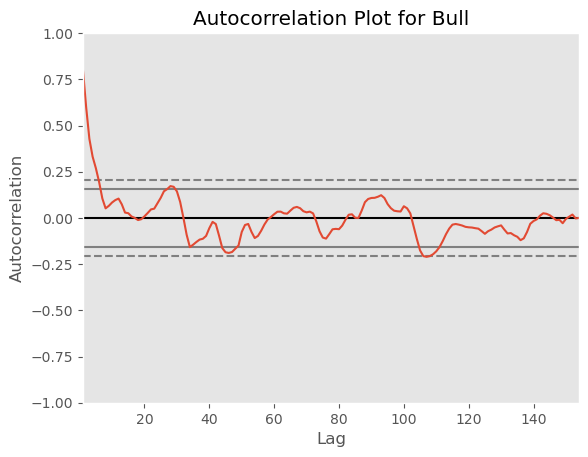

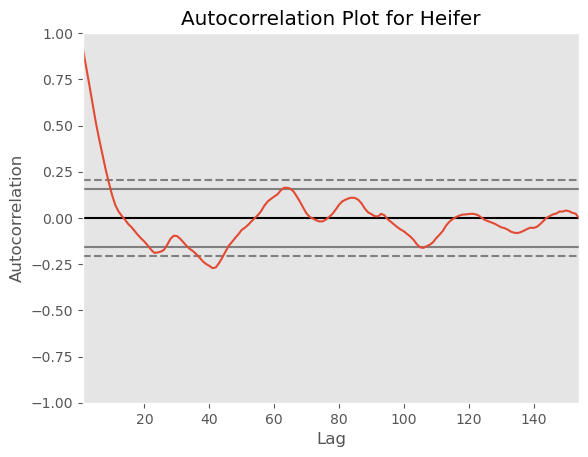

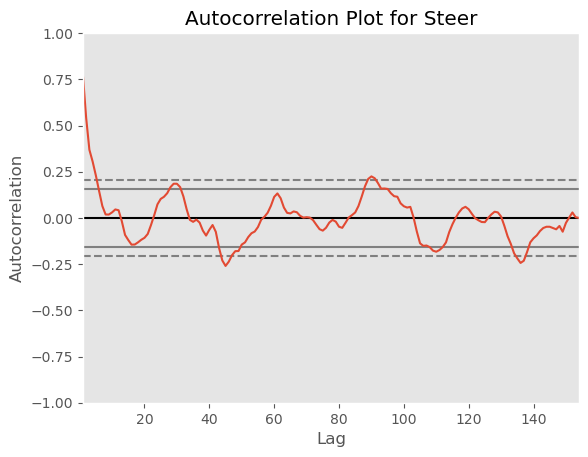

In [54]:
from pandas.plotting import autocorrelation_plot

ts_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]
for series in ts_list:
    autocorrelation_plot(series)
    plt.title('Autocorrelation Plot for {}'.format(series.name))
    plt.show()

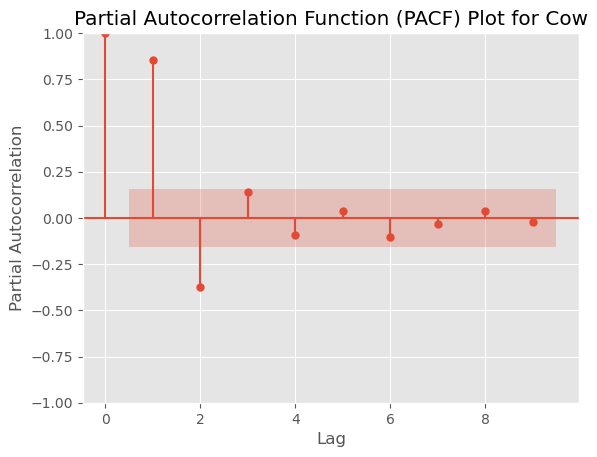

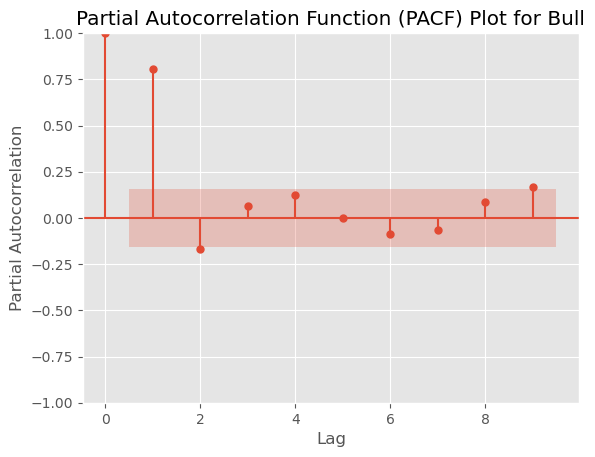

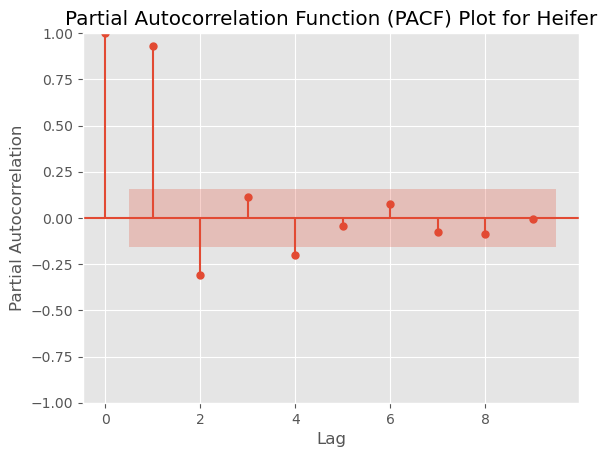

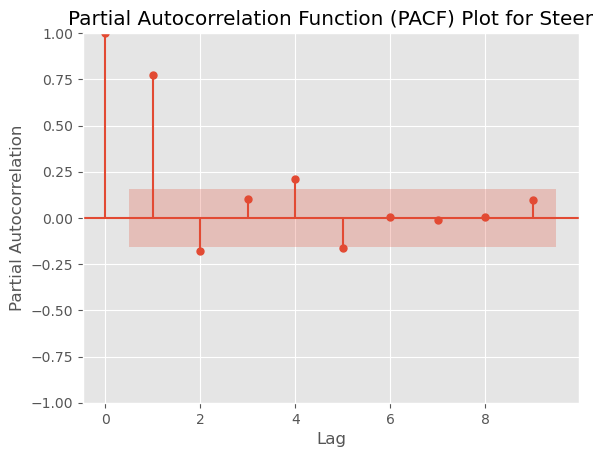

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf

ts_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]

for series in ts_list:
    plot_pacf(series, lags=9, method='ols')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.title('Partial Autocorrelation Function (PACF) Plot for {}'.format(series.name))
    plt.grid(True)
    plt.show()



These statistics provide insight into the distribution and variation of residuals, which are the differences between observed and predicted values in a regression analysis. The mean close to zero indicates that, on average, the residuals are centered around zero, suggesting that the model is unbiased. The standard deviation reflects the dispersion of residuals around the mean, with a relatively high value indicating considerable variability in the data. The minimum and maximum values represent the range of residuals, showing the extent of deviation from the predicted values. The quartiles (25th, 50th, and 75th percentiles) provide information about the distribution's spread and central tendency, with the median indicating the middle value of the dataset.

In [57]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [58]:
def grid_search_sarimax(pdq, pdqs, series):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(series,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit(disp=False)
                ans.append([comb, combs, output.aic])
                print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
            except Exception as e:
                print(e)
                continue

    # Find the best parameters
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    best_params = ans_df.loc[ans_df['aic'].idxmin()]
    print("Best Parameters (AIC): ", best_params)
    return best_params
best_params = grid_search_sarimax(pdq, pdqs, Cow)

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=3589.7853171527095
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=3241.7705949217407
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=3097.020080749976
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=2793.6866538834574
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=3117.836036840081
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=3070.9074531315423
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=2821.1438336465526
ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=2787.668769737101
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=3456.0151384326555
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=3165.118318916473
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=2955.1305623804747
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=2639.2347587789504
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=3200.7334493580083
ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=3156.071249939719
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=2732.3324566121446


predicted=14668.854433, expected=15000.000000
predicted=16783.780423, expected=12000.000000
predicted=11800.372853, expected=17166.530361
predicted=21270.142925, expected=27666.666667
predicted=30492.425400, expected=34000.000000
predicted=34671.002771, expected=35041.168963
predicted=34093.903119, expected=33997.549820
predicted=32392.449459, expected=35000.000000
predicted=35625.707525, expected=38000.000000
predicted=38278.471360, expected=34000.000000
predicted=29712.365764, expected=35882.785220
predicted=36748.325919, expected=39000.000000
predicted=38044.744538, expected=36000.000000
predicted=33396.578412, expected=32000.000000
predicted=30334.721410, expected=30000.000000
predicted=28845.072429, expected=28146.182784
predicted=27799.651261, expected=27000.000000
predicted=26795.109829, expected=27883.622514
predicted=27976.960330, expected=30250.461392
predicted=30915.832399, expected=30977.265419
predicted=30694.750292, expected=30079.377655
predicted=29467.079416, expected=2

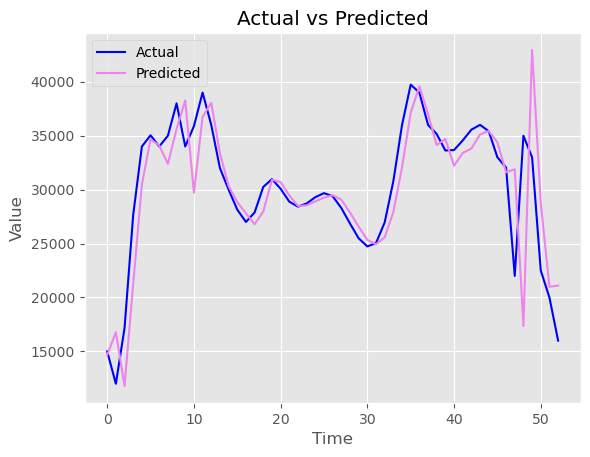

In [59]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Splitting the data into train and test sets
X = Cow.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(8, 1, 1 ))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, color='violet', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


predicted=12662.850943, expected=15000.000000
predicted=14639.151783, expected=12000.000000
predicted=11223.517865, expected=17166.530361
predicted=21670.909222, expected=27666.666667
predicted=30847.074426, expected=34000.000000
predicted=36151.764093, expected=35041.168963
predicted=34401.443393, expected=33997.549820
predicted=30983.469793, expected=35000.000000
predicted=34208.901651, expected=38000.000000
predicted=41332.309383, expected=34000.000000
predicted=33627.678342, expected=35882.785220
predicted=38366.668418, expected=39000.000000
predicted=38736.454168, expected=36000.000000
predicted=33101.094252, expected=32000.000000
predicted=32402.628754, expected=30000.000000
predicted=31534.139870, expected=28146.182784
predicted=27535.144352, expected=27000.000000
predicted=27442.154642, expected=27883.622514
predicted=27885.258895, expected=30250.461392
predicted=28892.686826, expected=30977.265419
predicted=29794.487200, expected=30079.377655
predicted=31234.156971, expected=2

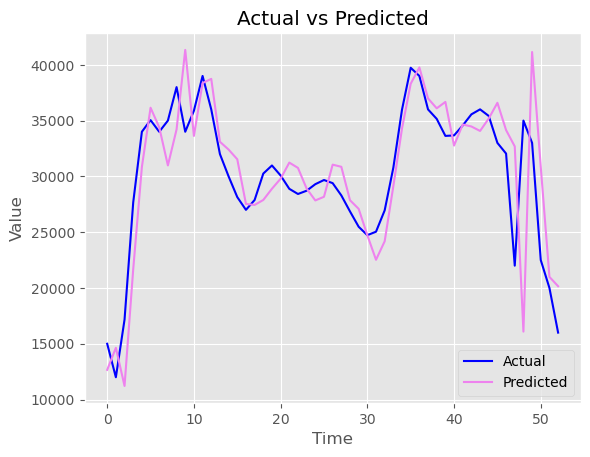

In [60]:
# Splitting the data into train and test sets
X = Cow.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
    model_fit = model.fit(disp=False)  # Suppress optimization process details
    output = model_fit.forecast()
    yhat = output[0]
    obs = test[t]
    predictions.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    history.append(obs)

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual', color= 'blue')
plt.plot(predictions, color='violet', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

The predictions have a relatively small RMSE which implies that the model can be used to make almost accurate predictions.

In [60]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [61]:
def grid_search_sarimax(pdq, pdqs, series):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(series,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit(disp=False)
                ans.append([comb, combs, output.aic])
                print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
            except Exception as e:
                print(e)
                continue

    # Find the best parameters
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    best_params = ans_df.loc[ans_df['aic'].idxmin()]
    print("Best Parameters (AIC): ", best_params)
    return best_params
best_params = grid_search_sarimax(pdq, pdqs, Heifer)

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=3548.200410647185
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=3213.51708609438
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=3102.265101755035
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=2813.635174607415
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=3119.6345302585123
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=3082.092125381346
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=2850.334320092946
ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=2813.3015905403977
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=3416.4820030823166
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=3129.836353363652
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=2964.3655918512623
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=2703.4900513175653
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=3164.6738034546333
ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=3121.2592360051603
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=2751.2342930761597
ARI

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44096D+00    |proj g|=  5.81930D-02

At iterate    5    f=  8.43462D+00    |proj g|=  1.78791D-02

At iterate   10    f=  8.41875D+00    |proj g|=  2.89317D-03

At iterate   15    f=  8.41874D+00    |proj g|=  1.80299D-04

At iterate   20    f=  8.41864D+00    |proj g|=  2.73276D-03


 This problem is unconstrained.



At iterate   25    f=  8.39640D+00    |proj g|=  7.41715D-02

At iterate   30    f=  8.39066D+00    |proj g|=  1.46816D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     43      1     0     0   1.468D-05   8.391D+00
  F =   8.3906600602120136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=11161.620084, expected=9800.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45164D+00    |proj g|=  5.86201D-02

At iterate    5    f=  8

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.44935D+00    |proj g|=  1.27766D-02

At iterate   10    f=  8.43265D+00    |proj g|=  6.17309D-05

At iterate   15    f=  8.43263D+00    |proj g|=  1.05011D-03

At iterate   20    f=  8.43087D+00    |proj g|=  1.63905D-02

At iterate   25    f=  8.40601D+00    |proj g|=  7.76185D-03

At iterate   30    f=  8.40465D+00    |proj g|=  2.67884D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     43      1     0     0   1.283D-06   8.405D+00
  F =   8.4046456555583902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=10519.691355, expected=13205.163095
RUNNI

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47937D+00    |proj g|=  4.48685D-02

At iterate    5    f=  8.47566D+00    |proj g|=  1.44869D-02

At iterate   10    f=  8.45756D+00    |proj g|=  1.36944D-03

At iterate   15    f=  8.45756D+00    |proj g|=  2.32307D-04

At iterate   20    f=  8.45742D+00    |proj g|=  3.95086D-03

At iterate   25    f=  8.44149D+00    |proj g|=  3.99502D-02

At iterate   30    f=  8.42974D+00    |proj g|=  2.60539D-03

At iterate   35    f=  8.42952D+00    |proj g|=  6.55884D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.45515D+00    |proj g|=  7.26441D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   6.477D-06   8.444D+00
  F =   8.4435559893846506     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=26823.408271, expected=27281.505903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.73316D+00    |proj g|=  5.93864D-01

At iterate    5    f=  8.49911D+00    |proj g|=  9.87856D-04

At iterate   10    f=  

 This problem is unconstrained.
 This problem is unconstrained.


predicted=26841.036594, expected=30000.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54158D+00    |proj g|=  5.11006D-02

At iterate    5    f=  8.53659D+00    |proj g|=  3.49750D-04

At iterate   10    f=  8.53651D+00    |proj g|=  6.70134D-03
  ys=-1.027E-01  -gs= 1.121E-03 BFGS update SKIPPED

At iterate   15    f=  8.51392D+00    |proj g|=  2.69884D-02

At iterate   20    f=  8.51263D+00    |proj g|=  3.67852D-04

At iterate   25    f=  8.51250D+00    |proj g|=  6.70156D-03

At iterate   30    f=  8.49376D+00    |proj g|=  8.12033D-02

At iterate   35    f=  8.46483D+00    |proj g|=  1.37151D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at f

 This problem is unconstrained.



At iterate   15    f=  8.52024D+00    |proj g|=  5.68408D-04

At iterate   20    f=  8.51965D+00    |proj g|=  8.63644D-03

At iterate   25    f=  8.48200D+00    |proj g|=  4.27764D-02

At iterate   30    f=  8.47113D+00    |proj g|=  5.07296D-03

At iterate   35    f=  8.47036D+00    |proj g|=  9.26261D-04

At iterate   40    f=  8.47029D+00    |proj g|=  2.63371D-04

At iterate   45    f=  8.47028D+00    |proj g|=  1.94596D-04

At iterate   50    f=  8.47028D+00    |proj g|=  2.94863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     60      1     1     0   2.949D-05   8.470D+00
  F =   8.47028089558

 This problem is unconstrained.



At iterate   30    f=  8.47693D+00    |proj g|=  1.02600D-02

At iterate   35    f=  8.47579D+00    |proj g|=  1.08544D-04

At iterate   40    f=  8.47563D+00    |proj g|=  3.40500D-04

At iterate   45    f=  8.47560D+00    |proj g|=  2.27523D-05

At iterate   50    f=  8.47560D+00    |proj g|=  1.27935D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     63      1     0     0   1.279D-04   8.476D+00
  F =   8.4755957351816100     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
predicted=33460.674671, expected=36954.802780
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   10    f=  8.54018D+00    |proj g|=  7.47648D-04

At iterate   15    f=  8.54018D+00    |proj g|=  3.24225D-04

At iterate   20    f=  8.53989D+00    |proj g|=  5.63169D-03

At iterate   25    f=  8.50560D+00    |proj g|=  5.09992D-02

At iterate   30    f=  8.48712D+00    |proj g|=  4.09909D-03

At iterate   35    f=  8.48558D+00    |proj g|=  1.89074D-03

At iterate   40    f=  8.48545D+00    |proj g|=  2.11173D-04

At iterate   45    f=  8.48544D+00    |proj g|=  9.04798D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     61      1     0     0   5.998D-06   8.485D+00
  F =   8.48543827981

 This problem is unconstrained.
 This problem is unconstrained.


predicted=37899.620560, expected=29000.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.59203D+00    |proj g|=  3.78948D-02

At iterate    5    f=  8.57272D+00    |proj g|=  3.45889D-02

At iterate   10    f=  8.57006D+00    |proj g|=  9.56966D-05

At iterate   15    f=  8.56992D+00    |proj g|=  4.29034D-03

At iterate   20    f=  8.54801D+00    |proj g|=  6.19225D-02

At iterate   25    f=  8.52568D+00    |proj g|=  4.13682D-03

At iterate   30    f=  8.52507D+00    |proj g|=  5.33452D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

         

 This problem is unconstrained.



At iterate   25    f=  8.53493D+00    |proj g|=  3.24641D-02

At iterate   30    f=  8.53173D+00    |proj g|=  5.08957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     45      1     0     0   8.298D-06   8.532D+00
  F =   8.5317082417963039     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=29044.054492, expected=25000.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.60685D+00    |proj g|=  3.33451D-02

At iterate    5    f=  

 This problem is unconstrained.



At iterate   20    f=  8.58572D+00    |proj g|=  1.83429D-02

At iterate   25    f=  8.54175D+00    |proj g|=  1.40002D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     37      1     0     0   1.826D-06   8.542D+00
  F =   8.5417460195910184     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=24391.919334, expected=23324.026965
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.82329D+00    |proj g|=  5.56424D-01

At iterate    5    f=  

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   2.370D-06   8.547D+00
  F =   8.5466993875348702     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=21213.955339, expected=22000.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62616D+00    |proj g|=  4.07626D-02

At iterate    5    f=  8.62244D+00    |proj g|=  1.49376D-02

At iterate   10    f=  8.60388D+00    |proj g|=  2.64701D-03

At iterate   15    f=  

 This problem is unconstrained.



At iterate    5    f=  8.62767D+00    |proj g|=  1.05355D-02

At iterate   10    f=  8.60881D+00    |proj g|=  2.51007D-03

At iterate   15    f=  8.60879D+00    |proj g|=  5.94387D-04

At iterate   20    f=  8.60780D+00    |proj g|=  1.07083D-02

At iterate   25    f=  8.57512D+00    |proj g|=  9.80040D-02

At iterate   30    f=  8.55700D+00    |proj g|=  1.56441D-03

At iterate   35    f=  8.55650D+00    |proj g|=  2.89518D-04

At iterate   40    f=  8.55646D+00    |proj g|=  1.65219D-05

At iterate   45    f=  8.55645D+00    |proj g|=  7.95685D-05

At iterate   50    f=  8.55645D+00    |proj g|=  7.42251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.61977D+00    |proj g|=  4.82936D-02

At iterate   10    f=  8.61581D+00    |proj g|=  9.80545D-05

At iterate   15    f=  8.61580D+00    |proj g|=  2.60370D-03

At iterate   20    f=  8.61423D+00    |proj g|=  2.91362D-02

At iterate   25    f=  8.56724D+00    |proj g|=  5.59320D-02

At iterate   30    f=  8.56343D+00    |proj g|=  1.69403D-03

At iterate   35    f=  8.56336D+00    |proj g|=  5.79235D-04

At iterate   40    f=  8.56334D+00    |proj g|=  3.23880D-04

At iterate   45    f=  8.56334D+00    |proj g|=  2.31646D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     55   

 This problem is unconstrained.



At iterate   20    f=  8.61683D+00    |proj g|=  4.31212D-02

At iterate   25    f=  8.56826D+00    |proj g|=  2.91141D-03

At iterate   30    f=  8.56801D+00    |proj g|=  8.56176D-05

At iterate   35    f=  8.56795D+00    |proj g|=  5.90191D-04

At iterate   40    f=  8.56795D+00    |proj g|=  1.03422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     50      1     0     0   6.343D-07   8.568D+00
  F =   8.5679462375698581     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=30819.257172, expected=28214.090346
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate    5    f=  8.62802D+00    |proj g|=  3.72260D-02

At iterate   10    f=  8.62578D+00    |proj g|=  7.75733D-05

At iterate   15    f=  8.62573D+00    |proj g|=  2.13376D-03

At iterate   20    f=  8.61751D+00    |proj g|=  3.36734D-02

At iterate   25    f=  8.57715D+00    |proj g|=  9.81157D-03

At iterate   30    f=  8.57448D+00    |proj g|=  5.24620D-04

At iterate   35    f=  8.57434D+00    |proj g|=  1.16832D-03

At iterate   40    f=  8.57432D+00    |proj g|=  5.97737D-05

At iterate   45    f=  8.57432D+00    |proj g|=  7.48788D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     54   

 This problem is unconstrained.



At iterate   25    f=  8.58083D+00    |proj g|=  7.90247D-03

At iterate   30    f=  8.57855D+00    |proj g|=  6.80321D-04

At iterate   35    f=  8.57842D+00    |proj g|=  3.58580D-04

At iterate   40    f=  8.57840D+00    |proj g|=  1.63987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     51      1     0     0   1.739D-04   8.578D+00
  F =   8.5784009489350126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=27024.358993, expected=24423.480985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  8.64831D+00    |proj g|=  7.18592D-02

At iterate   10    f=  8.63869D+00    |proj g|=  7.92623D-05

At iterate   15    f=  8.63868D+00    |proj g|=  1.10169D-03

At iterate   20    f=  8.63655D+00    |proj g|=  1.81556D-02

At iterate   25    f=  8.59161D+00    |proj g|=  1.71323D-02

At iterate   30    f=  8.58505D+00    |proj g|=  1.25744D-03

At iterate   35    f=  8.58461D+00    |proj g|=  5.31720D-04

At iterate   40    f=  8.58456D+00    |proj g|=  1.61448D-04

At iterate   45    f=  8.58456D+00    |proj g|=  1.32972D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     47     56   

 This problem is unconstrained.



At iterate   20    f=  8.62336D+00    |proj g|=  6.47764D-02

At iterate   25    f=  8.58989D+00    |proj g|=  3.94109D-03

At iterate   30    f=  8.58852D+00    |proj g|=  6.47414D-04

At iterate   35    f=  8.58842D+00    |proj g|=  3.23615D-04

At iterate   40    f=  8.58840D+00    |proj g|=  1.49605D-04

At iterate   45    f=  8.58840D+00    |proj g|=  9.98064D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     53      1     0     0   9.981D-06   8.588D+00
  F =   8.5884021260927099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=24743.325736, expected=25395.651569
RUNNI

 This problem is unconstrained.



At iterate    5    f=  8.66939D+00    |proj g|=  2.66769D-02

At iterate   10    f=  8.65366D+00    |proj g|=  1.56507D-03

At iterate   15    f=  8.65364D+00    |proj g|=  3.67773D-04

At iterate   20    f=  8.65337D+00    |proj g|=  8.46993D-03

At iterate   25    f=  8.62885D+00    |proj g|=  8.56800D-02

At iterate   30    f=  8.59415D+00    |proj g|=  5.71565D-03

At iterate   35    f=  8.59230D+00    |proj g|=  2.32422D-04

At iterate   40    f=  8.59216D+00    |proj g|=  5.67975D-04

At iterate   45    f=  8.59214D+00    |proj g|=  6.85567D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     64   

 This problem is unconstrained.



At iterate    5    f=  8.67007D+00    |proj g|=  8.27824D-02

At iterate   10    f=  8.65760D+00    |proj g|=  8.31720D-05

At iterate   15    f=  8.65758D+00    |proj g|=  1.47828D-03

At iterate   20    f=  8.65413D+00    |proj g|=  2.23441D-02

At iterate   25    f=  8.60370D+00    |proj g|=  2.26607D-02

At iterate   30    f=  8.59686D+00    |proj g|=  9.70481D-04

At iterate   35    f=  8.59642D+00    |proj g|=  1.64424D-04

At iterate   40    f=  8.59639D+00    |proj g|=  6.88438D-05

At iterate   45    f=  8.59638D+00    |proj g|=  1.43897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     57   

 This problem is unconstrained.



At iterate   25    f=  8.60348D+00    |proj g|=  8.58420D-03

At iterate   30    f=  8.60068D+00    |proj g|=  2.26881D-03

At iterate   35    f=  8.60046D+00    |proj g|=  5.92225D-05

At iterate   40    f=  8.60043D+00    |proj g|=  2.03276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     52      1     0     0   2.463D-06   8.600D+00
  F =   8.6004278436437129     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=27526.505955, expected=27253.166240
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate   10    f=  8.66599D+00    |proj g|=  2.70092D-04

At iterate   15    f=  8.66564D+00    |proj g|=  5.73231D-03

At iterate   20    f=  8.63224D+00    |proj g|=  1.38950D-01

At iterate   25    f=  8.60378D+00    |proj g|=  1.08663D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     34      1     0     0   2.535D-06   8.604D+00
  F =   8.6037811855519521     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=25575.215229, expected=26867.122141
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate   10    f=  8.66987D+00    |proj g|=  2.33375D-04

At iterate   15    f=  8.66958D+00    |proj g|=  5.04305D-03

At iterate   20    f=  8.63188D+00    |proj g|=  6.01672D-02

At iterate   25    f=  8.60928D+00    |proj g|=  3.83110D-03

At iterate   30    f=  8.60775D+00    |proj g|=  4.57871D-04

At iterate   35    f=  8.60764D+00    |proj g|=  9.34875D-05

At iterate   40    f=  8.60761D+00    |proj g|=  7.29417D-05

At iterate   45    f=  8.60760D+00    |proj g|=  3.06279D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     48     55      1     0     0   4.806D-06   8.608D+00
  F =   8.60760451876

 This problem is unconstrained.



At iterate   25    f=  8.61142D+00    |proj g|=  9.34134D-04

At iterate   30    f=  8.61141D+00    |proj g|=  1.58130D-03

At iterate   35    f=  8.61136D+00    |proj g|=  2.53042D-05

At iterate   40    f=  8.61135D+00    |proj g|=  5.29393D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     51      1     0     0   1.808D-06   8.611D+00
  F =   8.6113493094154059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=26987.789952, expected=25692.952644
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate   10    f=  8.67872D+00    |proj g|=  8.58451D-05

At iterate   15    f=  8.67863D+00    |proj g|=  2.82758D-03

At iterate   20    f=  8.66228D+00    |proj g|=  5.16117D-02

At iterate   25    f=  8.61825D+00    |proj g|=  8.62219D-03

At iterate   30    f=  8.61527D+00    |proj g|=  3.55800D-04

At iterate   35    f=  8.61504D+00    |proj g|=  3.22387D-04

At iterate   40    f=  8.61502D+00    |proj g|=  1.06163D-04

At iterate   45    f=  8.61501D+00    |proj g|=  1.44211D-04

At iterate   50    f=  8.61501D+00    |proj g|=  8.75779D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     59   

 This problem is unconstrained.



At iterate   20    f=  8.66648D+00    |proj g|=  5.47216D-02

At iterate   25    f=  8.62235D+00    |proj g|=  9.69038D-03

At iterate   30    f=  8.61891D+00    |proj g|=  1.03224D-03

At iterate   35    f=  8.61865D+00    |proj g|=  6.67548D-04

At iterate   40    f=  8.61862D+00    |proj g|=  9.93941D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     51      1     0     0   8.433D-06   8.619D+00
  F =   8.6186192477116794     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=26215.980667, expected=25658.610623
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate    5    f=  8.68778D+00    |proj g|=  3.15716D-02

At iterate   10    f=  8.68525D+00    |proj g|=  8.66992D-05

At iterate   15    f=  8.68518D+00    |proj g|=  2.51827D-03

At iterate   20    f=  8.67235D+00    |proj g|=  4.81098D-02

At iterate   25    f=  8.62505D+00    |proj g|=  9.06195D-03

At iterate   30    f=  8.62191D+00    |proj g|=  5.53664D-04

At iterate   35    f=  8.62168D+00    |proj g|=  8.33673D-04

At iterate   40    f=  8.62164D+00    |proj g|=  3.67340D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     49      1     0     0   9.002D-06   8.622D+00
  F =   8.62163626134

 This problem is unconstrained.



At iterate   20    f=  8.68689D+00    |proj g|=  3.52071D-02

At iterate   25    f=  8.62689D+00    |proj g|=  1.20160D-02

At iterate   30    f=  8.62605D+00    |proj g|=  6.50789D-03

At iterate   35    f=  8.62563D+00    |proj g|=  1.44241D-04

At iterate   40    f=  8.62559D+00    |proj g|=  1.36783D-05

At iterate   45    f=  8.62559D+00    |proj g|=  5.22794D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     56      1     0     0   1.472D-06   8.626D+00
  F =   8.6255868509767684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=29057.892900, expected=28475.148339
RUNNI

 This problem is unconstrained.



At iterate   25    f=  8.62855D+00    |proj g|=  1.52289D-03

At iterate   30    f=  8.62848D+00    |proj g|=  6.46926D-04

At iterate   35    f=  8.62847D+00    |proj g|=  1.88850D-05

At iterate   40    f=  8.62847D+00    |proj g|=  2.08720D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     54      1     0     0   3.536D-06   8.628D+00
  F =   8.6284663556340586     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=28907.435544, expected=30567.844534
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  8.69851D+00    |proj g|=  4.00379D-02

At iterate   10    f=  8.69585D+00    |proj g|=  2.72072D-04

At iterate   15    f=  8.69577D+00    |proj g|=  5.61411D-03

At iterate   20    f=  8.68718D+00    |proj g|=  5.80606D-02

At iterate   25    f=  8.63226D+00    |proj g|=  4.79947D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     37      1     0     0   4.122D-05   8.632D+00
  F =   8.6321727198614511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=31400.115342, expected=34000.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate    5    f=  8.70152D+00    |proj g|=  1.10649D-02

At iterate   10    f=  8.70130D+00    |proj g|=  2.96993D-04

At iterate   15    f=  8.70085D+00    |proj g|=  4.69079D-03

At iterate   20    f=  8.63761D+00    |proj g|=  1.76375D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     32      1     0     0   3.391D-06   8.637D+00
  F =   8.6370865294001096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=34846.644846, expected=35000.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  8.70479D+00    |proj g|=  1.88477D-02

At iterate   10    f=  8.70416D+00    |proj g|=  6.30508D-04

At iterate   15    f=  8.70041D+00    |proj g|=  1.99398D-02

At iterate   20    f=  8.64547D+00    |proj g|=  9.38866D-03

At iterate   25    f=  8.64029D+00    |proj g|=  9.76646D-04

At iterate   30    f=  8.63974D+00    |proj g|=  5.44110D-04

At iterate   35    f=  8.63966D+00    |proj g|=  4.75270D-04

At iterate   40    f=  8.63965D+00    |proj g|=  4.58765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     49      1     0     0   2.811D-06   8.640D+00
  F =   8.63965128819

 This problem is unconstrained.



At iterate   20    f=  8.64791D+00    |proj g|=  1.34921D-02

At iterate   25    f=  8.64295D+00    |proj g|=  7.23906D-04

At iterate   30    f=  8.64255D+00    |proj g|=  2.87819D-04

At iterate   35    f=  8.64252D+00    |proj g|=  3.52985D-04

At iterate   40    f=  8.64251D+00    |proj g|=  5.31895D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     46      1     0     0   5.319D-06   8.643D+00
  F =   8.6425108570837530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=35692.379882, expected=35868.831698
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   10    f=  8.70955D+00    |proj g|=  2.72776D-04

At iterate   15    f=  8.70921D+00    |proj g|=  4.19132D-03

At iterate   20    f=  8.65795D+00    |proj g|=  1.19194D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     33      1     0     0   4.368D-06   8.645D+00
  F =   8.6449588323596789     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=34528.779085, expected=36022.200929
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate   10    f=  8.71251D+00    |proj g|=  9.73298D-04

At iterate   15    f=  8.70858D+00    |proj g|=  2.17251D-02

At iterate   20    f=  8.65462D+00    |proj g|=  1.36278D-02

At iterate   25    f=  8.64866D+00    |proj g|=  7.75697D-04

At iterate   30    f=  8.64818D+00    |proj g|=  6.06352D-04

At iterate   35    f=  8.64811D+00    |proj g|=  1.09063D-04

At iterate   40    f=  8.64811D+00    |proj g|=  7.60899D-05

At iterate   45    f=  8.64811D+00    |proj g|=  3.09777D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     48     55      1     0     0   1.133D-05   8.648D+00
  F =   8.64810747311

 This problem is unconstrained.



At iterate   20    f=  8.66948D+00    |proj g|=  5.21363D-02

At iterate   25    f=  8.65192D+00    |proj g|=  1.88178D-03

At iterate   30    f=  8.65090D+00    |proj g|=  4.25201D-04

At iterate   35    f=  8.65082D+00    |proj g|=  3.49335D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     44      1     0     0   5.025D-06   8.651D+00
  F =   8.6508062772025855     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=36417.050519, expected=34972.649492
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  8.71783D+00    |proj g|=  9.20736D-04

At iterate   10    f=  8.71782D+00    |proj g|=  4.81582D-04

At iterate   15    f=  8.71710D+00    |proj g|=  8.38236D-03

At iterate   20    f=  8.67691D+00    |proj g|=  6.37229D-02

At iterate   25    f=  8.65504D+00    |proj g|=  2.18201D-03

At iterate   30    f=  8.65391D+00    |proj g|=  1.65940D-03

At iterate   35    f=  8.65380D+00    |proj g|=  3.50482D-05

At iterate   40    f=  8.65378D+00    |proj g|=  1.45679D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     49      1     0     0   9.920D-05   8.654D+00
  F =   8.65377880506

 This problem is unconstrained.



At iterate   20    f=  8.67492D+00    |proj g|=  5.63513D-02

At iterate   25    f=  8.65708D+00    |proj g|=  2.52354D-03

At iterate   30    f=  8.65615D+00    |proj g|=  1.57588D-04

At iterate   35    f=  8.65603D+00    |proj g|=  4.66873D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     45      1     0     0   5.787D-06   8.656D+00
  F =   8.6560188881686777     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=34041.479773, expected=31936.513538
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  8.72309D+00    |proj g|=  2.56225D-04

At iterate   10    f=  8.72303D+00    |proj g|=  4.71803D-03

At iterate   15    f=  8.71562D+00    |proj g|=  6.71102D-02

At iterate   20    f=  8.66181D+00    |proj g|=  4.42749D-03

At iterate   25    f=  8.66003D+00    |proj g|=  2.94634D-03

At iterate   30    f=  8.65975D+00    |proj g|=  1.36674D-03

At iterate   35    f=  8.65970D+00    |proj g|=  1.50261D-04

At iterate   40    f=  8.65970D+00    |proj g|=  5.66365D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     48      1     0     0   1.698D-05   8.660D+00
  F =   8.65969582456

 This problem is unconstrained.



At iterate   20    f=  8.66428D+00    |proj g|=  8.16709D-04

At iterate   25    f=  8.66420D+00    |proj g|=  5.79823D-03

At iterate   30    f=  8.66388D+00    |proj g|=  1.15316D-03

At iterate   35    f=  8.66385D+00    |proj g|=  3.91201D-04

At iterate   40    f=  8.66384D+00    |proj g|=  3.43856D-05

At iterate   45    f=  8.66384D+00    |proj g|=  5.66800D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     52      1     0     0   5.668D-06   8.664D+00
  F =   8.6638436412484872     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=28133.513515, expected=26492.227723
RUNNI

 This problem is unconstrained.



At iterate   25    f=  8.66776D+00    |proj g|=  2.67098D-03

At iterate   30    f=  8.66694D+00    |proj g|=  1.89307D-04

At iterate   35    f=  8.66682D+00    |proj g|=  3.78904D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     46      1     0     0   9.505D-06   8.667D+00
  F =   8.6668045298012029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=26447.449093, expected=20000.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  8.74663D+00    |proj g|=  3.46632D-03

At iterate   10    f=  8.74659D+00    |proj g|=  1.30548D-03

At iterate   15    f=  8.74398D+00    |proj g|=  1.71233D-02

At iterate   20    f=  8.68307D+00    |proj g|=  5.52223D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   7.143D-06   8.683D+00
  F =   8.6830644623378621     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=16696.048801, expected=27500.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  8.77798D+00    |proj g|=  1.60938D-04

At iterate   10    f=  8.77798D+00    |proj g|=  1.12969D-03

At iterate   15    f=  8.77754D+00    |proj g|=  1.44805D-02

At iterate   20    f=  8.74604D+00    |proj g|=  1.13520D-01

At iterate   25    f=  8.72280D+00    |proj g|=  5.47364D-04

At iterate   30    f=  8.72242D+00    |proj g|=  9.90985D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     36      1     0     0   7.953D-06   8.722D+00
  F =   8.7223480069407628     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=32557.963730, expected=21500.000000
RUNNI

 This problem is unconstrained.



At iterate   20    f=  8.75760D+00    |proj g|=  1.88159D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     29      1     0     0   9.750D-06   8.758D+00
  F =   8.7575862880062392     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=18287.253256, expected=14500.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81923D+00    |proj g|=  4.65661D-02

At iterate    5    f=  8.81539D+00    |proj g|=  4.13335D-04

At iterate   10    f=  

 This problem is unconstrained.



At iterate   20    f=  8.78010D+00    |proj g|=  8.23372D-02

At iterate   25    f=  8.76386D+00    |proj g|=  2.79671D-03

At iterate   30    f=  8.76314D+00    |proj g|=  6.60838D-05

At iterate   35    f=  8.76306D+00    |proj g|=  5.04898D-04

At iterate   40    f=  8.76305D+00    |proj g|=  1.08886D-04

At iterate   45    f=  8.76305D+00    |proj g|=  3.84446D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     47     52      1     0     0   6.123D-06   8.763D+00
  F =   8.7630507899665080     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=13922.809253, expected=10000.000000
RUNNI

 This problem is unconstrained.



At iterate    5    f=  8.82108D+00    |proj g|=  7.89747D-05

At iterate   10    f=  8.82103D+00    |proj g|=  1.32485D-03

At iterate   15    f=  8.77132D+00    |proj g|=  4.78069D-02

At iterate   20    f=  8.76926D+00    |proj g|=  4.20801D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     27      1     0     0   4.208D-06   8.769D+00
  F =   8.7692594657644207     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=6910.216904, expected=6500.000000
Test RMSE: 3265.867


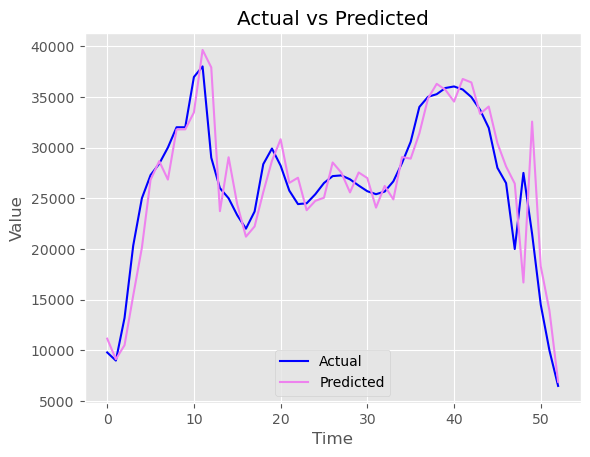

In [63]:
# Splitting the data into train and test sets
X = Heifer.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, color='violet', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20838D+00    |proj g|=  1.05150D-01

At iterate    5    f=  9.18041D+00    |proj g|=  7.04001D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     10      1     0     0   2.978D-05   9.180D+00
  F =   9.1802884539176777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.25771D+00    |proj g|=  1.16974D-01

At iterate    5    f=  9.22362D+00    |proj g|=  4.14800D-03

At iterate   10    f=  9.22359D+00    |proj g|=  1.29947D-04

At iterate   15    f=  9.22356D+00    |proj g|=  3.14052D-03

At iterate   20    f=  9.22099D+00    |proj g|=  3.85644D-02

At iterate   25    f=  9.17908D+00    |proj g|=  4.32519D-02

At iterate   30    f=  9.17329D+00    |proj g|=  4.30908D-04

At iterate   35    f=  9.17298D+00    |proj g|=  3.00030D-05

At iterate   40    f=  9.17295D+00    |proj g|=  3.25571D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   25    f=  9.19463D+00    |proj g|=  7.47725D-03

At iterate   30    f=  9.19136D+00    |proj g|=  5.51727D-04

At iterate   35    f=  9.19096D+00    |proj g|=  1.73998D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     41      1     0     0   7.572D-06   9.191D+00
  F =   9.1909380448913947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28079D+00    |proj g|=  1.07139D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  9.20051D+00    |proj g|=  4.03985D-03

At iterate   30    f=  9.19855D+00    |proj g|=  3.08356D-03

At iterate   35    f=  9.19834D+00    |proj g|=  2.13127D-04

At iterate   40    f=  9.19831D+00    |proj g|=  1.12464D-04

At iterate   45    f=  9.19831D+00    |proj g|=  1.49045D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     50      1     0     0   1.490D-05   9.198D+00
  F =   9.1983067918443364     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  9.25696D+00    |proj g|=  1.13060D-04

At iterate   15    f=  9.25687D+00    |proj g|=  5.21932D-03

At iterate   20    f=  9.22588D+00    |proj g|=  4.25575D-02

At iterate   25    f=  9.20638D+00    |proj g|=  2.51172D-03

At iterate   30    f=  9.20548D+00    |proj g|=  1.32781D-04

At iterate   35    f=  9.20536D+00    |proj g|=  4.47052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     41      1     0     0   3.565D-06   9.205D+00
  F =   9.2053501105867266     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  9.26691D+00    |proj g|=  2.79192D-03

At iterate   10    f=  9.26682D+00    |proj g|=  1.08911D-04

At iterate   15    f=  9.26672D+00    |proj g|=  5.16758D-03

At iterate   20    f=  9.24434D+00    |proj g|=  6.76414D-02

At iterate   25    f=  9.21370D+00    |proj g|=  2.26601D-03

At iterate   30    f=  9.21265D+00    |proj g|=  1.09251D-03

At iterate   35    f=  9.21251D+00    |proj g|=  6.28825D-04

At iterate   40    f=  9.21249D+00    |proj g|=  1.30859D-04

At iterate   45    f=  9.21249D+00    |proj g|=  2.09575D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     49   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   4.084D-05   9.225D+00
  F =   9.2250989618129005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.31717D+00    |proj g|=  9.70899D-02

At iterate    5    f=  9.29021D+00    |proj g|=  2.83685D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.31021D+00    |proj g|=  6.89313D-05

At iterate   10    f=  9.31021D+00    |proj g|=  3.74802D-04

At iterate   15    f=  9.30999D+00    |proj g|=  8.64910D-03

At iterate   20    f=  9.27049D+00    |proj g|=  1.71620D-01

At iterate   25    f=  9.24412D+00    |proj g|=  6.22146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   3.556D-06   9.244D+00
  F =   9.2441094814236404     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.31959D+00    |proj g|=  3.69302D-04

At iterate   15    f=  9.31941D+00    |proj g|=  3.62576D-03

At iterate   20    f=  9.25014D+00    |proj g|=  4.91978D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   6.864D-06   9.250D+00
  F =   9.2501104689195888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.33767D+00    |proj g|=  5.28028D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.35259D+00    |proj g|=  1.09462D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   3.580D-05   9.353D+00
  F =   9.3525940539356203     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.36914D+00    |proj g|=  3.75555D-02

At iterate    5    f=  9.36246D+00    |proj g|=  5.95815D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  9.35368D+00    |proj g|=  7.14119D-02

At iterate   25    f=  9.28867D+00    |proj g|=  3.90470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   5.721D-05   9.289D+00
  F =   9.2886559354121516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.38197D+00    |proj g|=  4.56212D-02

At iterate    5    f=  9.37313D+00    |proj g|=  3.69006D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.39153D+00    |proj g|=  4.33714D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   3.725D-05   9.392D+00
  F =   9.3915247363190968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41510D+00    |proj g|=  6.92318D-02

At iterate    5    f=  9.39823D+00    |proj g|=  6.56232D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42812D+00    |proj g|=  7.63694D-02

At iterate    5    f=  9.40875D+00    |proj g|=  3.81799D-03

At iterate   10    f=  9.40861D+00    |proj g|=  3.67286D-04

At iterate   15    f=  9.40849D+00    |proj g|=  7.74841D-03

At iterate   20    f=  9.39281D+00    |proj g|=  1.02783D-01

At iterate   25    f=  9.33162D+00    |proj g|=  1.96221D-03

At iterate   30    f=  9.32942D+00    |proj g|=  8.13057D-04

At iterate   35    f=  9.32910D+00    |proj g|=  8.51572D-04

At iterate   40    f=  9.32905D+00    |proj g|=  1.39161D-04

At iterate   45    f=  9.32904D+00    |proj g|=  4.32181D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.42054D+00    |proj g|=  3.47928D-03

At iterate   10    f=  9.42047D+00    |proj g|=  1.25815D-04

At iterate   15    f=  9.42045D+00    |proj g|=  2.32839D-03

At iterate   20    f=  9.41763D+00    |proj g|=  3.22112D-02

At iterate   25    f=  9.34770D+00    |proj g|=  1.60167D-02

At iterate   30    f=  9.34064D+00    |proj g|=  1.15325D-03

At iterate   35    f=  9.33985D+00    |proj g|=  3.31662D-03

At iterate   40    f=  9.33974D+00    |proj g|=  6.83264D-04

At iterate   45    f=  9.33973D+00    |proj g|=  8.33111D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     48   

 This problem is unconstrained.



At iterate   25    f=  9.34912D+00    |proj g|=  1.10036D-02

At iterate   30    f=  9.34421D+00    |proj g|=  4.73692D-04

At iterate   35    f=  9.34382D+00    |proj g|=  8.65310D-04

At iterate   40    f=  9.34377D+00    |proj g|=  5.74101D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     46      1     0     0   5.741D-06   9.344D+00
  F =   9.3437718289777525     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  9.43055D+00    |proj g|=  2.30322D-03

At iterate   20    f=  9.41345D+00    |proj g|=  4.30026D-02

At iterate   25    f=  9.35064D+00    |proj g|=  4.84608D-03

At iterate   30    f=  9.34797D+00    |proj g|=  5.83296D-04

At iterate   35    f=  9.34777D+00    |proj g|=  1.19937D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     43      1     0     0   1.988D-04   9.348D+00
  F =   9.3477419045393564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.43467D+00    |proj g|=  3.04416D-03

At iterate   10    f=  9.43464D+00    |proj g|=  1.31804D-04

At iterate   15    f=  9.43456D+00    |proj g|=  2.46403D-03

At iterate   20    f=  9.41592D+00    |proj g|=  6.10789D-02

At iterate   25    f=  9.35417D+00    |proj g|=  4.11107D-03

At iterate   30    f=  9.35182D+00    |proj g|=  5.50259D-04

At iterate   35    f=  9.35164D+00    |proj g|=  4.56790D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     42      1     0     0   3.782D-06   9.352D+00
  F =   9.3516281254771112     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   30    f=  9.35636D+00    |proj g|=  9.26550D-04

At iterate   35    f=  9.35615D+00    |proj g|=  2.21245D-04

At iterate   40    f=  9.35613D+00    |proj g|=  3.45609D-04

At iterate   45    f=  9.35613D+00    |proj g|=  2.45866D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     48      1     0     0   2.459D-06   9.356D+00
  F =   9.3561304569195336     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.44354D+00    |proj g|=  3.37541D-03

At iterate   10    f=  9.44350D+00    |proj g|=  1.22655D-04

At iterate   15    f=  9.44343D+00    |proj g|=  2.29684D-03

At iterate   20    f=  9.42339D+00    |proj g|=  4.60135D-02

At iterate   25    f=  9.36287D+00    |proj g|=  5.21650D-03

At iterate   30    f=  9.36042D+00    |proj g|=  2.94244D-03

At iterate   35    f=  9.36022D+00    |proj g|=  4.26669D-04

At iterate   40    f=  9.36020D+00    |proj g|=  2.77004D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     43      1     0     0   4.604D-06   9.360D+00
  F =   9.36019622918

 This problem is unconstrained.



At iterate   25    f=  9.36643D+00    |proj g|=  4.11403D-03

At iterate   30    f=  9.36490D+00    |proj g|=  2.05455D-04

At iterate   35    f=  9.36477D+00    |proj g|=  2.32848D-04

At iterate   40    f=  9.36476D+00    |proj g|=  1.72192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     46      1     0     0   7.076D-06   9.365D+00
  F =   9.3647550392914365     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.45138D+00    |proj g|=  1.19191D-04

At iterate   15    f=  9.45131D+00    |proj g|=  2.22560D-03

At iterate   20    f=  9.40262D+00    |proj g|=  9.04910D-02

At iterate   25    f=  9.36998D+00    |proj g|=  2.52118D-03

At iterate   30    f=  9.36861D+00    |proj g|=  1.06123D-04

At iterate   35    f=  9.36849D+00    |proj g|=  5.85734D-05

At iterate   40    f=  9.36848D+00    |proj g|=  2.18969D-04

At iterate   45    f=  9.36848D+00    |proj g|=  3.31681D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     50      1     0     0   2.673D-06   9.368D+00
  F =   9.36847799088

 This problem is unconstrained.



At iterate   25    f=  9.37349D+00    |proj g|=  1.53190D-02

At iterate   30    f=  9.37201D+00    |proj g|=  1.25993D-03

At iterate   35    f=  9.37189D+00    |proj g|=  3.60974D-04

At iterate   40    f=  9.37187D+00    |proj g|=  8.22499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     48      1     0     0   2.612D-06   9.372D+00
  F =   9.3718715506755359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  9.45883D+00    |proj g|=  1.24380D-04

At iterate   15    f=  9.45875D+00    |proj g|=  2.29252D-03

At iterate   20    f=  9.42872D+00    |proj g|=  9.38015D-02

At iterate   25    f=  9.37717D+00    |proj g|=  2.60275D-03

At iterate   30    f=  9.37557D+00    |proj g|=  1.27466D-03

At iterate   35    f=  9.37543D+00    |proj g|=  2.90390D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     43      1     0     0   6.216D-06   9.375D+00
  F =   9.3754233084767780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.48006D+00    |proj g|=  6.94988D-02

At iterate    5    f=  9.46227D+00    |proj g|=  3.38485D-03

At iterate   10    f=  9.46224D+00    |proj g|=  1.49801D-04

At iterate   15    f=  9.46213D+00    |proj g|=  2.80761D-03

At iterate   20    f=  9.43623D+00    |proj g|=  6.22186D-02

At iterate   25    f=  9.38123D+00    |proj g|=  8.29982D-03

At iterate   30    f=  9.37885D+00    |proj g|=  5.02929D-04

At iterate   35    f=  9.37867D+00    |proj g|=  2.78003D-04

At iterate   40    f=  9.37865D+00    |proj g|=  1.87905D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   20    f=  9.46078D+00    |proj g|=  3.81326D-02

At iterate   25    f=  9.38888D+00    |proj g|=  1.33943D-02

At iterate   30    f=  9.38703D+00    |proj g|=  3.88856D-04

At iterate   35    f=  9.38685D+00    |proj g|=  7.84182D-04

At iterate   40    f=  9.38683D+00    |proj g|=  4.22204D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     48      1     0     0   4.000D-05   9.387D+00
  F =   9.3868321541607571     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.47245D+00    |proj g|=  2.64042D-03

At iterate   10    f=  9.47237D+00    |proj g|=  1.13415D-04

At iterate   15    f=  9.47233D+00    |proj g|=  2.47694D-03

At iterate   20    f=  9.46849D+00    |proj g|=  1.84535D-02

At iterate   25    f=  9.39784D+00    |proj g|=  1.20625D-02

At iterate   30    f=  9.39216D+00    |proj g|=  9.47746D-04

At iterate   35    f=  9.39145D+00    |proj g|=  1.52495D-04

At iterate   40    f=  9.39139D+00    |proj g|=  3.12232D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     47      1     0     0   7.989D-06   9.391D+00
  F =   9.39138266218

 This problem is unconstrained.



At iterate   25    f=  9.40398D+00    |proj g|=  2.53072D-02

At iterate   30    f=  9.39511D+00    |proj g|=  2.56041D-03

At iterate   35    f=  9.39450D+00    |proj g|=  1.20484D-03

At iterate   40    f=  9.39442D+00    |proj g|=  3.28463D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     46      1     0     0   3.282D-06   9.394D+00
  F =   9.3944127192474323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  9.47877D+00    |proj g|=  2.37385D-03

At iterate   20    f=  9.47532D+00    |proj g|=  1.70474D-02

At iterate   25    f=  9.40457D+00    |proj g|=  1.30753D-02

At iterate   30    f=  9.39850D+00    |proj g|=  1.03003D-03

At iterate   35    f=  9.39776D+00    |proj g|=  7.60624D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     45      1     0     0   5.727D-05   9.398D+00
  F =   9.3976788895723100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   35    f=  9.40236D+00    |proj g|=  1.88342D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     41      1     0     0   6.828D-06   9.402D+00
  F =   9.4023307489390255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.50725D+00    |proj g|=  7.19851D-02

At iterate    5    f=  9.48830D+00    |proj g|=  2.65517D-03

At iterate   10    f=  9.48822D+00    |proj g|=  1.13226D-04

At iter

 This problem is unconstrained.


At iterate   20    f=  9.48436D+00    |proj g|=  1.85716D-02

At iterate   25    f=  9.41587D+00    |proj g|=  1.16035D-02

At iterate   30    f=  9.41063D+00    |proj g|=  9.38685D-04

At iterate   35    f=  9.40995D+00    |proj g|=  1.51394D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     41      1     0     0   7.786D-06   9.410D+00
  F =   9.4098950737102953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.



At iterate   10    f=  9.49270D+00    |proj g|=  1.06924D-04

At iterate   15    f=  9.49266D+00    |proj g|=  2.52795D-03

At iterate   20    f=  9.48762D+00    |proj g|=  2.13531D-02

At iterate   25    f=  9.42003D+00    |proj g|=  8.32343D-03

At iterate   30    f=  9.41615D+00    |proj g|=  6.70604D-04

At iterate   35    f=  9.41562D+00    |proj g|=  7.51713D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     45      1     0     0   1.884D-04   9.416D+00
  F =   9.4155979310040703     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   30    f=  9.41855D+00    |proj g|=  2.27266D-04

At iterate   35    f=  9.41835D+00    |proj g|=  3.90686D-03

At iterate   40    f=  9.41832D+00    |proj g|=  2.32189D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     45      1     0     0   5.452D-06   9.418D+00
  F =   9.4183221322017499     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51887D+00    |proj g|=  7.60136D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  9.49822D+00    |proj g|=  3.07292D-03

At iterate   20    f=  9.47680D+00    |proj g|=  9.88166D-02

At iterate   25    f=  9.42281D+00    |proj g|=  2.68505D-03

At iterate   30    f=  9.42125D+00    |proj g|=  1.18712D-04

At iterate   35    f=  9.42113D+00    |proj g|=  2.98591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     40      1     0     0   7.092D-06   9.421D+00
  F =   9.4211192846225327     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.50119D+00    |proj g|=  2.91225D-03

At iterate   10    f=  9.50108D+00    |proj g|=  1.65669D-04

At iterate   15    f=  9.50079D+00    |proj g|=  4.50524D-03

At iterate   20    f=  9.45145D+00    |proj g|=  1.32241D-01

At iterate   25    f=  9.42495D+00    |proj g|=  8.20693D-03

At iterate   30    f=  9.42384D+00    |proj g|=  1.86038D-04

At iterate   35    f=  9.42377D+00    |proj g|=  3.26538D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     41      1     0     0   3.031D-06   9.424D+00
  F =   9.4237586365074932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   25    f=  9.42912D+00    |proj g|=  4.02457D-03

At iterate   30    f=  9.42697D+00    |proj g|=  1.90928D-04

At iterate   35    f=  9.42679D+00    |proj g|=  2.00785D-04

At iterate   40    f=  9.42677D+00    |proj g|=  9.64839D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     43      1     0     0   7.540D-06   9.427D+00
  F =   9.4267680310686170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   30    f=  9.43701D+00    |proj g|=  1.17499D-04

At iterate   35    f=  9.43690D+00    |proj g|=  1.98889D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     42      1     0     0   3.312D-06   9.437D+00
  F =   9.4368868880535661     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.58472D+00    |proj g|=  9.15204D-02

At iterate    5    f=  9.56042D+00    |proj g|=  2.25368D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  9.56035D+00    |proj g|=  1.69908D-03

At iterate   20    f=  9.53431D+00    |proj g|=  4.88718D-02

At iterate   25    f=  9.50966D+00    |proj g|=  4.61541D-03

At iterate   30    f=  9.50931D+00    |proj g|=  5.31753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     36      1     0     0   2.722D-06   9.509D+00
  F =   9.5093107145669027     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.56689D+00    |proj g|=  9.42870D-04

At iterate   10    f=  9.56688D+00    |proj g|=  1.68519D-04

At iterate   15    f=  9.56682D+00    |proj g|=  6.06309D-03

At iterate   20    f=  9.55689D+00    |proj g|=  7.30876D-02

At iterate   25    f=  9.51606D+00    |proj g|=  4.55479D-03

At iterate   30    f=  9.51490D+00    |proj g|=  1.68060D-04

At iterate   35    f=  9.51488D+00    |proj g|=  7.26535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     42      1     0     0   7.265D-05   9.515D+00
  F =   9.5148792419064971     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f=  9.52009D+00    |proj g|=  1.93748D-03

At iterate   30    f=  9.51971D+00    |proj g|=  7.30134D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     36      1     0     0   5.565D-06   9.520D+00
  F =   9.5197113642277174     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61129D+00    |proj g|=  9.38945D-02

At iterate    5    f=  9.58608D+00    |proj g|=  5.88672D-04

At iter

 This problem is unconstrained.



At iterate   15    f=  9.58599D+00    |proj g|=  2.75498D-03

At iterate   20    f=  9.56728D+00    |proj g|=  8.96690D-02

At iterate   25    f=  9.53867D+00    |proj g|=  1.75626D-02

At iterate   30    f=  9.53832D+00    |proj g|=  8.85107D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     36      1     0     0   1.622D-05   9.538D+00
  F =   9.5383153714061919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Test RMSE: 7792.949


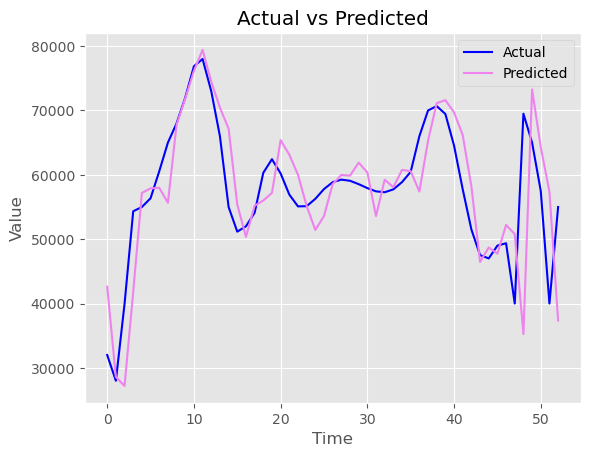

       predicted            expected
0   42613.010941           [32000.0]
1   28586.271612           [28000.0]
2   27195.598566  [39929.3066372418]
3   41802.043992  [54333.3333333333]
4   57187.140212           [55000.0]
5   57893.236031  [56358.0510402265]
6   57986.778218  [60541.5216937544]
7   55658.709153           [65000.0]
8   67798.314117           [68000.0]
9   71869.682630           [72000.0]
10  76161.091143  [76869.4965256817]
11  79408.942326           [78000.0]
12  74481.185853           [73000.0]
13  70446.713195           [66000.0]
14  67179.912111           [55000.0]
15  55392.254496  [51167.8419287205]
16  50351.214884           [52000.0]
17  55187.594052  [54102.0701537905]
18  56009.513099  [60314.3552042104]
19  57189.867708   [62427.964646031]
20  65390.386664   [60214.506655606]
21  63134.149550  [56931.8256630745]
22  60010.220258  [55097.7011050886]
23  55174.025203  [55124.9908679292]
24  51434.686236   [56268.911061447]
25  53587.678819  [57783.1639913552]
2

In [66]:
# Splitting the data into train and test sets
X = Bull.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
results = {'predicted': [], 'expected': []}

# Walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    results['predicted'].append(yhat)
    results['expected'].append(obs)

# Store results in a DataFrame
results_df = pd.DataFrame(results)

# Evaluate forecasts
rmse = sqrt(mean_squared_error(results_df['expected'], results_df['predicted']))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(results_df['expected'], label='Actual', color='blue')
plt.plot(results_df['predicted'], color='violet', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display results DataFrame
print(results_df)


predicted=30597.324031, expected=25166.666000
predicted=22372.123223, expected=23000.000000
predicted=23200.575761, expected=24310.126156
predicted=25638.551859, expected=33000.000000
predicted=39512.367797, expected=49000.000000
predicted=54481.860141, expected=55133.038011
predicted=55206.515864, expected=52978.850277
predicted=47765.883817, expected=51000.000000
predicted=52186.092109, expected=54000.000000
predicted=57347.767099, expected=54000.000000
predicted=56552.797309, expected=52360.453205
predicted=50986.073017, expected=56000.000000
predicted=55565.230943, expected=64000.000000
predicted=66051.284589, expected=55000.000000
predicted=51245.481160, expected=50000.000000
predicted=51449.613556, expected=48153.481749
predicted=50939.053277, expected=48000.000000
predicted=49005.119971, expected=46125.112776
predicted=44754.139592, expected=40763.480278
predicted=35149.422089, expected=38892.471164
predicted=40132.450219, expected=40754.371866
predicted=41659.000475, expected=4

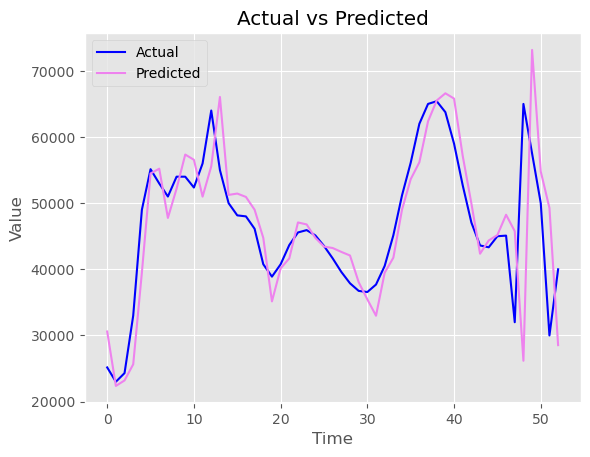

In [64]:

# Splitting the data into train and test sets
X = Steer.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
    model_fit = model.fit(disp=False)  # Suppress optimization process details
    output = model_fit.forecast()
    yhat = output[0]
    obs = test[t]
    predictions.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    history.append(obs)

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual', color = 'blue')
plt.plot(predictions, color='violet', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [80]:
# Plug the optimal parameter values into a new SARIMAX model

ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(0, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:                           

 This problem is unconstrained.


In [68]:
import statsmodels.api as sm

# List of animals
Animals = [Cow, Bull, Heifer, Steer]

# Define the optimal parameters
optimal_order = (0, 1, 1)
optimal_seasonal_order = (0, 1, 1, 12)

# Loop through the list of animals
for animal in Animals:
    # Create SARIMAX model with optimal parameters for the current animal
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(animal, 
                                            order=optimal_order, 
                                            seasonal_order=optimal_seasonal_order, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()
    print(f"Results for {animal}:")
    print(output.summary().tables[1])



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Results for                      Cow
Dates                   
2009-08-01    966.666667
2009-09-01   4000.000000
2009-10-01   5000.00

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.60121D+00    |proj g|=  8.84226D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     16      1     0     0   3.820D-05   8.601D+00
  F =   8.6012049525565963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Results for                     Bull
Dates                   
2009-08-01   8500.000000
2009-09-01  18000.000000
2009-10-01   8500.000000
2009-11-01  12484.312740
2009-12-01  22166.666667
...                  ...
2022-01-01  69500.000000
2022-03-10  65000.000000
2022-04-15  57500.000000
2022-05-20  40000.000000
2022-07-29  55000.000000

[154 rows x 1 columns]:

 This problem is unconstrained.
 This problem is unconstrained.


In [71]:
# Define the optimal parameters
optimal_order = (0, 1, 1)
optimal_seasonal_order = (0, 1, 1, 12)

# Create SARIMAX model with optimal parameters
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Cow, 
                                        order=optimal_order, 
                                        seasonal_order=optimal_seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model
output = ARIMA_MODEL.fit()

# Extract AIC value
AIC_value = output.aic

# Print in the desired format
print(f"ARIMA {optimal_order} x {optimal_seasonal_order}: AIC Calculated={AIC_value}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=2535.0565416586182


 This problem is unconstrained.


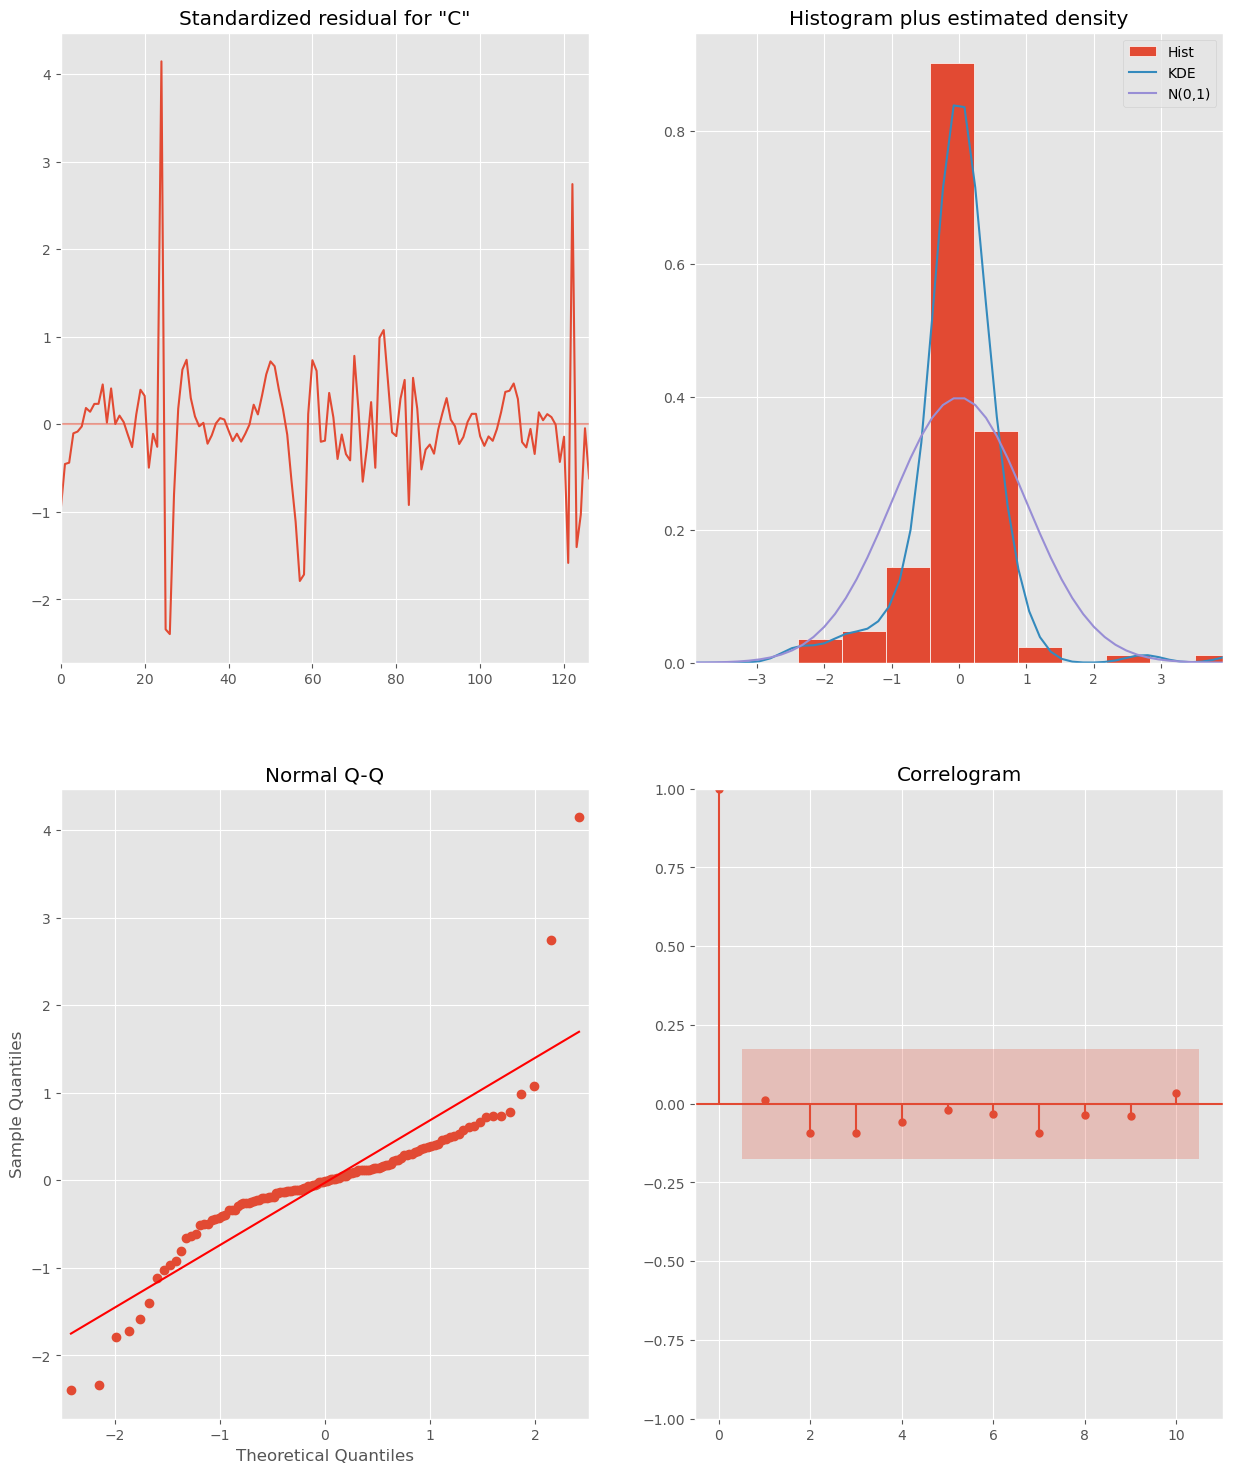

In [72]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [73]:
# Assuming 'Dates' is the column containing the date information
df.set_index('Dates', inplace=True)


In [74]:
df.columns

Index(['Seasons', 'Bull', 'Cow', 'Heifer', 'Steer'], dtype='object')

In [75]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)


In [76]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

# Function definitions for fitting SARIMA model and forecasting
def fit_sarima(data, order, seasonal_order):
    """
    Fit a SARIMA model to the data.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - order: ARIMA order (p, d, q)
    - seasonal_order: SARIMA seasonal order (P, D, Q, m)

    Returns:
    - Dictionary of fitted SARIMA models
    """
    models = {}
    for column in data.columns:
        mod = sm.tsa.statespace.SARIMAX(data[column], order=order, seasonal_order=seasonal_order,
                                        enforce_stationarity=False, enforce_invertibility=False)
        models[column] = mod.fit()
    return models

def forecast_sarima(models, steps):
    """
    Forecast future values using fitted SARIMA models.

    Parameters:
    - models: Dictionary of fitted SARIMA models
    - steps: Number of steps ahead to forecast

    Returns:
    - pandas DataFrame: Forecasted values for each variable
    """
    forecasts = {}
    for column, model in models.items():
        forecasts[column] = model.forecast(steps)
    return pd.DataFrame(forecasts)

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

# Define SARIMA order and seasonal order
order = (8, 1, 1)  # Example ARIMA order
seasonal_order = (8, 1, 1, 12)  # Example seasonal order

# Fit SARIMA model to training data
models = fit_sarima(train_df[['Cow', 'Bull', 'Heifer', 'Steer']], order, seasonal_order)

# Make predictions on the test set
test_steps = len(test_df)
test_forecasts = forecast_sarima(models, test_steps)

# Evaluate the predictions for the test set
# Create a list to store evaluation metrics
evaluation_metrics_test = []

# Evaluate the predictions for specific columns and store the metrics
for column in ['Cow', 'Bull', 'Heifer', 'Steer']:
    actual = test_df[column]
    forecast = test_forecasts[column]
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    evaluation_metrics_test.append({'Livestock': column, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape})

# Convert the list of dictionaries into a DataFrame
evaluation_metrics_test_df = pd.DataFrame(evaluation_metrics_test)

# Print the evaluation metrics for the test set
print("Evaluation Metrics for Test Set:")
print(evaluation_metrics_test_df)

# Make predictions for 24 months beyond the length of the original dataframe
future_steps = 60
future_forecasts = forecast_sarima(models, future_steps)

# Print forecasts for the next 24 months
print("Forecasts for the next 24 months:")
print(future_forecasts)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Evaluation Metrics for Test Set:
  Livestock           MAE           MSE          RMSE       MAPE
0       Cow  15281.152376  3.576865e+08  18912.602906  43.549661
1      Bull  17754.997879  4.83

In [ ]:
# # Define SARIMA order and seasonal order
# order = (1, 1, 1)  # Example ARIMA order
# seasonal_order = (0, 1, 1, 12)  # Example seasonal order

# # Fit SARIMA model to training data
# models = fit_sarima(train_df, order, seasonal_order)

# # Make predictions on the test set
# steps = len(test_data)
# test_forecasts = forecast_sarima(models, steps)

In [77]:
import matplotlib.pyplot as plt

def plot_predictions(actual_train, actual_test, predicted_test, future_forecasts=None, model_name=''):
    """
    Plot actual values, predicted values, and forecasted values (if available) for different time series models.

    Parameters:
    - actual_train: DataFrame containing actual values for the training set
    - actual_test: DataFrame containing actual values for the test set
    - predicted_test: DataFrame containing predicted values for the test set
    - future_forecasts: DataFrame containing forecasted values for future time periods (optional)
    - model_name: Name of the model (optional, used for labeling the plot)

    Returns:
    - None
    """
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Create subplots

    # Remove 'Seasons' column if it exists
    actual_train = actual_train.drop(columns=['Seasons'], errors='ignore')
    actual_test = actual_test.drop(columns=['Seasons'], errors='ignore')
    predicted_test = predicted_test.drop(columns=['Seasons'], errors='ignore')

    livestock_columns = actual_train.columns

    for i, ax in enumerate(axes.flat):
        if i < len(livestock_columns):
            livestock = livestock_columns[i]
            ax.plot(actual_train.index, actual_train[livestock], label=f"Actual {livestock} (Train)", linestyle='-', marker='o')
            ax.plot(actual_test.index, actual_test[livestock], label=f"Actual {livestock} (Test)", linestyle='-', marker='o')
            ax.plot(predicted_test.index, predicted_test[livestock], label=f"Predicted {livestock} ({model_name})", linestyle='--', marker='x')

            if future_forecasts is not None:
                ax.plot(future_forecasts.index, future_forecasts[livestock], label=f"Forecast {livestock} ({model_name})", linestyle='--', marker='x')

            ax.set_title(f'{livestock} ({model_name})')
            ax.set_xlabel('Time')
            ax.set_ylabel('Value')
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()


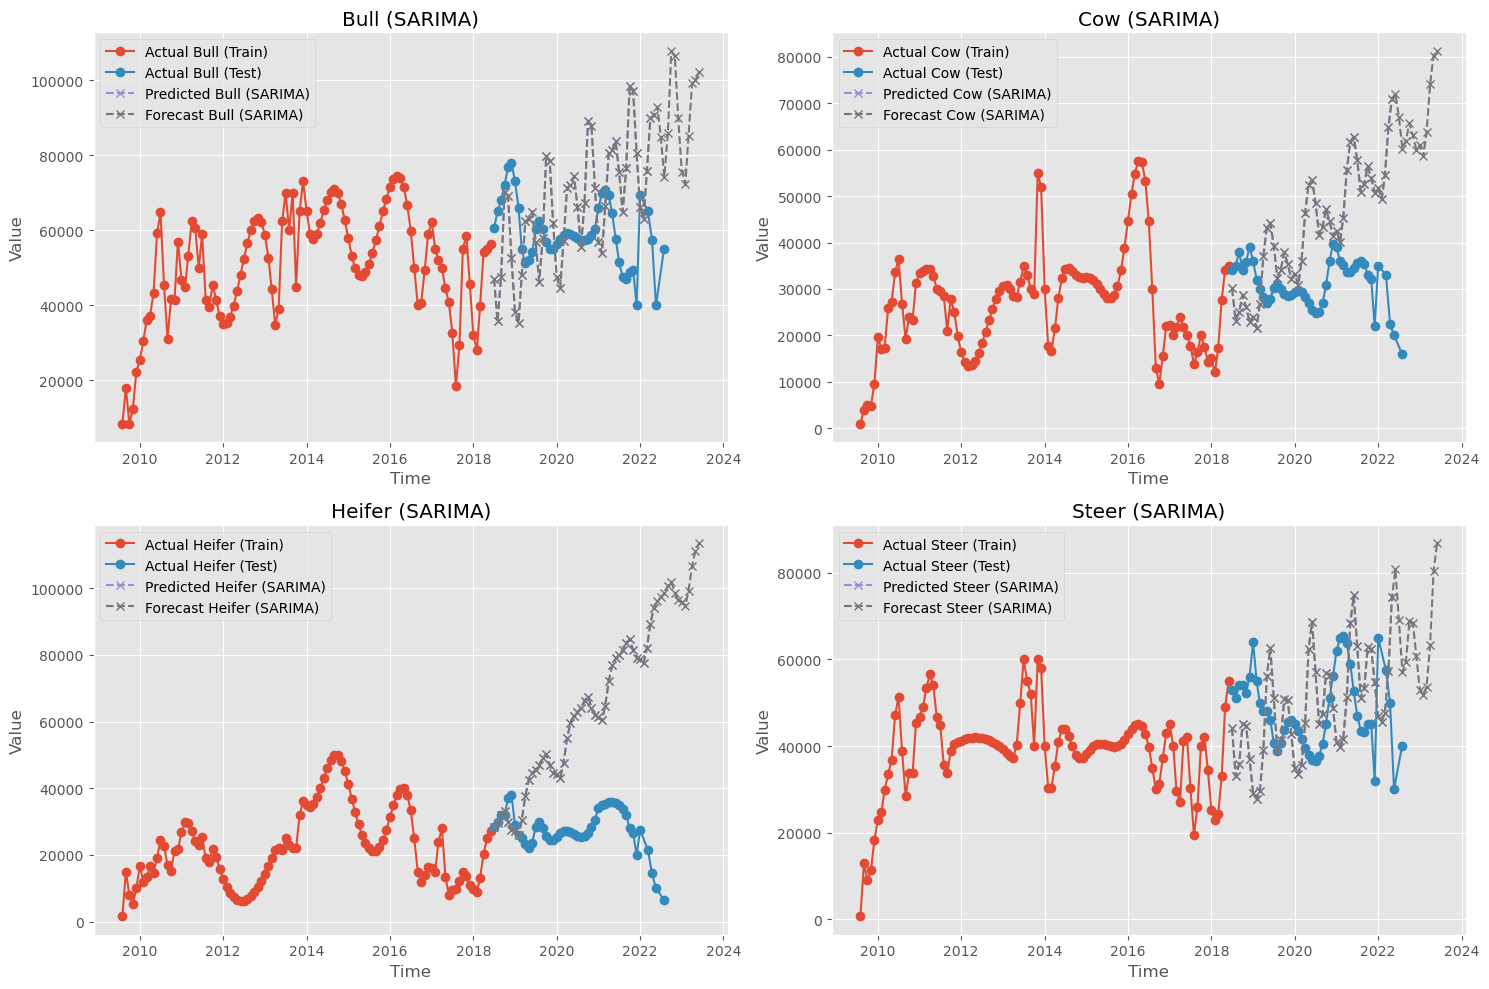

In [78]:

# Now you can call the plot_predictions function with appropriate arguments
plot_predictions(train_df, test_df, test_forecasts, future_forecasts, model_name='SARIMA')


In [79]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

def fit_hw_seasonal(data, seasonal_periods):
    """
    Fit a Holt-Winters seasonal exponential smoothing model to the data.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - seasonal_periods: Length of the seasonal cycle

    Returns:
    - dict: Fitted Holt-Winters models for each variable
    """
    models = {}
    for column in data.columns:
        model = ExponentialSmoothing(data[column], seasonal_periods=seasonal_periods, trend='add', seasonal='add')
        models[column] = model.fit()
    return models

def forecast_hw_seasonal(models, steps):
    """
    Forecast future values using fitted Holt-Winters seasonal models.

    Parameters:
    - models: Dictionary of fitted Holt-Winters models
    - steps: Number of steps ahead to forecast

    Returns:
    - pandas DataFrame: Forecasted values for each variable
    """
    forecasts = {}
    for column, model in models.items():
        forecasts[column] = model.forecast(steps)
    return pd.DataFrame(forecasts)

def evaluate_predictions(actual, predicted):
    """
    Evaluate the predictions using MAE, MSE, RMSE, and MAPE.

    Parameters:
    - actual: Actual values
    - predicted: Predicted values

    Returns:
    - dict: Evaluation metrics
    """
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

def perform_hw_seasonal_forecasting(data, test_size, seasonal_periods, future_steps):
    """
    Perform Holt-Winters seasonal forecasting.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - test_size: Proportion of the data to include in the test split
    - seasonal_periods: Length of the seasonal cycle
    - future_steps: Number of steps ahead to forecast for future predictions

    Returns:
    - dict: Evaluation metrics for test set predictions
    - DataFrame: Predicted values for future time periods
    """
    # Split the data into training and test sets
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)

    # Fit Holt-Winters seasonal model to training data
    models = fit_hw_seasonal(train_data, seasonal_periods)

    # Make predictions on the test set
    test_steps = len(test_data)
    test_forecasts = forecast_hw_seasonal(models, test_steps)

    # Evaluate the predictions for the test set
    evaluation_metrics_test = {}
    for column in test_data.columns:
        actual = test_data[column]
        predicted = test_forecasts[column]
        evaluation_metrics_test[column] = evaluate_predictions(actual, predicted)

    # Make predictions for future time periods
    future_forecasts = forecast_hw_seasonal(models, future_steps)

    return evaluation_metrics_test, future_forecasts


In [80]:
# Assuming you have your data stored in a DataFrame named 'df'

# Set parameters
test_size = 0.3  # Proportion of data to use for testing
seasonal_periods = 12  # Length of the seasonal cycle
future_steps = 60  # Number of steps ahead for future predictions

# Perform Holt-Winters seasonal forecasting
evaluation_metrics_test, future_forecasts = perform_hw_seasonal_forecasting(df[['Cow', 'Bull', 'Heifer', 'Steer']], test_size, seasonal_periods, future_steps)

# Print evaluation metrics for test set predictions
print("Evaluation Metrics for Test Set Predictions:")
print(evaluation_metrics_test)

# Print forecasts for the future time periods
print("Forecasts for the Future Time Periods:")
print(future_forecasts)


Evaluation Metrics for Test Set Predictions:
{'Cow': {'MAE': 12342.611907033799, 'MSE': 207831034.4183741, 'RMSE': 14416.346084163424, 'MAPE': 37.02066341229696}, 'Bull': {'MAE': 10262.525845861714, 'MSE': 159814059.21975115, 'RMSE': 12641.758549337634, 'MAPE': 16.42835273345287}, 'Heifer': {'MAE': 7417.099952509729, 'MSE': 104214299.78974181, 'RMSE': 10208.540531816574, 'MAPE': 21.17564714724628}, 'Steer': {'MAE': 17749.531734151777, 'MSE': 449443068.8950063, 'RMSE': 21200.07237947565, 'MAPE': 37.810440401812464}}
Forecasts for the Future Time Periods:
                     Cow          Bull        Heifer         Steer
2018-07-01  36828.683819  62053.462602  29892.885694  58170.310131
2018-08-01  34400.697878  50754.718045  27268.907294  51765.206059
2018-09-01  31014.129790  49600.096903  25380.815984  48402.131365
2018-10-01  34566.072024  47588.425956  26016.348342  48422.570640
2018-11-01  41051.115549  51407.577094  29545.923500  54196.633273
2018-12-01  41990.504360  55738.629591

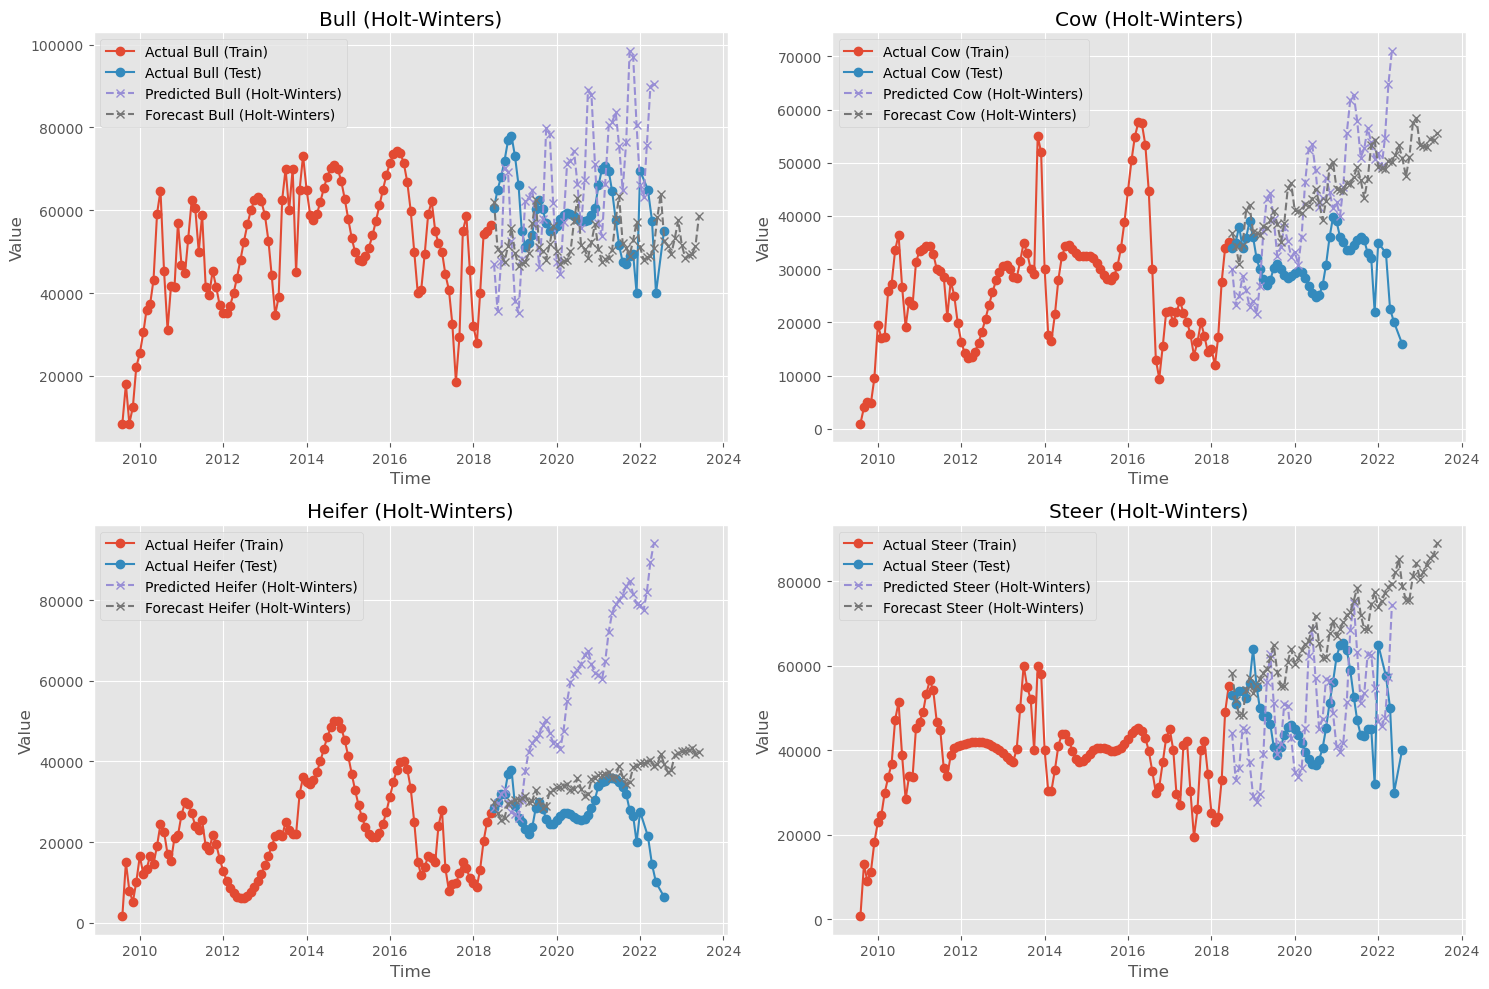

In [81]:
plot_predictions(train_df, test_df, test_forecasts, future_forecasts, model_name='Holt-Winters')


In [82]:
# Assuming 'data' is a pandas DataFrame with columns: 'Dates', 'Season', 'cow', 'steer', 'bulls', 'heifer'
seasonal_periods = 12  # For example, if you have monthly data

models_hw = fit_hw_seasonal(df[['Cow', 'Bull', 'Heifer','Steer']], seasonal_periods)
forecasts_hw = forecast_hw_seasonal(models_hw, steps=10)
print(forecasts_hw)


              Cow          Bull       Heifer         Steer
154  16115.384380  58458.036253  5887.254075  39402.059069
155  16641.519242  64205.035264  7521.594094  38335.500854
156  13848.606775  59760.861237  4085.086114  35163.056454
157  10432.920045  57541.615964  1345.124637  33474.433580
158  11565.957903  56589.559521   859.782262  32560.995202
159  16706.685944  57597.251024  3396.570807  33241.044374
160  18070.295208  59035.773545  3053.520631  33236.231933
161  14927.300181  59943.241687  2704.015744  37954.430618
162  11456.857503  53926.415167  1711.779874  31310.642649
163  10353.842091  52576.399718  1202.962712  30130.679509


In [83]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

def fit_var(data, maxlags):
    """
    Fit a VAR model to the data.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - maxlags: Maximum number of lags for the VAR model

    Returns:
    - VARResults: Fitted VAR model
    """
    if not isinstance(data, pd.DataFrame):  # Check if data is a DataFrame
        raise ValueError("Input data must be a pandas DataFrame")
    
    if len(data.columns) < 2:
        raise ValueError("VAR model requires at least two variables for fitting")
    
    model = VAR(data)
    return model.fit(maxlags=maxlags)

def forecast_var(var_model, data, steps):
    """
    Forecast future values using a fitted VAR model.

    Parameters:
    - var_model: Fitted VAR model (VARResults object)
    - data: Time series data (pandas DataFrame) used for fitting the model
    - steps: Number of steps ahead to forecast

    Returns:
    - pandas DataFrame: Forecasted values for each variable
    """
    # Perform forecasting
    forecasted_data = var_model.forecast(data.values[-var_model.k_ar:], steps=steps)
    
    # Convert the forecasted values to a DataFrame with appropriate column names
    forecasted_df = pd.DataFrame(forecasted_data, columns=data.columns)
    
    return forecasted_df

def evaluate_predictions(actual, predicted):
    """
    Evaluate the predictions using MAE, MSE, RMSE, and MAPE.

    Parameters:
    - actual: Actual values
    - predicted: Predicted values

    Returns:
    - dict: Evaluation metrics
    """
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

def perform_var_forecasting(data, test_size, maxlags, steps):
    """
    Perform VAR forecasting.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - test_size: Proportion of the data to include in the test split
    - maxlags: Maximum number of lags for the VAR model
    - steps: Number of steps ahead to forecast for future predictions

    Returns:
    - dict: Evaluation metrics for test set predictions
    - DataFrame: Predicted values for future time periods
    """
    # Split the data into training and test sets
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)

    # Fit VAR model to training data
    var_model = fit_var(train_data, maxlags)

    # Make predictions on the test set
    test_steps = len(test_data)
    test_forecasts = forecast_var(var_model, data, test_steps)

    # Evaluate the predictions for the test set
    evaluation_metrics_test = {}
    for column in test_data.columns:
        actual = test_data[column]
        predicted = test_forecasts[column]
        evaluation_metrics_test[column] = evaluate_predictions(actual, predicted)

    # Make predictions for future time periods
    future_forecasts = forecast_var(var_model, data, steps)

    return evaluation_metrics_test, future_forecasts

# Assuming 'df' is your DataFrame with columns: 'Cow', 'Steer', 'Bull', 'Heifer'
test_size = 0.3  # Proportion of data to use for testing
maxlags = 12  # Maximum number of lags for the VAR model
steps = 60  # Number of steps ahead for future predictions

# Perform VAR forecasting
evaluation_metrics_test, future_forecasts = perform_var_forecasting(df[['Cow', 'Steer', 'Bull', 'Heifer']], test_size, maxlags, steps)

# Print evaluation metrics for test set predictions
print("Evaluation Metrics for Test Set Predictions:")
print(evaluation_metrics_test)

# Print forecasts for the future time periods
print("Forecasts for the Future Time Periods:")
print(future_forecasts)


Evaluation Metrics for Test Set Predictions:
{'Cow': {'MAE': 11640.848833840917, 'MSE': 350873490.3525552, 'RMSE': 18731.617398200167, 'MAPE': nan}, 'Steer': {'MAE': 11860.645107289829, 'MSE': 254410556.2841304, 'RMSE': 15950.252546092504, 'MAPE': nan}, 'Bull': {'MAE': 13858.416256899063, 'MSE': 422866880.8782282, 'RMSE': 20563.72730995595, 'MAPE': nan}, 'Heifer': {'MAE': 12013.251845502662, 'MSE': 318220473.4570422, 'RMSE': 17838.735197794776, 'MAPE': nan}}
Forecasts for the Future Time Periods:
             Cow         Steer          Bull        Heifer
0  -26388.585264   9672.917429   9181.534271 -13802.000419
1  -24040.547006   6635.314033  21338.672280 -12138.027689
2  -14909.583336  17171.436327   6349.651072 -12634.945797
3    3751.524736  39101.588050  12869.489246  -6152.923069
4   14365.087126  60361.919132  53777.349525  -6142.960122
5   -3008.979270  39074.404072  40117.367522  -9636.324203
6    3943.139155  28821.678438  29141.009339   -710.907386
7   18897.902958  35624.45

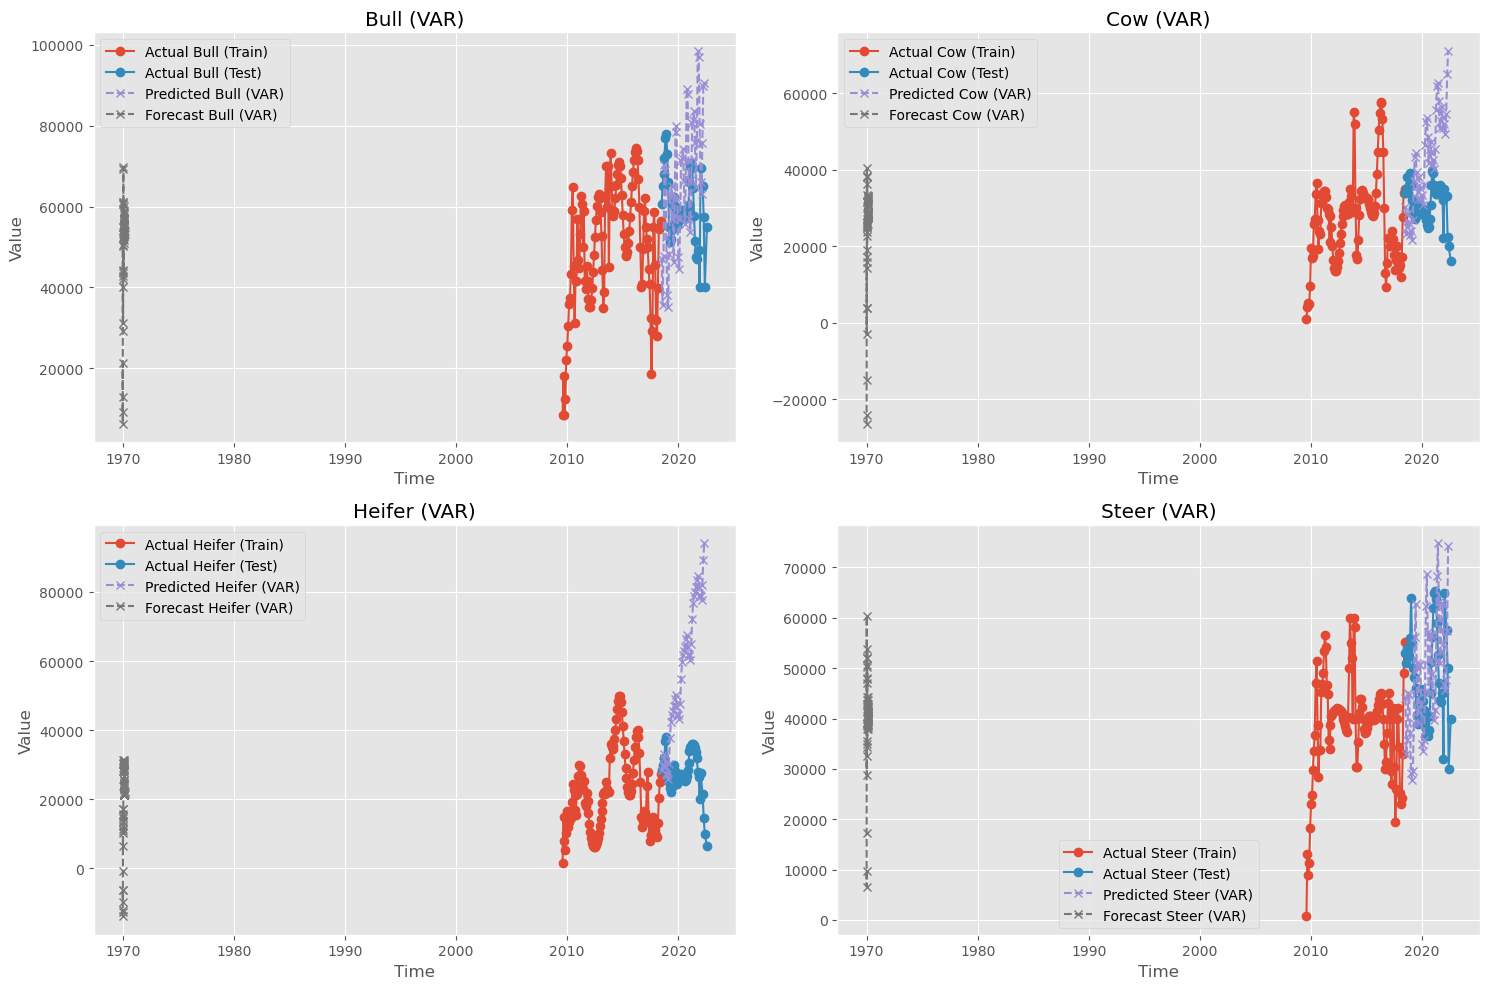

In [84]:
plot_predictions(train_df, test_df, test_forecasts, future_forecasts, model_name='VAR')


In [85]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', test_size=0.2, random_state=42, **kwargs):
    """
    Train a machine learning model to predict prices of multiple livestock.

    Parameters:
    - df: DataFrame containing the data, where the predictors and target variables are columns
    - predictors: List of column names containing the predictor variables
    - target_variables: List of column names containing the target variables (prices of livestock)
    - model_type: Type of machine learning model to use ('random_forest' or 'gradient_boosting')
    - test_size: Proportion of the dataset to include in the test split
    - random_state: Random seed for reproducibility
    - kwargs: Additional keyword arguments to pass to the model constructor

    Returns:
    - Trained machine learning model
    - Predictions on the test set for each target variable
    - Evaluation metric (e.g., Mean Squared Error) on the test set for each target variable
    """
    # Splitting the data into predictors (X) and target variables (y)
    X = df[predictors]
    y = df[target_variables]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the model
    if model_type == 'random_forest':
        model = RandomForestRegressor(**kwargs)
    elif model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(**kwargs)
    else:
        raise ValueError("Invalid model_type. Choose 'random_forest' or 'gradient_boosting'.")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = model.predict(X_test)

    # Evaluation metric
    mse = mean_squared_error(y_test, predictions, multioutput='raw_values')

    return model, predictions, mse


In [86]:
# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['Seasons'])

# Define the predictors and target variables
predictors = df.columns.tolist()
predictors.remove('Bull')
predictors.remove('Cow')
predictors.remove('Heifer')
predictors.remove('Steer')
target_variables = ['Bull', 'Cow', 'Heifer', 'Steer']

# Train a Random Forest model
rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', random_state=42)


In [87]:
# Define the predictors and target variables
predictors = df.columns.tolist()
predictors.remove('Bull')
predictors.remove('Cow')
predictors.remove('Heifer')
predictors.remove('Steer')
target_variables = ['Bull', 'Cow', 'Heifer', 'Steer']

# Train a Random Forest model
rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', random_state=42)


In [88]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', test_size=0.2, random_state=42, **kwargs):
    """
    Train a machine learning model to predict prices of multiple livestock.

    Parameters:
    - df: DataFrame containing the data, where the predictors and target variables are columns
    - predictors: List of column names containing the predictor variables
    - target_variables: List of column names containing the target variables (prices of livestock)
    - model_type: Type of machine learning model to use ('random_forest' or 'gradient_boosting')
    - test_size: Proportion of the dataset to include in the test split
    - random_state: Random seed for reproducibility
    - kwargs: Additional keyword arguments to pass to the model constructor

    Returns:
    - Trained machine learning model
    - Predictions on the test set for each target variable
    - Evaluation metric (e.g., Mean Squared Error) on the test set for each target variable
    """
    # Splitting the data into predictors (X) and target variables (y)
    X = df[predictors]
    y = df[target_variables]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the model
    if model_type == 'random_forest':
        model = RandomForestRegressor(**kwargs)
    elif model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(**kwargs)
    else:
        raise ValueError("Invalid model_type. Choose 'random_forest' or 'gradient_boosting'.")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = model.predict(X_test)

    # Evaluation metric
    mse = mean_squared_error(y_test, predictions, multioutput='raw_values')

    return model, predictions, mse


In [89]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', test_size=0.2, random_state=42, seasonal_periods=None, **kwargs):
    """
    Train a machine learning model to predict prices of multiple livestock.

    Parameters:
    - df: DataFrame containing the data, where the predictors and target variables are columns
    - predictors: List of column names containing the predictor variables
    - target_variables: List of column names containing the target variables (prices of livestock)
    - model_type: Type of machine learning model to use ('random_forest' or 'gradient_boosting')
    - test_size: Proportion of the dataset to include in the test split
    - random_state: Random seed for reproducibility
    - seasonal_periods: Length of the seasonal cycle (for seasonal models)
    - kwargs: Additional keyword arguments to pass to the model constructor

    Returns:
    - Trained machine learning model
    - Predictions on the test set for each target variable
    - Evaluation metric (e.g., Mean Squared Error) on the test set for each target variable
    """
    # Splitting the data into predictors (X) and target variables (y)
    X = df[predictors]
    y = df[target_variables]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the model
    if model_type == 'random_forest':
        model = RandomForestRegressor(**kwargs)
    elif model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(**kwargs)
    else:
        raise ValueError("Invalid model_type. Choose 'random_forest' or 'gradient_boosting'.")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = model.predict(X_test)

    # Evaluation metric
    mse = mean_squared_error(y_test, predictions, multioutput='raw_values')

    return model, predictions, mse


In [90]:
# # Assuming you have your training and testing data prepared (X_train, y_train, X_test, y_test)

# # Train a Random Forest model
# rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(X_train, y_train, X_test, y_test, model_type='random_forest', **kwargs)

# # Train a Gradient Boosting model
# gb_model, gb_predictions, gb_mse = train_ml_seasonal_model(X_train, y_train, X_test, y_test, model_type='gradient_boosting', **kwargs)


In [91]:
# Train a Random Forest model
rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', random_state=42)

# Print the predictions
print(rf_predictions)


[[56092.14124518 29748.85109589 25911.20100815 42889.05537177]
 [56092.14124518 29748.85109589 25911.20100815 42889.05537177]
 [56092.14124518 29748.85109589 25911.20100815 42889.05537177]
 [54030.77053064 29105.02903785 24277.99140521 40795.41729008]
 [54030.77053064 29105.02903785 24277.99140521 40795.41729008]
 [54030.77053064 29105.02903785 24277.99140521 40795.41729008]
 [56092.14124518 29748.85109589 25911.20100815 42889.05537177]
 [54030.77053064 29105.02903785 24277.99140521 40795.41729008]
 [48806.91780814 22633.90681579 18039.8673946  37523.95899356]
 [54030.77053064 29105.02903785 24277.99140521 40795.41729008]
 [56092.14124518 29748.85109589 25911.20100815 42889.05537177]
 [56092.14124518 29748.85109589 25911.20100815 42889.05537177]
 [54030.77053064 29105.02903785 24277.99140521 40795.41729008]
 [56092.14124518 29748.85109589 25911.20100815 42889.05537177]
 [48806.91780814 22633.90681579 18039.8673946  37523.95899356]
 [56092.14124518 29748.85109589 25911.20100815 42889.05

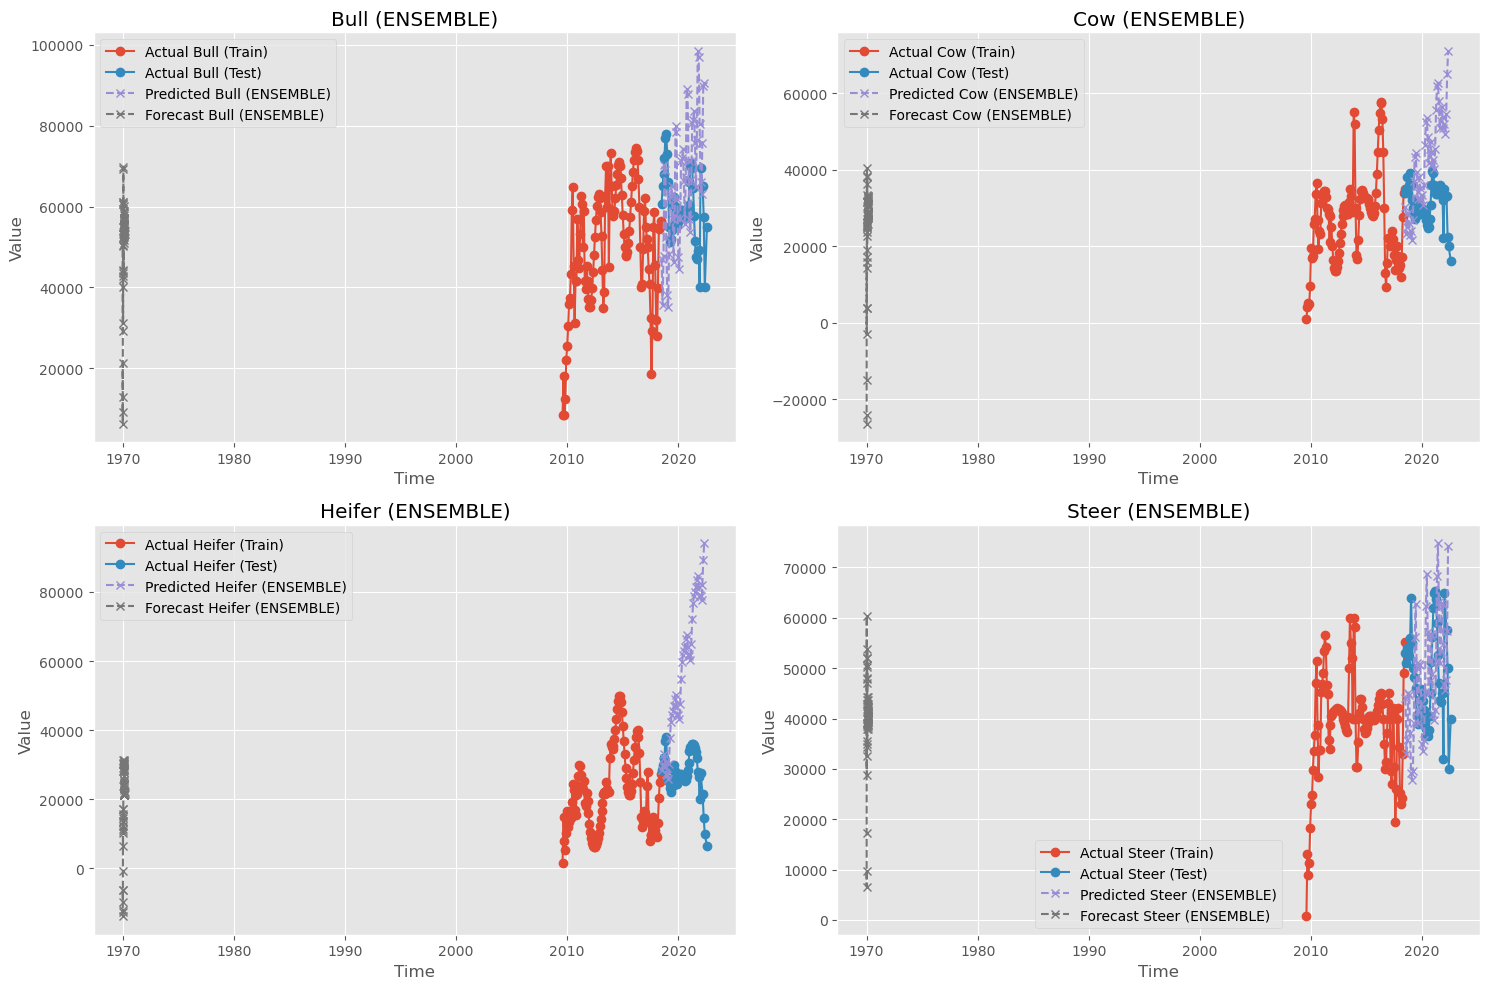

In [92]:
plot_predictions(train_df, test_df, test_forecasts, future_forecasts, model_name='ENSEMBLE')
